In [334]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%autoreload 2

In [3]:
import sys
import pickle

# data
import pandas as pd
import numpy as np

# plotting
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import seaborn as sns

# sklearn
from sklearn.preprocessing import scale, StandardScaler

# scipy
import scipy

# displays
from IPython.display import display, clear_output

In [4]:
sys.path = ['/data/mhoffert/tools/ete/'] + sys.path[:-1]
sys.path.append('./../code/')

In [5]:
# custom imports
import gtdb

from ete3 import Tree
from ete3.treeview import faces, AttrFace, TextFace, TreeStyle, NodeStyle, CircleFace, RectFace

In [6]:
import ete3 as ete3
ete3.__version__

'3.1.2'

In [7]:
import os

In [8]:
# for visualizing trees
os.environ['QT_QPA_PLATFORM']='offscreen'

## Outline
Finalized code to make the periodic table figure

## Load GTDB data

In [9]:
%%time
# get gtdb metadata and version containing only phyla with 100+ species
md, md_top_phyla = gtdb.load_gtdb('/data/mhoffert/genomes/GTDB_r207/bac120_metadata_r207.tsv')

Columns (61,65,74,82,83,85) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 7.16 s, sys: 1.06 s, total: 8.22 s
Wall time: 8.22 s


In [10]:
rep_count = pd.read_csv('/data/mhoffert/genomes/GTDB_r207/bac120_metadata_r207.tsv', sep='\t').groupby('gtdb_genome_representative').count()

Columns (61,65,74,82,83,85) have mixed types. Specify dtype option on import or set low_memory=False.


In [11]:
# get a list of the most abundant phyla
most_abundant_phyla = md_top_phyla.groupby(['Phylum']).count().sort_values('accession', ascending=False).head(10)
print(most_abundant_phyla['accession'])

Phylum
Proteobacteria       17350
Bacteroidota          8588
Firmicutes_A          8243
Actinobacteriota      7328
Firmicutes            4216
Patescibacteria       2485
Chloroflexota         1387
Cyanobacteria         1372
Verrucomicrobiota     1325
Planctomycetota       1071
Name: accession, dtype: int64


In [12]:
md['ncbi_isolation_source'].value_counts()

ncbi_isolation_source
none                                      56895
soil                                        306
biological product [ENVO:02000043]          171
derived from human gut metagenome           156
not provided; submitted under MIGS 2.1      136
                                          ...  
a paper mill waste water polluted pond        1
soil sediment                                 1
grasslands                                    1
soil of a rice field                          1
host s whole body                             1
Name: count, Length: 2026, dtype: int64

## Load trait data

In [16]:
pca_data = pd.read_csv('./../finalized_data/20250616_trait_data_v2.tsv.gz', 
                       sep='\t', 
                       index_col=0)

# pca_data = pd.read_csv('./../finalized_data/20241127_trait_data.tsv.gz', 
#                        sep='\t', 
#                        index_col=0)
pca_data.head()

aerobe  phototroph  autotroph  growth_rate  genome_size  \
GB_GCA_012517545_1  0.012481           0        0.0     3.180542      2358896   
GB_GCA_017540815_1  0.008260           0        0.0     1.161323      3074498   
GB_GCA_001829125_1  0.046911           0        0.0     4.600653      4400620   
GB_GCA_009784515_1  0.081483           0        0.0     5.581473      1826176   
GB_GCA_016936615_1  0.052110           0        0.0     2.326041      3256282   

                    gc_percentage  
GB_GCA_012517545_1      30.427073  
GB_GCA_017540815_1      42.095165  
GB_GCA_001829125_1      26.823927  
GB_GCA_009784515_1      40.947915  
GB_GCA_016936615_1      37.758278

In [17]:
np_pca_data = pd.read_csv('./../finalized_data/20250516_scaled_trait_data_v2.tsv.gz', 
                       sep='\t', 
                       index_col=0)

# np_pca_data = pd.read_csv('./../finalized_data/20241127_scaled_trait_data.tsv.gz', 
#                        sep='\t', 
#                        index_col=0)

np_pca_data.head()

aerobe  phototroph  autotroph  growth_rate  genome_size  \
GB_GCA_012517545_1  0.012481         0.0        0.0    -0.120779    -0.637998   
GB_GCA_017540815_1  0.008260         0.0        0.0    -0.867855    -0.264948   
GB_GCA_001829125_1  0.046911         0.0        0.0     0.404638     0.426372   
GB_GCA_009784515_1  0.081483         0.0        0.0     0.767524    -0.915710   
GB_GCA_016936615_1  0.052110         0.0        0.0    -0.436930    -0.170182   

                    gc_percentage  
GB_GCA_012517545_1      -1.708150  
GB_GCA_017540815_1      -0.797864  
GB_GCA_001829125_1      -1.989249  
GB_GCA_009784515_1      -0.887366  
GB_GCA_016936615_1      -1.136206

## Loading GTDB tree

In [18]:
gtdb_full = Tree('/data/mhoffert/genomes/GTDB_r207/tree/bac120_r207.tree', format=1, quoted_node_names=True)

In [19]:
gtdb_full = Tree('/data/mhoffert/fiererlab/periodic_phyla/finalized_data/gtdb_full_tree.nw', format=1, quoted_node_names=True)
gtdb_full.name = 'c000000'

In [20]:
names_map = pd.read_csv('./../finalized_data/gtdb_tree_names_map.tsv.gz', sep='\t', compression='gzip', index_col=0)['0']

In [21]:
gtdb_full.describe()

Number of leaf nodes:	62291
Total number of nodes:	124581
Rooted:	Yes
Most distant node:	RS_GCF_000508245_1
Max. distance:	3.398130


In [22]:
gtdb_pruned = Tree('/data/mhoffert/fiererlab/periodic_phyla/finalized_data/gtdb_pruned_tree.nw', format=1, quoted_node_names=True)
gtdb_pruned.name = 'c000000'

In [23]:
gtdb_pruned.describe()

Number of leaf nodes:	50745
Total number of nodes:	101489
Rooted:	Yes
Most distant node:	RS_GCF_000008205_1
Max. distance:	2.646470


In [24]:
gtdb_pruned.get_children()

[Tree node 'c000001' (0x7f06f2bc82e), Tree node 'c000014' (0x7f06d432007)]

In [25]:
top_phyla_clades = pd.read_csv('./../finalized_data/clade2phylum.tsv', sep='\t', index_col=0)['0']

## Load variances explained for wavelets

In [26]:
varexp_ind_df = pd.read_csv('./../finalized_data/20250516_trait_data_v2_waveletcoeffs_var_explained.tsv.gz',
                            index_col=0,
                            sep='\t', compression='gzip')

# varexp_ind_df = pd.read_csv('./../finalized_data/waveletcoeffs_var_explained.tsv.gz',
#                             index_col=0,
#                             sep='\t', compression='gzip')

# Wavelet-based periodic table of bacterial taxonomic groups

Insert description here

In [27]:
varexp_ind_df.reset_index(drop=True)

aerobe  phototroph     autotroph   growth_rate   genome_size  \
0      3.646121e-01    0.005284  1.016397e-05  2.605792e-01  3.122489e-01   
1      1.236714e-01    0.001848  1.945213e-02  3.925120e-03  8.713255e-03   
2      4.718858e-02    0.000150  2.256035e-01  1.060741e-02  4.226230e-03   
3      4.063921e-02    0.000000  6.026854e-08  2.701496e-03  1.216700e-02   
4      2.597832e-02    0.004580  0.000000e+00  1.326306e-04  4.148533e-03   
...             ...         ...           ...           ...           ...   
50739  2.220446e-16    0.000000  0.000000e+00  1.279702e-07  1.737854e-07   
50740  4.440892e-16    0.000000  0.000000e+00  1.636795e-07  1.421411e-07   
50741  0.000000e+00    0.000000  0.000000e+00  7.728162e-06  6.261014e-11   
50742 -2.220446e-16    0.000000  0.000000e+00  3.852314e-05  9.419687e-12   
50743  0.000000e+00    0.000000  0.000000e+00  2.540731e-07  3.813616e-13   

       gc_percentage  
0       4.970016e-01  
1       2.592307e-04  
2       6.790223e-02  
3       6.166228e-04  
4       8.333835e-04  
...              ...  
50739   4.840480e-07  
50740   1.902157e-10  
50741   2.262452e-08  
50742   8.148306e-10  
50743   2.944306e-09  

[50744 rows x 6 columns]

In [28]:
all_interior_nodes = [n.name for n in gtdb_pruned.traverse(strategy='postorder') if not n.is_leaf()]

In [29]:
trait_colors = {'aerobe':'red', 'phototroph':'green', 
                'autotroph':'blue',
                # '3HP bicycle':'aqua', '3HP/4HB':'lightskyblue', 'Calvin Cycle':'blue', 'rAcoA homoacetogenic':'navy', 'rTCA I':"darkturquoise", 'rTCA II':'turquoise',
                'growth_rate':'gold', 'genome_size':'darkorchid', 'gc_percentage':'orange'}

# trait_colors = {'aerobe':'red', 'phototroph':'green', 
#                 '3HP bicycle':'aqua', '3HP/4HB':'lightskyblue', 'Calvin Cycle':'blue', 'rAcoA homoacetogenic':'navy', 'rTCA I':"darkturquoise", 'rTCA II':'turquoise',
#                 'growth_rate':'yellow', 'genome_size':'darkorchid', 'gc_percentage':'orange'}

In [30]:
varexp_ind_df

aerobe  phototroph     autotroph   growth_rate   genome_size  \
c000130  3.646121e-01    0.005284  1.016397e-05  2.605792e-01  3.122489e-01   
c000028  1.236714e-01    0.001848  1.945213e-02  3.925120e-03  8.713255e-03   
c000302  4.718858e-02    0.000150  2.256035e-01  1.060741e-02  4.226230e-03   
c008582  4.063921e-02    0.000000  6.026854e-08  2.701496e-03  1.216700e-02   
c030369  2.597832e-02    0.004580  0.000000e+00  1.326306e-04  4.148533e-03   
...               ...         ...           ...           ...           ...   
c077719  2.220446e-16    0.000000  0.000000e+00  1.279702e-07  1.737854e-07   
c047308  4.440892e-16    0.000000  0.000000e+00  1.636795e-07  1.421411e-07   
c122400  0.000000e+00    0.000000  0.000000e+00  7.728162e-06  6.261014e-11   
c122752 -2.220446e-16    0.000000  0.000000e+00  3.852314e-05  9.419687e-12   
c120784  0.000000e+00    0.000000  0.000000e+00  2.540731e-07  3.813616e-13   

         gc_percentage  
c000130   4.970016e-01  
c000028   2.592307e-04  
c000302   6.790223e-02  
c008582   6.166228e-04  
c030369   8.333835e-04  
...                ...  
c077719   4.840480e-07  
c047308   1.902157e-10  
c122400   2.262452e-08  
c122752   8.148306e-10  
c120784   2.944306e-09  

[50744 rows x 6 columns]

In [31]:
# code to calculate number of wavelets required to explain different amounts of variance
cutoff_test = pd.Series(index=pd.MultiIndex.from_product([varexp_ind_df.columns, np.linspace(0, 1, 101)]), dtype=int)
all_selected = dict((trait, {}) for trait in varexp_ind_df.columns)
for (trait, cutoff), val in cutoff_test.items():
    display(trait, cutoff)
    clear_output(wait=True)
    top_n_wavelets = {}
    # make a dictionary with each node as keys
    # and the list of traits where that node was selected as values
    subset = varexp_ind_df[trait].sort_values(ascending=False).cumsum().loc[lambda x: x <= cutoff]
    all_selected[trait][cutoff] = list(subset.index)
    cutoff_test.loc[(trait, cutoff)] = len(subset)

        # for key, val in subset.items():
        #     if not key in top_n_wavelets.keys():
        #         top_n_wavelets[key] = [col]
        #     else:
        #         top_n_wavelets[key].append(col)

'gc_percentage'

1.0

In [32]:
total_selected = pd.Series()
for cutoff in np.linspace(0, 1, 101):
    display(cutoff)
    clear_output(wait=True)
    curr_list = []
    for trait in all_selected.keys():

        curr_list += all_selected[trait][cutoff]
    total_selected.loc[cutoff] = len(set(curr_list))

1.0

In [33]:
total_selected

0.00        0
0.01        0
0.02        0
0.03        0
0.04        0
        ...  
0.96    13984
0.97    17288
0.98    22090
0.99    29536
1.00    50744
Length: 101, dtype: int64

In [34]:
cutoff_test

aerobe         0.00        0.0
               0.01        0.0
               0.02        0.0
               0.03        0.0
               0.04        0.0
                        ...   
gc_percentage  0.96     1727.0
               0.97     2728.0
               0.98     4530.0
               0.99     8319.0
               1.00    50744.0
Length: 606, dtype: float64

In [35]:
trait_colors

{'aerobe': 'red',
 'phototroph': 'green',
 'autotroph': 'blue',
 'growth_rate': 'gold',
 'genome_size': 'darkorchid',
 'gc_percentage': 'orange'}

Index(['aerobe', 'phototroph', 'autotroph', 'growth_rate', 'genome_size',
       'gc_percentage'],
      dtype='object')


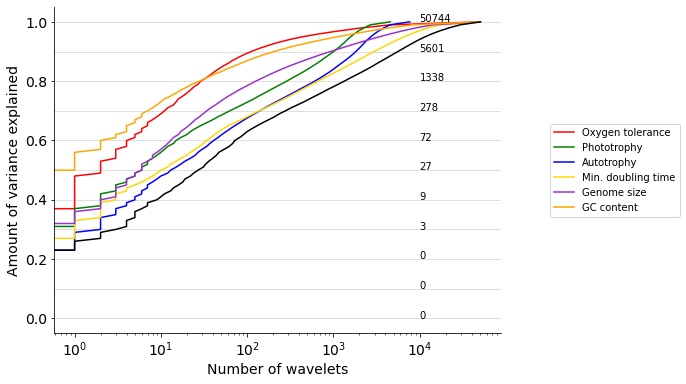

In [36]:
fig, ax = plt.subplots(figsize=(8,6))

hue_order = cutoff_test.index.get_level_values(0).unique()
print(hue_order)
sns.lineplot(data=cutoff_test.reset_index(), hue='level_0', y='level_1', x=0, 
             hue_order=hue_order,
             palette=[trait_colors[h] for h in hue_order], estimator=None)

plt.plot(total_selected.values, total_selected.index, label='total', color='k')

for val in range(0, 101, 10):
    x = total_selected.index[val]
    ax.annotate(f'{total_selected.iloc[val]}', 
                (1e4, x), 
                (1e4, x))

# for i in [1, 10, 100, 1000]:
#     ax.axhline(i, color='k', zorder=0, alpha=0.25, linewidth=0.5)
    
for i in np.linspace(0, 1, 11):
    ax.axhline(i, color='k', zorder=0, alpha=0.25, linewidth=0.5)

ax.set_xscale('log')
lgd = ax.legend(['Oxygen tolerance',
                 'Phototrophy',
                 'Autotrophy',
                 'Min. doubling time', 
                 'Genome size',
                 'GC content'],
                loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.tick_params(labelsize=14)
ax.set_ylabel('Amount of variance explained', fontsize=14)
ax.set_xlabel('Number of wavelets', fontsize=14)

sns.despine()

plt.savefig('/data/mhoffert/fiererlab/periodic_phyla/figures/group_meeting_figures/2025_num_wavelets_variance.png',
           dpi=400, bbox_inches='tight')

plt.savefig('/data/mhoffert/fiererlab/periodic_phyla/figures/group_meeting_figures/2025_num_wavelets_variance.svg',
            bbox_inches='tight')

# plt.savefig('/data/mhoffert/fiererlab/periodic_phyla/figures/group_meeting_figures/num_wavelets_variance.png',
#            dpi=400, bbox_inches='tight')

# plt.savefig('/data/mhoffert/fiererlab/periodic_phyla/figures/group_meeting_figures/num_wavelets_variance.svg',
#             bbox_inches='tight')

(0.0, 1000.0)

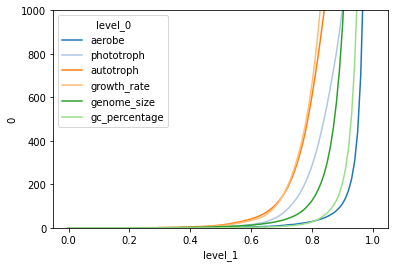

In [37]:
fig, ax = plt.subplots(figsize=(6,4))
sns.lineplot(data=cutoff_test.reset_index(), hue='level_0', x='level_1', y=0, palette='tab20')
ax.set_ylim(0, 1000)

In [38]:
top_n_wavelets = dict((cutoff, {}) for cutoff in [0.1, 0.25, 0.5, 0.6, 0.70, 0.8])

# make a dictionary with each node as keys
# and the list of traits where that node was selected as values
# to_drop = ['3HP/4HB', 'rTCA II']

for cutoff in top_n_wavelets.keys():
    print(cutoff)
    for col in varexp_ind_df.columns:
        subset = varexp_ind_df[col].sort_values(ascending=False).cumsum().loc[lambda x: x < cutoff]

        for key, val in subset.items():
            if not key in top_n_wavelets[cutoff].keys():
                top_n_wavelets[cutoff][key] = [col]
            else:
                top_n_wavelets[cutoff][key].append(col)

0.1
0.25
0.5
0.6
0.7
0.8


In [39]:
all_wavelets = list(set([i for i in top_n_wavelets[cutoff] for cutoff in top_n_wavelets.keys()]))

In [40]:
n_leaves = pd.Series()
for i, n in enumerate(gtdb_pruned.traverse()):
    if i % 1000 == 0:
        display(i)
        clear_output(wait=True)
    if n.name in all_wavelets:
        n_leaves.loc[n.name] = len(n.get_leaves())

101000

In [336]:
wavelet_node_data = pd.DataFrame(columns=['n_leaves', 'n_traits'])
cutoff = 0.6
for i, node in enumerate(list(top_n_wavelets[cutoff].keys())):
    if i % 50 == 0:
        display(i / len(top_n_wavelets[cutoff].keys()))
        clear_output(wait=True)
    
    # ?tree_node = gtdb_pruned.search_nodes(name=node)[0]
    wavelet_node_data.loc[node, 'n_leaves'] = n_leaves.loc[node]
    wavelet_node_data.loc[node, 'n_traits'] = len(top_n_wavelets[cutoff][node])

0.6944444444444444

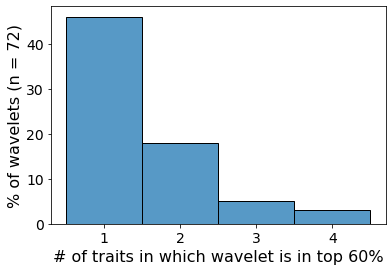

In [346]:
fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(wavelet_node_data['n_traits'], 
             # stat='percent', 
             bins=np.linspace(0.5,4.5,5))
ax.set_ylabel(f'% of wavelets (n = {len(wavelet_node_data)})', fontsize=16)
ax.set_xlabel(f'# of traits in which wavelet is in top {cutoff * 100:.0f}%', fontsize=16)
plt.tick_params(labelsize=14)
ax.set_xticks(list(range(1,5)))
# ax.set_yscale('log')

In [352]:
(wavelet_node_data['n_traits']).value_counts()

n_traits
1    46
2    18
3     5
4     3
Name: count, dtype: int64

Text(0.5, 1.0, 'Variance explained using 72 wavelets')

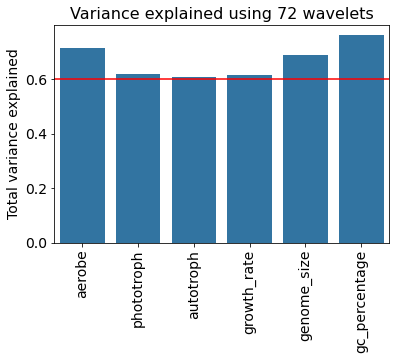

In [345]:
# total amount of variance captured by wavelets
cutoff = 0.6
selected = list(top_n_wavelets[cutoff].keys())
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(varexp_ind_df.loc[selected].sum())
ax.axhline(cutoff, color='r')
plt.tick_params(labelsize=14)
plt.tick_params(rotation=90, axis='x')
ax.set_ylabel('Total variance explained', fontsize=14)
ax.set_title(f'Variance explained using {len(selected)} wavelets', fontsize=16)

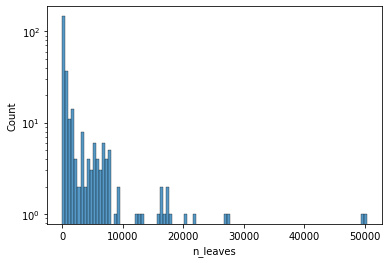

In [45]:
fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(wavelet_node_data['n_leaves'], bins=100)
ax.set_yscale('log')

### Make tree with tips of all trait wavelets so far

This code is a little complicated:
1. First, make a collapsed tree representing the clades identified by the wavelets. 
2. Make a color map that allows you to color the branches of the entire clade in the same color.
3. Make a second tree with MORE LEAVES than the wavelet tree.
4. Make a color map for each leaf with the average value for a specific trait according to the wavelet tree.
5. Make a third color map with the average value for each leaf.

In [46]:
# define collapsing function
# if there are no wavelets in the subtree
# construct collapsing method
def collapseTree(tree, func, **collapse_args): 
    '''
    Master TreeNode collapsing function
    Collapses a TreeNode using specified leaf finding function
    '''
    # collapse tree using function
    t = Tree(tree.write(is_leaf_fn=lambda n: func(n, **collapse_args), format=3),format=3) 
    t.name = tree.name
    return t

def collapse_to_wavelets(node, wavelet_clades):
    '''
    collapses to phylum root nodes
    '''
    if node.is_leaf():
        return True
    elif node.up is None:
        return False
    else:
        return all([not n.name in wavelet_clades for n in node.traverse(strategy='levelorder')])

def collapse_count(node, n, keep_nodes):
    '''
    collapses to phylum root nodes
    '''
    if node.is_leaf():
        return True
    elif node.up is None:
        return False
    elif any([n.name in keep_nodes for n in node.traverse(strategy='levelorder')]):
        return False
    else:
        return len(node.get_leaves()) < n

In [47]:
%%time
wavelet_tree_sizes = pd.DataFrame(columns=['n_leaves', 'frac_captured_80'])

for cutoff in top_n_wavelets.keys():
    print(cutoff)
    # make a wavelet tree
    wavelet_tree = collapseTree(gtdb_pruned, collapse_to_wavelets, wavelet_clades=list(top_n_wavelets[cutoff].keys()))
    # wavelet_tree.describe()
    wavelet_tree_sizes.loc[cutoff, 'n_leaves'] = len(wavelet_tree.get_leaves())
    n_leaves = pd.Series()
    wavelet_leaves = set([l.name for l in wavelet_tree.get_leaves()])
    for i, n in enumerate(gtdb_pruned.traverse()):
        if i % 1000 == 0:
            display(i)
            clear_output(wait=True)
        if n.name in wavelet_leaves:
            n_leaves.loc[n.name] = len(n.get_leaves())
    leaf_fractions = (n_leaves.sort_values(ascending=False).cumsum() / n_leaves.sum())
    wavelet_tree_sizes.loc[cutoff, 'frac_captured_80'] = len(leaf_fractions.loc[lambda x: x < 0.8])

CPU times: user 2min 46s, sys: 453 ms, total: 2min 46s
Wall time: 2min 46s


<Axes: xlabel='n_leaves', ylabel='frac_captured_80'>

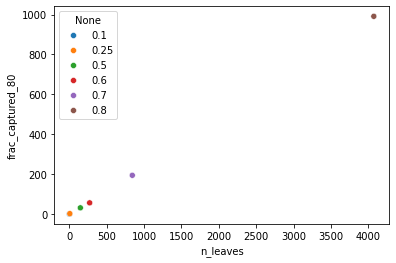

In [48]:
sns.scatterplot(x=wavelet_tree_sizes['n_leaves'],
                y=wavelet_tree_sizes['frac_captured_80'],
                hue=wavelet_tree_sizes.index, palette='tab10')

In [49]:
wavelet_tree_sizes

n_leaves frac_captured_80
0.10        2                0
0.25        7                2
0.50      148               31
0.60      272               56
0.70      843              194
0.80     4074              991

#### Notes
based on this, we decided to go with 60% originally because it was a compromise between variance explained and size

### Analysis of wavelet tree

In [93]:
cutoff = 0.6
wavelet_tree = collapseTree(gtdb_pruned, collapse_to_wavelets, wavelet_clades=list(top_n_wavelets[cutoff].keys()))

In [353]:
wavelet_tree.describe()

Number of leaf nodes:	272
Total number of nodes:	543
Rooted:	Yes
Most distant node:	c119533
Max. distance:	1.837630


In [94]:
n_leaves = pd.Series()
wavelet_nodes = set([l.name for l in wavelet_tree.traverse()])
for i, n in enumerate(gtdb_pruned.traverse()):
    if i % 1000 == 0:
        display(i)
        clear_output(wait=True)
    if n.name in wavelet_nodes:
        n_leaves.loc[n.name] = len(n.get_leaves())

101000

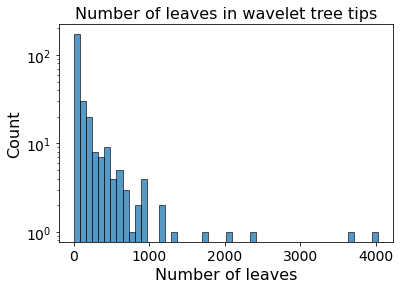

In [95]:
fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(n_leaves.loc[[l.name for l in wavelet_tree.get_leaves()]], bins=50)
ax.set_yscale('log')
ax.set_title('Number of leaves in wavelet tree tips', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_xlabel('Number of leaves', fontsize=16)
plt.tick_params(labelsize=14)

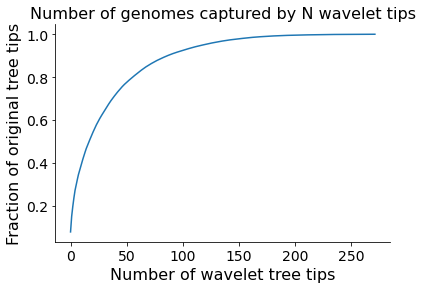

In [96]:
# plot of number of total leaves in tree captured by X tips in the collapsed tree
fig, ax = plt.subplots(figsize=(6,4))
leaf_fractions = n_leaves.loc[[l.name for l in wavelet_tree.get_leaves()]].sort_values(ascending=False).cumsum() / n_leaves.loc['c000000']
plt.plot(leaf_fractions.values)
ax.set_title('Number of genomes captured by N wavelet tips', fontsize=16)
ax.set_xlabel('Number of wavelet tree tips', fontsize=16)
ax.set_ylabel('Fraction of original tree tips', fontsize=16)
plt.tick_params(labelsize=14)
sns.despine()
# plt.savefig('/data/mhoffert/fiererlab/periodic_phyla/figures/group_meeting_figures/n_genomes_captured.png', dpi=400, bbox_inches='tight')

In [97]:
len(leaf_fractions.loc[lambda x: x < 0.90])

87

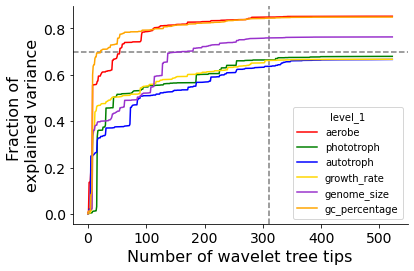

In [335]:
# plot of number of total leaves in tree captured by X tips in the collapsed tree
fig, ax = plt.subplots(figsize=(6,4))
# unexp_var = varexp_ind_df.reindex(n_leaves.sort_values(ascending=False).index).dropna().sum(1).cumsum()
unexp_var = varexp_ind_df.reindex(n_leaves.sort_values(ascending=False).index).dropna().cumsum().reset_index(drop=True).stack().reset_index()
# plt.plot(unexp_var.values)
sns.lineplot(data=unexp_var, x='level_0', y=0, hue='level_1', zorder=1,
             hue_order=hue_order,
             palette=[trait_colors[h] for h in hue_order])

ax.axvline(310, color='gray', linestyle='--', zorder=0)
ax.axhline(0.7, color='gray', linestyle='--', zorder=0)

ax.set_xlabel('Number of wavelet tree tips', fontsize=16)
ax.set_ylabel('Fraction of \nexplained variance', fontsize=16)
plt.tick_params(labelsize=14)
sns.despine()

# Periodic table

## Periodic table layout

In [99]:
import matplotlib as mpl

from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

from adjustText import adjust_text

In [100]:
import itertools

In [101]:
# ENS-t-SNE
sys.path.append('/data/mhoffert/tools/MPSE-TSNE/ENS-t-SNE/')
import mview

In [102]:
# find names for leaf nodes
new_leaf_names = pd.Series()
for node in wavelet_tree.get_leaves():
    n = node
    level = 1
    n = node.up
    while not '__' in names_map.loc[n.name]:
        n = n.up
        level += 1
    split = names_map.loc[n.name].split(':')[-1]
    tax = split.split('__')[0].upper()
    new_leaf_names.loc[node.name] = f'{tax}{level}:{split.split("__")[-1]}'
        

In [103]:
new_leaf_names.sort_index(ascending=False)

c119534                  O22:Rhodobacteraceae
c119533                  O22:Rhodobacteraceae
c119085                  O21:Rhodobacteraceae
c118634                  O20:Rhodobacteraceae
c118169                  O19:Rhodobacteraceae
                               ...           
GB_GCA_002748415_1         O3:Actinomycetales
GB_GCA_002469865_1    C29:Alphaproteobacteria
GB_GCA_002365175_1             O8:Rhizobiales
GB_GCA_001830395_1           G5:Pseudomonas_E
GB_GCA_001593685_1         O8:Pseudomonadales
Length: 272, dtype: object

In [104]:
# carbon_binary = (pca_data[['3HP bicycle', 
#                            #'3HP/4HB',
#                            'Calvin Cycle',
#        'rAcoA homoacetogenic', 'rTCA I', 
#                            #'rTCA II'
#                           ]].eq(1).sum(1) > 0).astype(int)

In [105]:
scaled_gr = pd.Series(data=MinMaxScaler().fit_transform(pca_data['growth_rate'].values.reshape(-1, 1)).reshape(1, -1)[0],
                      index=pca_data.index)

scaled_gc = pd.Series(data=MinMaxScaler().fit_transform(pca_data['gc_percentage'].values.reshape(-1, 1)).reshape(1, -1)[0],
                      index=pca_data.index)

scaled_gs = pd.Series(data=MinMaxScaler().fit_transform(pca_data['genome_size'].values.reshape(-1, 1)).reshape(1, -1)[0],
                      index=pca_data.index)

## Generating layout of table

In [106]:
get_leaf_names = lambda n: [l.name for l in gtdb_pruned.search_nodes(name=n)[0].get_leaves()]

In [107]:
(n_leaves.sort_values(ascending=False) > 1).sum()

523

In [354]:
N_CELLS = 272

In [355]:
pca_data

aerobe  phototroph  autotroph  growth_rate  genome_size  \
GB_GCA_012517545_1  0.012481           0        0.0     3.180542      2358896   
GB_GCA_017540815_1  0.008260           0        0.0     1.161323      3074498   
GB_GCA_001829125_1  0.046911           0        0.0     4.600653      4400620   
GB_GCA_009784515_1  0.081483           0        0.0     5.581473      1826176   
GB_GCA_016936615_1  0.052110           0        0.0     2.326041      3256282   
...                      ...         ...        ...          ...          ...   
GB_GCA_002343545_1  0.657668           0        0.0     2.404760      3369472   
GB_GCA_018266335_1  0.772987           0        0.0     1.265666      3794476   
GB_GCA_009991595_1  0.681081           0        0.0     3.221670      2957844   
GB_GCA_018001635_1  0.671488           0        0.0     3.295428      2848164   
GB_GCA_001799195_1  0.146793           0        0.0     3.052441      4641089   

                    gc_percentage  
GB_GCA_012517545_1      30.427073  
GB_GCA_017540815_1      42.095165  
GB_GCA_001829125_1      26.823927  
GB_GCA_009784515_1      40.947915  
GB_GCA_016936615_1      37.758278  
...                           ...  
GB_GCA_002343545_1      63.808393  
GB_GCA_018266335_1      55.576317  
GB_GCA_009991595_1      44.001412  
GB_GCA_018001635_1      39.706211  
GB_GCA_001799195_1      60.632716  

[50745 rows x 6 columns]

In [356]:
wavelet_tree.describe()

Number of leaf nodes:	272
Total number of nodes:	543
Rooted:	Yes
Most distant node:	c119533
Max. distance:	1.837630


## Construct input data for tSNE

In [357]:

tsne_input_data = []
for i, test_node in enumerate(wavelet_tree.get_leaves()):
    if i % 10 == 0:
        display(i)
        clear_output(wait=True)
    if test_node.name in n_leaves.loc[[l.name for l in wavelet_tree.get_leaves()]].sort_values(ascending=False).head(N_CELLS).index:
        
# test_node = gtdb_pruned.search_nodes(name=wavelet_tree.get_leaves()[0].name)[0]
        test_leaves = get_leaf_names(test_node.name)
        tsne_input_data.append(pd.Series(data=[pca_data.loc[test_leaves, 'aerobe'].median(),
                                              pca_data.loc[test_leaves, 'phototroph'].eq(1).sum() / len(test_leaves),
                                              pca_data.loc[test_leaves, 'autotroph'].eq(1).sum() / len(test_leaves),
                                              scaled_gr.loc[test_leaves].median(),
                                              scaled_gc.loc[test_leaves].median(),
                                              scaled_gs.loc[test_leaves].median()],
                                         index=['aerobe', 
                                                'phototroph', 
                                                'autotroph', 
                                                'growth_rate', 
                                                'gc_content', 
                                                'genome_size',],
                                        name=test_node.name))

270

In [358]:
tsne_input_data = pd.concat(tsne_input_data, axis=1).T

In [359]:
len(list(itertools.combinations_with_replacement(tsne_input_data.index, 2)))

37128

In [360]:
%%time
# compute pairwise distance matrix for use in 3D t-SNE
wavelet_distances = pd.DataFrame()
count = 0
for n1, n2 in itertools.combinations_with_replacement(tsne_input_data.index, 2):
    if count % 100 == 0:
        display(count)
        clear_output(wait=True)
    node1 = wavelet_tree&n1
    node2 = wavelet_tree&n2
    dist = wavelet_tree.get_distance(node1, node2)
    wavelet_distances.loc[n1, n2] = dist
    wavelet_distances.loc[n2, n1] = dist
    count += 1

CPU times: user 29.8 s, sys: 930 ms, total: 30.7 s
Wall time: 28.8 s


In [361]:
tsne_input_data

aerobe  phototroph  autotroph  growth_rate  gc_content  genome_size
c000001  0.060484    0.004878   0.007317     0.120648    0.444545     0.167376
c000027  0.069026    0.000000   0.010256     0.139195    0.351884     0.108982
c000835  0.668355    0.000000   0.009259     0.332011    0.865783     0.153190
c001545  0.772378    0.421687   0.192771     0.204105    0.764074     0.266138
c001546  0.563722    0.014052   0.049180     0.193845    0.754680     0.195412
...           ...         ...        ...          ...         ...          ...
c003897  0.820100    0.004320   0.002160     0.155009    0.705583     0.292793
c003898  0.778015    0.000000   0.000000     0.309825    0.836826     0.254245
c002284  0.454171    0.000000   0.000000     0.258069    0.609384     0.212006
c001712  0.048764    0.000000   0.033333     0.247028    0.771081     0.167773
c000869  0.180959    0.000000   0.000000     0.200783    0.756490     0.148212

[272 rows x 6 columns]

***mview.mpse_tsne()***
  mview.MPSE():
(272, 272)
(272, 6)
    data details:
      number of perspectives : 2
      number of samples : 272
    visualization details:
      embedding dimension : 3
      image dimension : 2
      visualization type : tsne
  setup visualization instance for perspective 1 :
      mview.TSNE():
len 1
        data details:
          number of samples : 272
        embedding details:
          embedding dimension : 2
          perplexity : 60.00
        TSNE.initialize():
          method : random
          initial cost : 2.99e+00
  setup visualization instance for perspective 2 :
      mview.TSNE():
len 1
        data details:
          number of samples : 272
        embedding details:
          embedding dimension : 2
          perplexity : 60.00
        TSNE.initialize():
          method : random
          initial cost : 2.92e+00
    initialize:
      fixed embedding : False
      initial embedding : random
      fixed projections : False
      initial

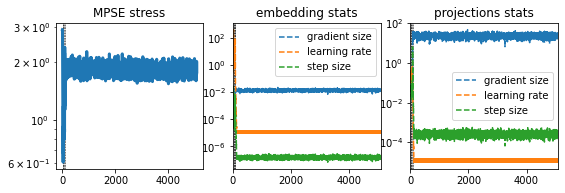

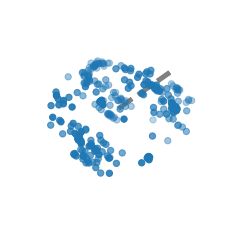

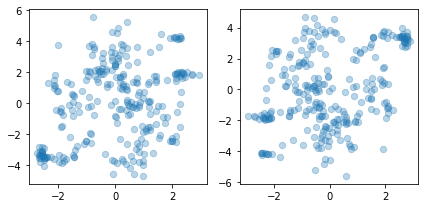

CPU times: user 1min 47s, sys: 17.5 s, total: 2min 4s
Wall time: 1min 33s


In [369]:
%%time
mv = mview.mpse_tsne(data=[wavelet_distances.values, tsne_input_data[['aerobe', 'phototroph', 'autotroph', 
                                                                      'gc_content', 'growth_rate', 'genome_size']].values],
                     perplexity=60,
                     iters=5000,
                     #lr=[1e-2, 1e-2],
                     smart_init=True,
                     evaluate=True,
                      verbose=1,
                      show_plots=True)

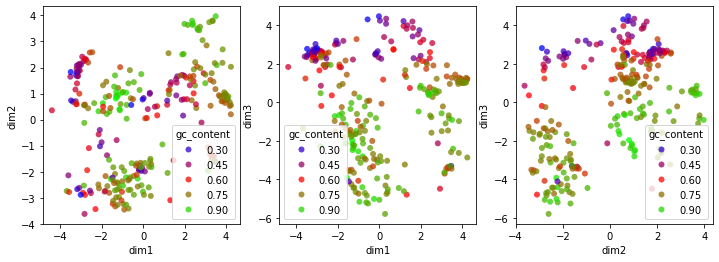

In [370]:
mpse_tsne_embedding = pd.DataFrame(index=tsne_input_data.index, data=mv.embedding, columns=['dim1', 'dim2', 'dim3'])
mpse_tsne_embedding

# draw embedding views
fig = plt.figure(figsize=(12, 4))
i = 1
for c1, c2 in itertools.combinations(mpse_tsne_embedding.columns, 2):
    ax = fig.add_subplot(1,3,i)
    
    
    sns.scatterplot(data=mpse_tsne_embedding, x=c1, y=c2, hue=tsne_input_data['gc_content'],
                   linewidth=0, alpha=0.75, palette='brg')
    
    
    i += 1

In [371]:
cmap = matplotlib.cm.gnuplot
postorder_hues = pd.Series(dict((l, cmap(c)) for l, c in zip([l.name for l in wavelet_tree.traverse(strategy='postorder') if l.name in tsne_input_data.index], np.linspace(0, 1, N_CELLS))))
postorder_hues

c000001                                 (0.0, 0.0, 0.0, 1.0)
c000027                                 (0.0, 0.0, 0.0, 1.0)
c000835    (0.06262242910851495, 6.030862941101084e-08, 0...
c001545    (0.08856148855400953, 4.824690352880868e-07, 0...
c001546    (0.10846522890932808, 1.6283329940972927e-06, ...
                                 ...                        
c003897    (0.9941002434954168, 0.965119478933442, 0.0, 1.0)
c003898    (0.9960707117193528, 0.9766546501722566, 0.0, ...
c002284    (0.9980372895701588, 0.9882813699105171, 0.0, ...
c001712                                 (1.0, 1.0, 0.0, 1.0)
c000869                                 (1.0, 1.0, 0.0, 1.0)
Length: 272, dtype: object

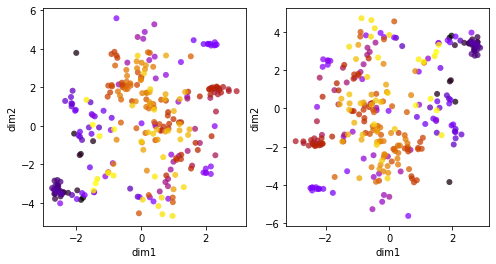

In [372]:
fig = plt.figure(figsize=(8,4))
for i in range(2):
    ax = fig.add_subplot(1,2,i+1)
    plotdf = pd.DataFrame(mv.images[i, :, :], columns=['dim1', 'dim2'], index=tsne_input_data.index)
    sns.scatterplot(data=plotdf, x='dim1', y='dim2', color=postorder_hues,
                   linewidth=0, alpha=0.75)

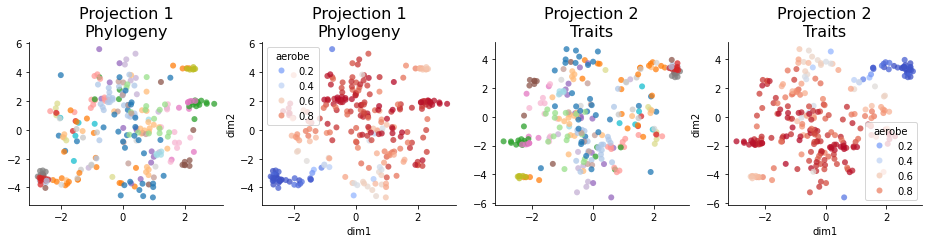

In [373]:
fig = plt.figure(figsize=(16,3))

ax = fig.add_subplot(1,4, 1)

ax.set_title('Projection 1\nPhylogeny', fontsize=16)

unique_taxa = new_leaf_names.reindex(tsne_input_data.index).apply(lambda x: x.split(':')[1]).value_counts()
palette = dict((index, c) for c, (index, val) in zip(sns.color_palette('tab20', n_colors=len(unique_taxa[unique_taxa > 2])), unique_taxa[unique_taxa > 2].items()))
hues = new_leaf_names.reindex(tsne_input_data.index).apply(lambda x: x.split(':')[1]).map(palette).fillna('lightgray')
hues.unique()

plotdf = pd.DataFrame(mv.images[0, :, :], columns=['dim1', 'dim2'], index=tsne_input_data.index)

plt.scatter(plotdf['dim1'], plotdf['dim2'], linewidth=0, alpha=0.75, color=hues.values)

sns.despine()

ax = fig.add_subplot(1,4, 2)

ax.set_title('Projection 1\nPhylogeny', fontsize=16)
trait = 'aerobe'
cmap = 'coolwarm'
hues = tsne_input_data[trait]

plotdf = pd.DataFrame(mv.images[0, :, :], columns=['dim1', 'dim2'], index=tsne_input_data.index)
sns.scatterplot(data=plotdf, x='dim1', y='dim2', hue=hues,
               linewidth=0, alpha=0.75, palette=cmap)

sns.despine()

ax = fig.add_subplot(1,4,3)

ax.set_title('Projection 2\nTraits', fontsize=16)

unique_taxa = new_leaf_names.reindex(tsne_input_data.index).apply(lambda x: x.split(':')[1]).value_counts()
palette = dict((index, c) for c, (index, val) in zip(sns.color_palette('tab20', n_colors=len(unique_taxa[unique_taxa > 2])), unique_taxa[unique_taxa > 2].items()))
hues = new_leaf_names.reindex(tsne_input_data.index).apply(lambda x: x.split(':')[1]).map(palette).fillna('lightgray')
hues.unique()

plotdf = pd.DataFrame(mv.images[1, :, :], columns=['dim1', 'dim2'], index=tsne_input_data.index)
# ax.get_legend().remove()

plt.scatter(plotdf['dim1'], plotdf['dim2'], linewidth=0, alpha=0.75, color=hues.values)

sns.despine()


ax = fig.add_subplot(1,4,4)

trait = 'aerobe'
cmap = 'coolwarm'
hues = tsne_input_data[trait]

ax.set_title('Projection 2\nTraits', fontsize=16)

plotdf = pd.DataFrame(mv.images[1, :, :], columns=['dim1', 'dim2'], index=tsne_input_data.index)
sns.scatterplot(data=plotdf, x='dim1', y='dim2', hue=hues,
               linewidth=0, alpha=0.75, palette=cmap)
# ax.get_legend().remove()

sns.despine()

# plt.savefig('/data/mhoffert/fiererlab/periodic_phyla/figures/group_meeting_figures/enstsne_projection.svg', bbox_inches='tight')


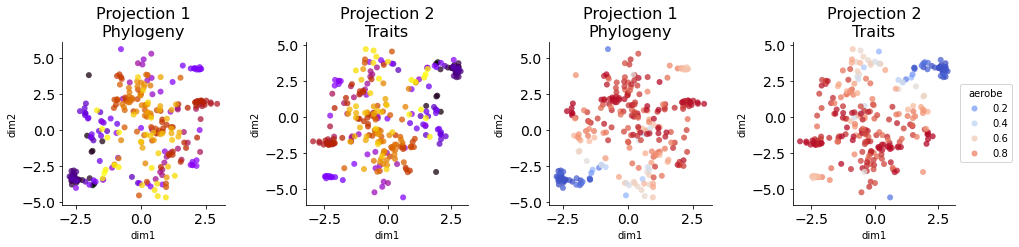

In [374]:
fig = plt.figure(figsize=(16,3))
for i in range(4):
    ax = fig.add_subplot(1,4,i+1)
    if i > 1:
        trait = 'aerobe'
        cmap = 'coolwarm'
        hues = tsne_input_data[trait]

    else:
        hues=postorder_hues
        cmap='gnuplot'
        
    if i % 2 == 1:
        ax.set_title('Projection 2\nTraits', fontsize=16)
    else:
        
        ax.set_title('Projection 1\nPhylogeny', fontsize=16)
        
    plotdf = pd.DataFrame(mv.images[i % 2, :, :], columns=['dim1', 'dim2'], index=tsne_input_data.index)
    sns.scatterplot(data=plotdf, x='dim1', y='dim2', hue=hues,
                   linewidth=0, alpha=0.75, palette=cmap)
    
    sns.despine()
    if i < 3:
        ax.get_legend().remove()
    else:
        lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title=trait)
    
    plt.tick_params(labelsize=14)

# fig.axes[0].set_title('Projection 1\nPhylogeny', fontsize=16)
# fig.axes[1].set_title('Projection 2\nTraits', fontsize=16)
fig.subplots_adjust(wspace=0.5)
# plt.savefig('/data/mhoffert/fiererlab/periodic_phyla/figures/group_meeting_figures/enstsne_projection.png', dpi=400, bbox_inches='tight')


## Multi-view grid assignment

In [375]:
from scipy.optimize import linear_sum_assignment

In [376]:
# def gridify2(points1, points2, grid_size, weight1=0.5, weight2=0.5):
#     # assert len(points1) == len(points2) == grid_size**2, "Point sets must match grid size."

#     locations = np.array(list(itertools.product(range(grid_size), range(grid_size))))

#     distance = lambda point, location: np.sum((point - location) ** 2)

#     cost_matrix1 = np.zeros((len(points1), grid_size**2))
#     cost_matrix2 = np.zeros((len(points2), grid_size**2))

#     for i, point in enumerate(points1):
#         for j, location in enumerate(locations):
#             cost_matrix1[i, j] = distance(point, location)

#     for i, point in enumerate(points2):
#         for j, location in enumerate(locations):
#             cost_matrix2[i, j] = distance(point, location)

#     # Compute the combined cost matrix
#     cost_matrix = weight1 * cost_matrix1 + weight2 * cost_matrix2

#     # Solve the assignment problem
#     row_ind, col_ind = linear_sum_assignment(cost_matrix)

#     # Assign points to grid locations
#     assignments = locations[col_ind].reshape(-1, 2)
    
#     return assignments


def gridify2(points1, points2, grid_size, weight1=0.5, weight2=0.5):
    # Combine both sets using the weights
    points = weight1 * points1 + weight2 * points2
    n_points = points.shape[0]
    
    # Create grid locations (in 2D space)
    locations = np.array(list(itertools.product(range(grid_size), range(grid_size))))
    
    # Check that we have enough grid points
    if len(locations) < n_points:
        raise ValueError(f"Grid size too small: {grid_size}x{grid_size} = {len(locations)} < {n_points} points.")

    # Rescale the points to [0, grid_size - 1] in each dimension
    scaler = MinMaxScaler(feature_range=(0, grid_size - 1))
    scaled_points = scaler.fit_transform(points)

    # Compute cost matrix: distance from each scaled point to each grid location
    cost_matrix = np.linalg.norm(scaled_points[:, np.newaxis, :] - locations[np.newaxis, :, :], axis=2)

    # Use the Hungarian algorithm to assign points to grid cells
    row_ind, col_ind = linear_sum_assignment(cost_matrix)

    # Return the assigned grid locations
    assigned_locations = locations[col_ind]
    return assigned_locations


In [377]:
tsne_plotdf1 = pd.DataFrame(mv.images[0, :, :], columns=['dim1', 'dim2'], index=tsne_input_data.index)
tsne_plotdf2 = pd.DataFrame(mv.images[1, :, :], columns=['dim1', 'dim2'], index=tsne_input_data.index)

In [378]:
# change tsne_plotdf2
tsne_plotdf2 = tsne_plotdf2 * -1

<Axes: xlabel='dim1', ylabel='dim2'>

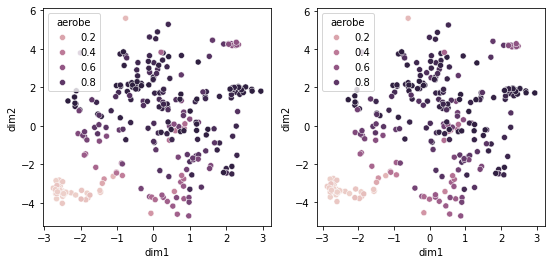

In [379]:
fig = plt.figure(figsize=(9, 4))
ax = fig.add_subplot(1, 2, 1)
sns.scatterplot(data=tsne_plotdf1, x='dim1', y='dim2', hue=tsne_input_data['aerobe'])

ax = fig.add_subplot(1, 2, 2)
sns.scatterplot(data=tsne_plotdf2, x='dim1', y='dim2', hue=tsne_input_data['aerobe'])


In [380]:
GRID_SIZE = 32 #int(np.ceil(np.sqrt(N_CELLS)))
grid_spots1 = np.array(list(itertools.product(np.linspace(tsne_plotdf1['dim1'].min(),
                             tsne_plotdf1['dim1'].max(),
                             GRID_SIZE),
                  np.linspace(tsne_plotdf1['dim2'].min(),
                             tsne_plotdf1['dim2'].max(),
                             GRID_SIZE)))).reshape(GRID_SIZE, GRID_SIZE, 2)

grid_spots2 = np.array(list(itertools.product(np.linspace(tsne_plotdf2['dim1'].min(),
                             tsne_plotdf2['dim1'].max(),
                             GRID_SIZE),
                  np.linspace(tsne_plotdf2['dim2'].min(),
                             tsne_plotdf2['dim2'].max(),
                             GRID_SIZE)))).reshape(GRID_SIZE, GRID_SIZE, 2)

In [381]:
tsne_grid = gridify2(tsne_plotdf1.values, tsne_plotdf2.values, GRID_SIZE, weight1=1, weight2=1)

In [382]:
tsne_grid_df = pd.DataFrame(tsne_grid, index=tsne_plotdf1.index, columns=['dim1', 'dim2'])

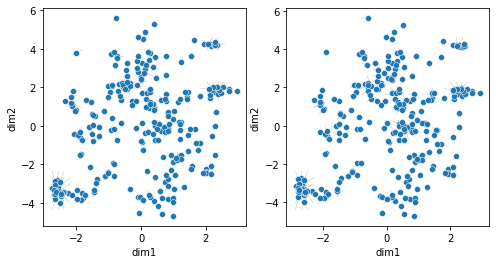

In [383]:
# plot to visualizing snapping
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,2,1)
sns.scatterplot(data=tsne_plotdf1, x='dim1', y='dim2')
for index, row in tsne_grid_df.iterrows():
    grid_x, grid_y = grid_spots1[tsne_grid_df.loc[index, 'dim1']][tsne_grid_df.loc[index, 'dim2']]
    plt.plot((grid_x, tsne_plotdf1.loc[index, 'dim1']),
             (grid_y, tsne_plotdf1.loc[index, 'dim2']), color='gray', linewidth=0.25, zorder=0)
    # ax.annotate(index, (grid_x, grid_y))
# assignments
# plt.savefig('/data/mhoffert/fiererlab/periodic_phyla/figures/group_meeting_figures/2025_grid_assignments.png', dpi=400, bbox_inches='tight')


# plot to visualizing snapping
ax = fig.add_subplot(1,2,2)

sns.scatterplot(data=tsne_plotdf2, x='dim1', y='dim2')

for index, row in tsne_grid_df.iterrows():
    grid_x, grid_y = grid_spots2[tsne_grid_df.loc[index, 'dim1']][tsne_grid_df.loc[index, 'dim2']]
    plt.plot((grid_x, tsne_plotdf2.loc[index, 'dim1']),
             (grid_y, tsne_plotdf2.loc[index, 'dim2']), color='gray', linewidth=0.25, zorder=0)
    # ax.annotate(index, (grid_x, grid_y))
# assignments
plt.savefig('/data/mhoffert/fiererlab/periodic_phyla/figures/group_meeting_figures/2025_grid_assignments.png', dpi=400, bbox_inches='tight')


In [389]:
pca_data.columns

tsne2pca_cols = {'aerobe':'aerobe', 
'phototroph': 'phototroph', 
'autotroph':'autotroph', 
'growth_rate':'growth_rate', 
'genome_size':'genome_size',
'gc_content':'gc_percentage'}

In [390]:
# reconstruct original ranges from tsne input data
# tsne_input_data['gc_content']
original_trait_values = pd.DataFrame(columns=tsne_input_data.columns)
for node in tsne_input_data.index:
    leaves = get_leaf_names(node)
    for column in tsne_input_data.columns:
        original_trait_values.loc[node, column] = pca_data.loc[leaves, tsne2pca_cols[column]].median()

In [400]:
original_trait_values

aerobe phototroph autotroph growth_rate gc_content genome_size
c000001  0.060484        0.0       0.0    3.002643  42.654987   2867859.5
c000027  0.069026        0.0       0.0    3.462246  36.922322   1944029.0
c000835  0.668355        0.0       0.0    8.240303   68.71564   2643428.0
c001545  0.772378        0.0       0.0    5.070736  62.423199   4430357.0
c001546  0.563722        0.0       0.0    4.816497  61.842048   3311415.0
...           ...        ...       ...         ...        ...         ...
c003897    0.8201        0.0       0.0    3.854115  58.804534   4852066.0
c003898  0.778015        0.0       0.0    7.690518  66.924112   4242200.0
c002284  0.454171        0.0       0.0    6.407984  52.853034   3573946.0
c001712  0.048764        0.0       0.0    6.134382  62.856711   2874156.0
c000869  0.180959        0.0       0.0    4.988417  61.953973   2564677.5

[272 rows x 6 columns]

<Axes: xlabel='dim1', ylabel='dim2'>

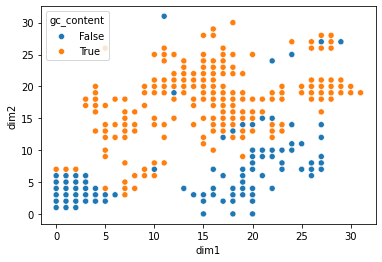

In [391]:
sns.scatterplot(data=tsne_grid_df, x='dim1', y='dim2',
                hue=original_trait_values['gc_content'] > 55)

In [695]:
tsne_grid_df.to_csv('./../finalized_data/2025_tsne_grid_df.tsv', sep='\t')

In [696]:
tsne_plotdf1.to_csv('./../finalized_data/2025_tsne_plotdf1.tsv', sep='\t')
tsne_plotdf2.to_csv('./../finalized_data/2025_tsne_plotdf2.tsv', sep='\t')

### Drawing Figure 4A

In [445]:
custom_titles = ['Oxygen tolerance', 'Phototrophy', 'Autotrophy', 'Growth rate', 'GC content', 'Genome size']
custom_legend_titles = ['p (aerobe)', '% phototrophs', '% autotrophs', 'Est. min.\ndoubling time (h)', '%', 'Mbp']

xticks = [[0, 0.25, 0.5, 0.75, 1],
          [0, 0.25, 0.5, 0.75, 1],
          [0, 0.25, 0.5, 0.75, 1],
          [0.5, 3, 6, 9],
          [30, 40, 50, 60, 70],
          [1e6,3e6,5e6,7e6,8.5e6]]

xticklabels = [['0','', '0.5', '', '1'],
          ['0','', '50', '', '100'],
          ['0','', '50', '', '100'],
          ['0.5', '3', '6', '9'],
          ['30' , '', '50' , '', '70' ],
          ['1', '3', '5', '7', '8.5']]

xaxlabels = ['p (aerobe)',
            '% autotrophic',
            '% phototrophic',
            'Est. min.\ndoubling time (h$^{-1}$)',
            'GC content (%)',
            'Genome size (Mbp)']

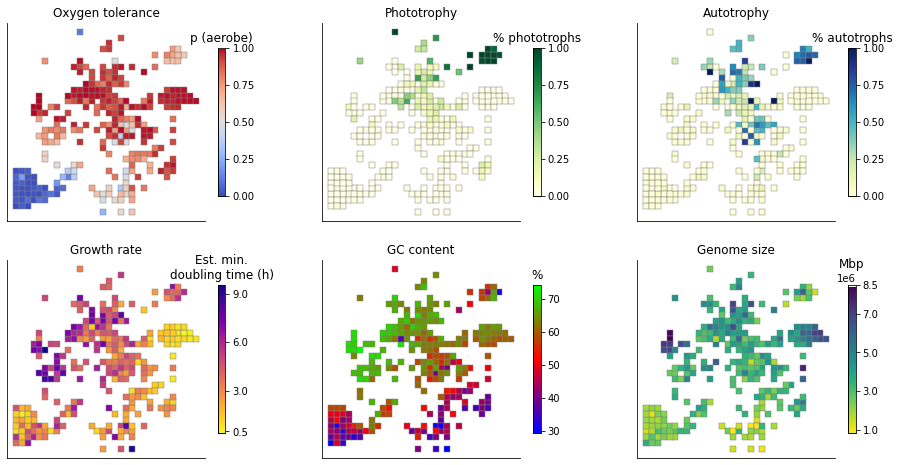

In [498]:
fig = plt.figure(figsize=(16, 8))
i = 1
for (trait, p) in zip(list(tsne_input_data.columns), 
                ['coolwarm', 'YlGn', 'YlGnBu', 'plasma_r', 'brg', 'viridis_r']):
    ax = fig.add_subplot(2,3,i)
    # ax.set_ylim(10, -1)
    ax.set_title(custom_titles[i-1])
    
    # total_unexp = []
    # for leaf in wavelet_tree.get_leaves():
    #     total_unexp.append(unexp_var_df.loc[leaf.name, 'aerobe'])

    sns.scatterplot(data=tsne_grid_df, 
                    x='dim1', y='dim2', 
                    hue=tsne_input_data[trait], 
                    palette=p,
                    marker='s',
                    legend=False, edgecolor='gray')
    
    ax.set_ylabel('')
    ax.set_xlabel('')
    # lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title=custom_legend_titles[i - 1])
    mappable = mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=original_trait_values[trait].min(), 
                                                          vmax=original_trait_values[trait].max()), 
                                                          cmap=mpl.colormaps[p])
    cbar = plt.colorbar(mappable, ax=ax, shrink=0.75)
    cbar.set_ticks(xticks[i-1])
    # cbar.ax.axis('off')
    cbar.ax.set_title(custom_legend_titles[i-1])


    # for index, row in tsne_grid_df.iterrows():
    #     if 'Cyano' in new_leaf_names.loc[index]:
    #         ax.annotate(new_leaf_names.loc[index], (row['dim1'], row['dim2']))
    i += 1
    sns.despine()
    plt.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
    ax.set_aspect('equal')
    
# fig.subplots_adjust(hspace=0.25, wspace=0.25)
plt.savefig('/data/mhoffert/fiererlab/periodic_phyla/figures/2025_wavelet_period_table_placements.svg', bbox_inches='tight')

In [676]:
parent_classes = pd.Series()

for i, name in enumerate(tsne_grid_df.index):
    display(i)
    clear_output(wait=True)
    
    node = gtdb_pruned.search_nodes(name=name)[0]
    while node is not None:
        if '__' in names_map.loc[node.name]:
            parent_classes.loc[name] = names_map.loc[node.name]
            break
            
        node = node.up

parent_classes = parent_classes.apply(lambda x: x.split('__')[-1].split(':')[-1])

271

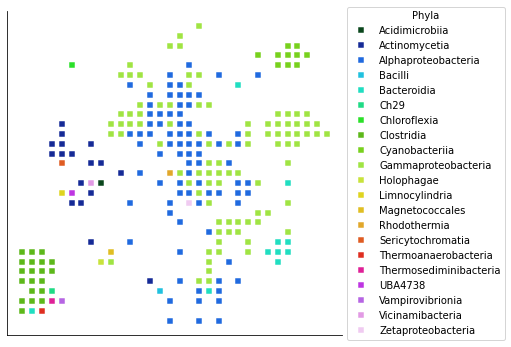

In [675]:


fig, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(data=tsne_grid_df, x='dim1', y='dim2', marker='s',
                hue=parent_classes.fillna('none'), 
                hue_order=sorted(parent_classes.unique()),
                palette=[sns.desaturate(c, 0.75) for c in sns.color_palette('gist_ncar', n_colors=len(parent_classes.unique()))],
                legend=True)# , palette=p)

ax.set_ylabel('')
ax.set_xlabel('')
sns.despine()
ax.set_aspect('equal')
plt.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Phyla')

# plt.savefig('./../figures/2025_wavelet_period_table_placements_taxa_classes.svg', bbox_inches='tight', bbox_extra_artists=(lgd,))

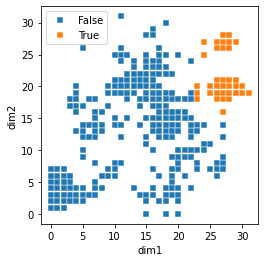

In [692]:
title = 'Diversity of Bacteroidota'

fig, ax = plt.subplots()
sns.scatterplot(data=tsne_grid_df, x='dim1', y='dim2',
                # hue=parent_classes.eq('Pseudomonadales'), 
                hue=tsne_grid_df.index.isin(tsne_grid_df[(tsne_grid_df['dim1'] > 22) & (tsne_grid_df['dim2'] > 15)].index),
                marker='s')
# ax.set
ax.set_aspect('equal')


In [693]:
parent_classes.loc[tsne_grid_df[(tsne_grid_df['dim1'] > 22) & (tsne_grid_df['dim2'] > 15)].index]

c000581                   Gloeobacterales
c000813                          PCC-7336
c001101                    Cyanobacteriia
c001477                Gloeomargaritaceae
c001979                      Cyanobiaceae
RS_GCF_008807075_1           Cyanobiaceae
c005493                      Cyanobiaceae
c005494                      Cyanobiaceae
c003350                      Cyanobiaceae
c002594                      Cyanobiaceae
c059567                  Burkholderiaceae
c056451                     Oleiphilaceae
RS_GCF_900109735_1       Pseudomonadaceae
c091417                  Pseudomonadaceae
c102621                     Pseudomonas_E
GB_GCA_001830395_1          Pseudomonas_E
c109119                     Pseudomonas_E
c110435                     Pseudomonas_E
c112677                     Pseudomonas_E
c113633                     Pseudomonas_E
c115219                     Pseudomonas_E
c115220                     Pseudomonas_E
c114474                     Pseudomonas_E
c111610                     Pseudo

In [516]:
parent_classes.value_counts()

Proteobacteria      172
Firmicutes_A         24
Actinobacteriota     21
Bacteroidota         13
Cyanobacteria        12
Acidobacteriota       6
Chloroflexota         4
Spirochaetota         1
Planctomycetota       1
Nitrospirota          1
Myxococcota           1
Bdellovibrionota      1
Desulfobacterota      1
Marinisomatota        1
Gemmatimonadota       1
Fibrobacterota        1
Patescibacteria       1
Firmicutes_D          1
Firmicutes_G          1
Armatimonadota        1
Elusimicrobiota       1
Name: count, dtype: int64

In [459]:
method = 'both'

## Tree diagram

In [612]:
import networkx as nx
import json
import webbrowser

In [613]:
import re

In [614]:
def collapse_to_table(node):
    if node.is_leaf():
        return True
    else:
        return all([not n.name in tsne_grid_df.index for n in node.traverse()])

In [616]:
table_tree = collapseTree(wavelet_tree, collapse_to_table)

table_tree.describe()

Number of leaf nodes:	272
Total number of nodes:	543
Rooted:	Yes
Most distant node:	c119533
Max. distance:	1.837630


In [617]:
"""
Code for drawing tree with labeled internal nodes
"""
def layout_collapsed(node):
    # print(node.name)
                
    internal_ns = NodeStyle()
    internal_ns['size'] = 0
    
    # if node.is_leaf():
    if '__' in names_map.loc[node.name]:
        new_name = names_map.loc[node.name]

        faces.add_face_to_node(TextFace(f" {new_name}", fsize=6), node, column=0)
        
#         num_leaves = len(gtdb_full.search_nodes(name=node.name)[0].get_leaves())
#         # faces.add_face_to_node(TextFace(f"      {num_leaves}", fsize=6), node, column=2, position='aligned')
    
#         face_color='k'
# #         if num_leaves >= 1900:
            
# #             face_color='red'
            
#         # face_color = node_size_cmap(len(node.get_leaves()) / 2000)
        
#         R1 = RectFace(width=np.random.random(1)[0]*5, #num_leaves / 100,
#                       height=c[node.name], 
#               fgcolor=face_color,
#               bgcolor=face_color)
#         faces.add_face_to_node(R1, node, 3, position='aligned')

        
#     internal_ns['fgcolor'] = face_color
#     internal_ns['size'] = 0

    node.img_style = internal_ns

ts = TreeStyle()
# ts.mode = 'c'
ts.layout_fn = layout_collapsed
ts.scale=400
ts.show_leaf_name = False
ts.draw_guiding_lines = False

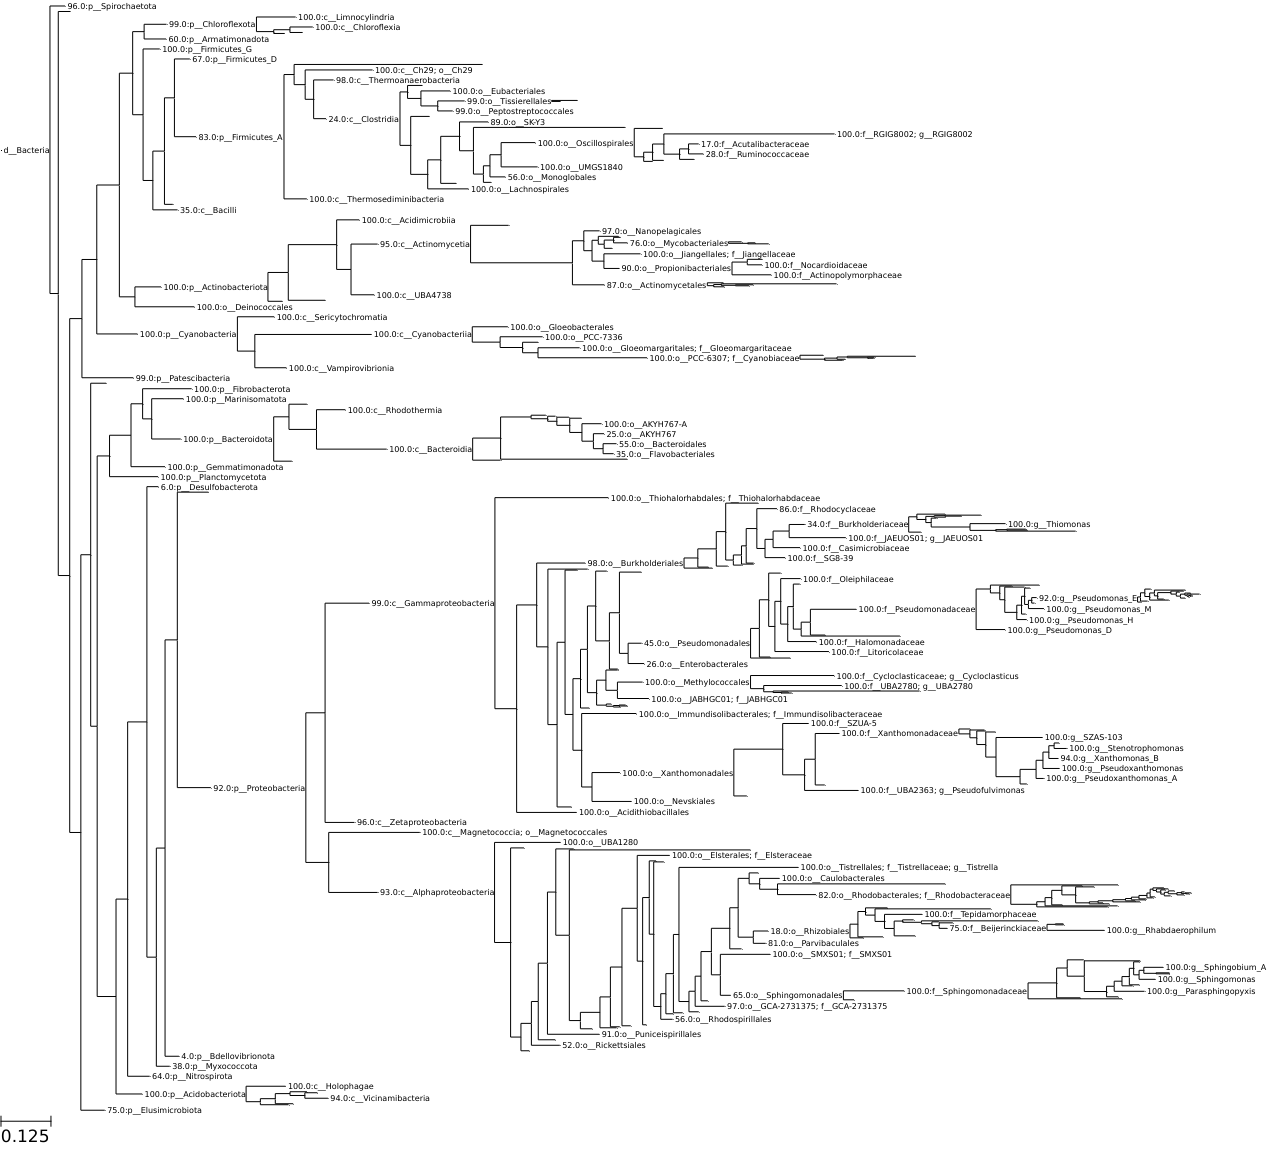

In [618]:
table_tree.render('%%inline', tree_style=ts)

In [619]:
# def layout_collapsed(node):
#     # print(node.name)
                
#     internal_ns = NodeStyle()
#     internal_ns['size'] = 0
    
#     # if node.is_leaf():
#     if '__' in names_map.loc[node.name]:
#         new_name = names_map.loc[node.name]

#         faces.add_face_to_node(TextFace(f" {new_name}", fsize=6), node, column=0)


#     node.img_style = internal_ns


# def get_ts():
#     ts = TreeStyle()
#     # ts.mode = 'c'
#     ts.layout_fn = layout_collapsed
#     ts.scale=400
#     ts.show_leaf_name = False
#     ts.draw_guiding_lines = False
#     return ts
    


# test = wavelet_tree.search_nodes(name='c056452')[0]
# test.describe()



# new_test = collapseTree(test, collapse_to_table)
# new_test.describe()

# test.render('%%inline', tree_style=get_ts())

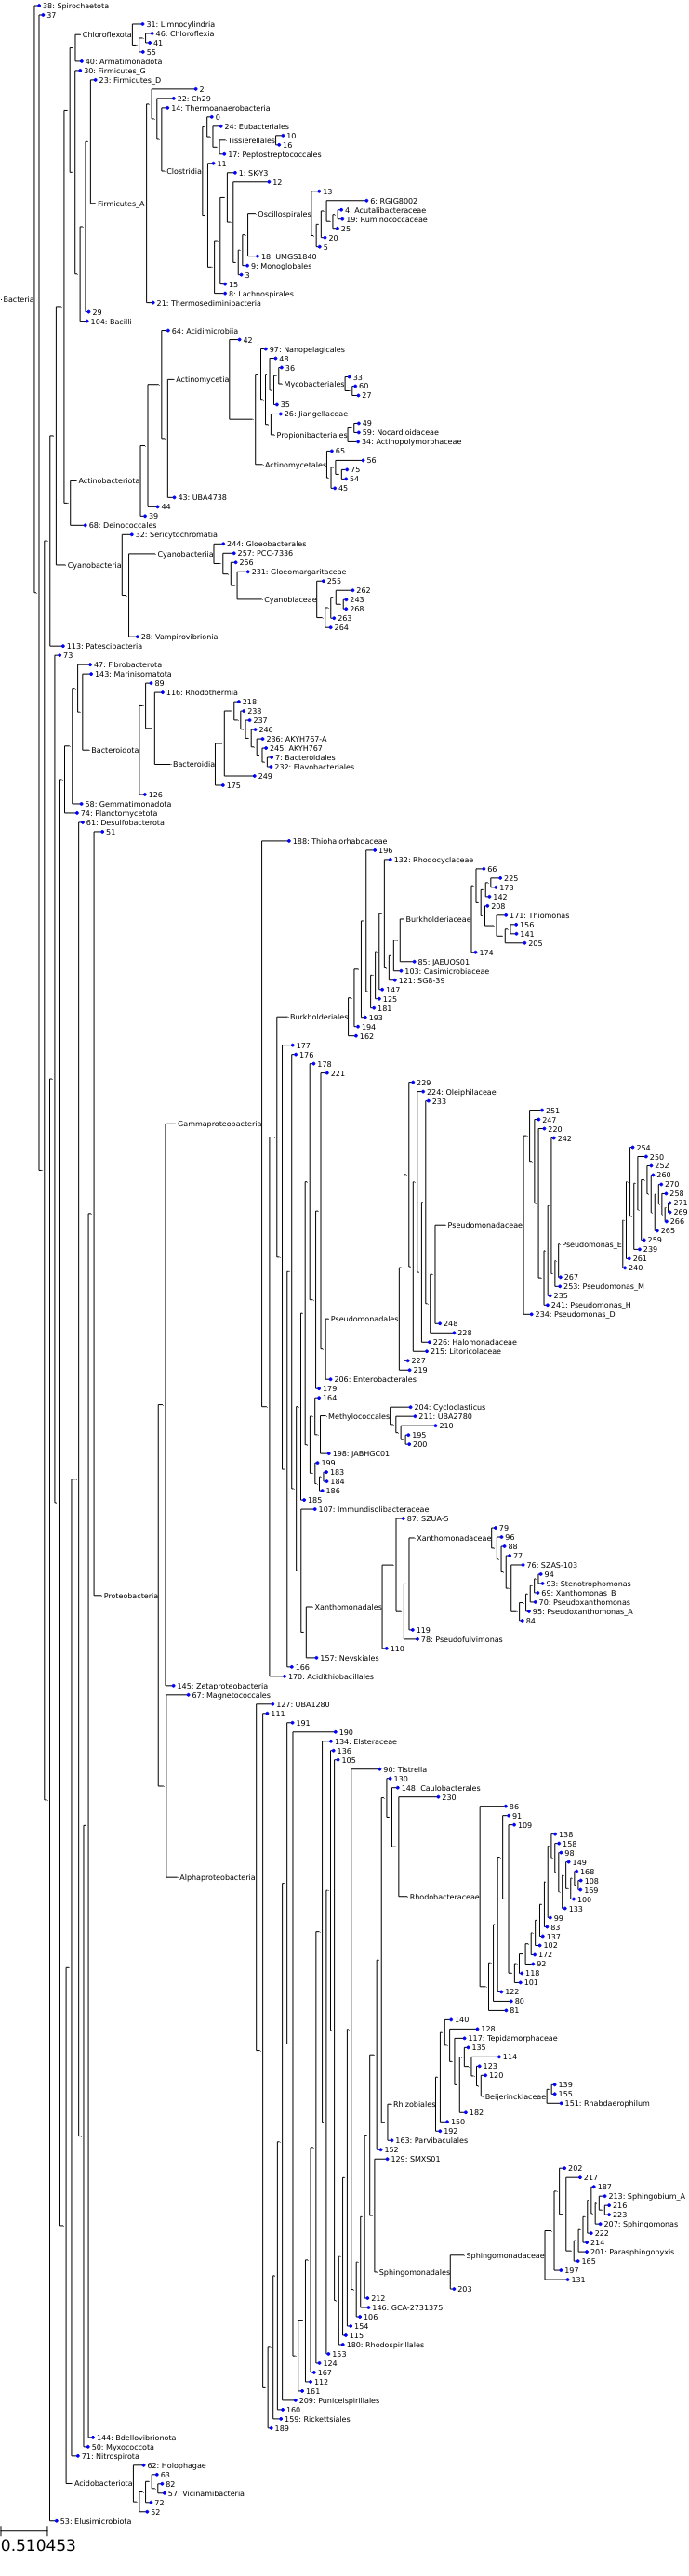

In [620]:
order = list(tsne_grid_df.sort_values(['dim1', 'dim2']).index.values)

def assign_labels(name):
    label = ''
    if name in tsne_grid_df.index:
        label = f'{order.index(name)}'
        if '__' in names_map.loc[name]:
            label = label + ': ' + names_map.loc[name].split('__')[-1]
        
    return label

def assign_labels_all(name):
    label = ''
    # if name in tsne_grid_df.index:
        # label = f'{order.index(name)}'
    if '__' in names_map.loc[name]:
        label = names_map.loc[name].split('__')[-1]
        
    if name in tsne_grid_df.index:
        if label != '':
            label = f'{order.index(name)}: ' + label
        else:
            label = f'{order.index(name)}'
        
    return label
        

def layout_collapsed_labels(node, labels):
    # print(node.name)
                
    internal_ns = NodeStyle()
    internal_ns['size'] = 0
    
    # if node.is_leaf():
    # if any([n.name in tsne_grid_df.index for n in node.traverse()]):
    #     internal_ns['fgcolor'] = 'red'
    #     internal_ns['size'] = 3
        
    if node.name in tsne_grid_df.index:
        internal_ns['fgcolor'] = 'blue'
        internal_ns['size'] = 3
    
    new_name = labels[node.name]
    faces.add_face_to_node(TextFace(f" {new_name}", fsize=6), node, column=0)

    node.img_style = internal_ns
    
def get_ts_labels(labels):
    ts = TreeStyle()
    # ts.mode = 'c'
    ts.layout_fn = lambda n: layout_collapsed_labels(n, labels)
    # ts.scale=400
    ts.show_leaf_name = False
    ts.draw_guiding_lines = False
    return ts

new_test_labels =  dict((l.name, assign_labels_all(l.name)) for l in table_tree.traverse())
# new_test_labels['c056452'] = 'blah'

table_tree.render('%%inline', tree_style=get_ts_labels(new_test_labels))



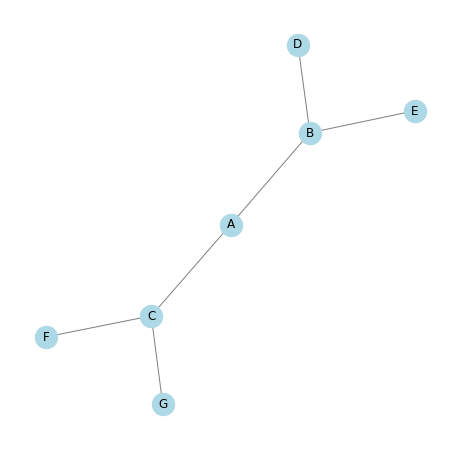

In [621]:
def draw_unrooted_tree(tree, labels=None):
    """
    Draws an unrooted version of a binary tree.
    
    Parameters:
    tree (networkx.Graph): A networkx graph representing the binary tree.
    labels (dict): A dictionary mapping nodes to labels.
    """
    # Convert tree to undirected for unrooted representation
    unrooted_tree = tree.to_undirected()
    
    # Compute layout
    pos = nx.spring_layout(tree, seed=42)
    
    # Draw tree
    fig, ax = plt.subplots(figsize=(8, 8))
    nx.draw(unrooted_tree, pos, with_labels=True, labels=labels, node_size=500, node_color="lightblue", edge_color="gray", ax=ax)
    plt.show()
    return pos

def ete3_to_networkx(ete_tree):
    """
    Converts an ete3 Tree to a networkx graph.
    
    Parameters:
    ete_tree (ete3.Tree): An ete3 tree object.
    
    Returns:
    networkx.Graph: A NetworkX representation of the tree.
    """
    graph = nx.Graph()
    
    def add_edges(node):
        for child in node.children:
            if node.name and child.name:
                graph.add_edge(node.name, child.name)
            add_edges(child)
    
    add_edges(ete_tree)
    return graph

# Example usage
if __name__ == "__main__":
    # Create a sample binary tree
    tree = nx.Graph()
    tree.add_edges_from([("A", "B"), ("A", "C"), ("B", "D"), ("B", "E"), ("C", "F"), ("C", "G")])
    
    # Labels for interior nodes
    labels = {"A": "A", "B": "B", "C": "C", "D": "D", "E": "E", "F": "F", "G": "G"}
    
    pos = draw_unrooted_tree(tree, labels)

In [622]:
n_leaves = pd.Series(index=[l.name for l in gtdb_pruned.traverse()],
    data=[len(l.get_leaves()) for l in gtdb_pruned.traverse()])

divide by zero encountered in log


<Axes: >

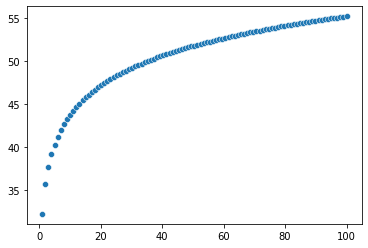

In [623]:
sns.scatterplot(x=np.linspace(0, 100, 100), y=[np.log(i)*5 for i in np.linspace(0, 62000, 100)])

In [624]:

def generate_cytoscape_html(elements_dict, template_path, output_path):
    """
    Generate a Cytoscape HTML file by replacing the elements variable in a template.
    
    Args:
        elements_dict (dict/list): Python dictionary or list containing Cytoscape elements
        template_path (str): Path to the template HTML file
        output_path (str): Path to save the generated HTML file
    
    Returns:
        bool: True if successful, False otherwise
    """
    try:
        # Read the template file
        with open(template_path, 'r', encoding='utf-8') as file:
            template_content = file.read()
        
        # Convert the Python dictionary to a JSON string
        elements_json = json.dumps(elements_dict)
        
        # Replace the elements in the template using regex
        # This pattern looks for elements: [...] with optional whitespace
        pattern = r'elements:\s*\[.*?\]'
        replacement = f'elements: {elements_json}'
        
        # Use re.DOTALL to match across multiple lines
        new_content = re.sub(pattern, replacement, template_content, flags=re.DOTALL)
        
        # Write the new content to the output file
        with open(output_path, 'w', encoding='utf-8') as file:
            file.write(new_content)
        
        print(f"Successfully generated Cytoscape HTML at: {output_path}")
        return True
    
    except Exception as e:
        print(f"Error generating Cytoscape HTML: {str(e)}")
        return False

norm = mpl.colors.Normalize(n_leaves.min(), n_leaves.max())
    
def write_nx_html(G, pos, labels):
    # Convert NetworkX graph to Cytoscape.js format
    elements = []
    for node in G.nodes:
        position = pos.get(node, None)  # Use predefined position if available
        elements.append({
            "data": {"id": str(node), 'label':str(labels[node]), 'leafcount':int(np.max([np.log(n_leaves.loc[node]) * 2, 1]))}, 
            "position": dict((l, p*1000) for l,p in zip(['x', 'y'], position))
        })

    for edge in G.edges:
        elements.append({
            "data": {"source": str(edge[0]), "target": str(edge[1])}
        })
    
        
    return elements

Successfully generated Cytoscape HTML at: ./../figures/wavelet_tree.html
CPU times: user 5.97 s, sys: 5.62 ms, total: 5.97 s
Wall time: 5.97 s


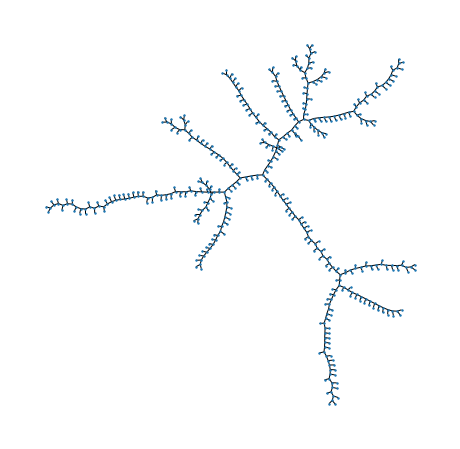

In [625]:
%%time

'''
Use networkx to draw maplotlib-enabled visualization of collapsed tree
'''

g = ete3_to_networkx(wavelet_tree)
# labels = dict((l, assign_labels(l)) for l in list(g.nodes)) # names_map.loc[list(g.nodes)].apply(lambda x: x.split('__')[-1] if '__' in x else '').to_dict()
labels = dict((l, '') for l in list(g.nodes)) # names_map.loc[list(g.nodes)].apply(lambda x: x.split('__')[-1] if '__' in x else '').to_dict()

unrooted_tree = g.to_undirected()
pos = nx.kamada_kawai_layout(unrooted_tree) #, pos=initial_pos, fixed=phyla)

elements = write_nx_html(unrooted_tree, pos, labels)

generate_cytoscape_html(elements, 'improved-cytoscape-tree.html', './../figures/wavelet_tree.html')

optimal_distance = {}
for col in wavelet_distances.columns:
    optimal_distance[col] = wavelet_distances[col].to_dict()

pos = nx.kamada_kawai_layout(unrooted_tree, scale=2) #, pos=initial_pos, fixed=phyla)

fig, ax = plt.subplots(figsize=(8,8))
nx.draw(unrooted_tree, pos, ax=ax, node_size=2)

# Code for drawing data grid diagram starts here

In [626]:
def place_label(start, end, offset=0.1):
    """
    Determines the position and alignment for a label near the end of a vector.
    
    Parameters:
    - start: tuple (x1, y1) - start point of the vector
    - end: tuple (x2, y2) - end point of the vector
    - offset: float - fraction of vector length to offset label
    
    Returns:
    - (x, y): tuple - position for the label
    - horizontal_align: str - 'left', 'right', or 'center'
    - vertical_align: str - 'top', 'center', or 'bottom'
    """
    x1, y1 = start
    x2, y2 = end
    dx, dy = x2 - x1, y2 - y1
    length = np.hypot(dx, dy)
    
    if length == 0:
        return (x2, y2), 'center', 'center'  # Default to center if no movement
    
    # Normalize vector
    ux, uy = dx / length, dy / length
    
    # Determine label placement
    if abs(ux) > abs(uy):  # More horizontal than vertical
        x_offset = np.sign(ux) * offset * length
        y_offset = 0
        horizontal_align = 'left' if ux > 0 else 'right'
        vertical_align = 'center'
    else:  # More vertical than horizontal
        x_offset = 0
        y_offset = np.sign(uy) * offset * length
        horizontal_align = 'center'
        vertical_align = 'bottom' if uy > 0 else 'top'
    
    return (x2 + x_offset, y2 + y_offset), horizontal_align, vertical_align

In [627]:
from matplotlib.patches import Polygon

In [628]:
def draw_encircling(search_node, pos, table_tree, n_points=100, offset=3, depth=3):
    found_node = table_tree.search_nodes(name=search_node)[0]
    boundary = [(pos[search_node] + pos[found_node.up.name]) / 2]
    for node in found_node.traverse(strategy='postorder'):
        if node.is_leaf():
            extended_point, _, _ = place_label(pos[node.up.name], pos[node.name], offset=offset)
            boundary.append(extended_point)

    # hull = ConvexHull(np.array(boundary))
    # vertices = np.array([boundary[v] for v in hull.vertices] + [boundary[hull.vertices[0]]])
    
    hull = ConvexHull(boundary)
    vertices = np.array([boundary[v] for v in hull.vertices])

    mid1 = vertices[:2].mean(0)
    vertices = np.insert(vertices, 1, [mid1], axis=0)
    mid2 = vertices[[0, -1]].mean(0)
    vertices = np.append([mid2], vertices, axis=0)
    vertices = np.append(vertices, vertices[:1], axis=0)

    b_vertices = recursive_midpoints(vertices, depth=depth)
    bezier = bezier_curve(b_vertices, 50)
    
    # plt.plot(vertices[:, 0], vertices[:, 1], color='gray', zorder=0)

    # temp = np.append([vertices[-2:].mean(0)], vertices[:-1], axis=0)
    # temp = np.append(temp, [vertices[-2:].mean(0)], axis=0)
    # bezier_points = bezier_curve(temp, n_points, tension)
    # plt.scatter(temp[:, 0], temp[:, 1], color='blue')
    patch=Polygon(bezier)
    return patch
    # plt.plot(bezier[:, 0], bezier[:, 1], 'r-', label='Smooth curve', zorder=0)

def recursive_midpoints(points, depth=0):
    """
    Recursively compute midpoints of adjacent points in a given array.
    
    Parameters:
    - points: Array of points (expected to form a polygon/hull)
    - depth: Number of recursive subdivisions to perform
    
    Returns:
    - Array of points with midpoints inserted to the specified depth,
      preserving the correct ordering
    """
    points = np.array(points)
    
    # Base case: if depth is 0, return the original points
    if depth == 0:
        return points
    
    # For depth > 0, compute midpoints between adjacent points
    result = []
    n = len(points)
    
    for i in range(n):
        # Add the current point
        result.append(points[i])
        
        # Compute the midpoint between current point and next point
        # For the last point, the next point is the first one (closed loop)
        next_idx = (i + 1) % n
        midpoint = (points[i] + points[next_idx]) / 2
        result.append(midpoint)
    
    # Convert to numpy array
    result = np.array(result)
    
    # Recursively compute midpoints for the next depth level
    if depth > 1:
        return recursive_midpoints(result, depth - 1)
    else:
        return result
    
def bezier_curve(control_points, num_points=100):
    # De Casteljau's Algorithm to compute Bézier curve
    def de_casteljau(control_points, t):
        while len(control_points) > 1:
            control_points = [(1 - t) * control_points[i] + t * control_points[i + 1] for i in range(len(control_points) - 1)]
        return control_points[0]
    
    # Create non-linear t values based on tension factor
    t_values = np.linspace(0, 1, num_points)
    # t_values = t_values ** tension  # Adjust the tension
    
    # Compute Bézier curve for each t
    curve_points = np.array([de_casteljau(control_points, t) for t in t_values])
    
    return curve_points

In [629]:
points = np.random.random_integers(0, 10, (20, 2))


This function is deprecated. Please call randint(0, 10 + 1) instead


In [630]:
from scipy.spatial import ConvexHull

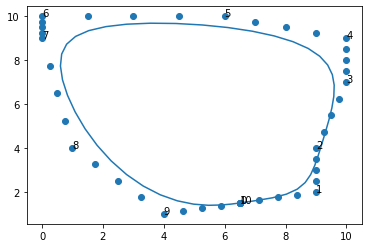

In [631]:
fig, ax = plt.subplots(figsize=(6, 4))
hull = ConvexHull(points)
vertices = np.array([points[v] for v in hull.vertices])

mid1 = vertices[:2].mean(0)
vertices = np.insert(vertices, 1, [mid1], axis=0)
mid2 = vertices[[0, -1]].mean(0)
vertices = np.append([mid2], vertices, axis=0)
vertices = np.append(vertices, vertices[:1], axis=0)

for i, v in enumerate(vertices):
    ax.annotate(f'{i}', v)

b_vertices = recursive_midpoints(vertices, depth=2)
bezier = bezier_curve(b_vertices, 50)
plt.scatter(b_vertices[:, 0], b_vertices[:, 1])
plt.plot(bezier[:, 0], bezier[:, 1])

In [632]:
curr_tree = wavelet_tree.copy()

In [643]:
phyla = []
for node in curr_tree.traverse():
    if 'p__' in names_map.loc[node.name]:
        phyla.append(node.name)
        
phyla_cmap = dict((p, sns.desaturate(c, 0.9)) for p, c in zip(phyla, sns.color_palette('Grays', n_colors=len(phyla))))

c003898


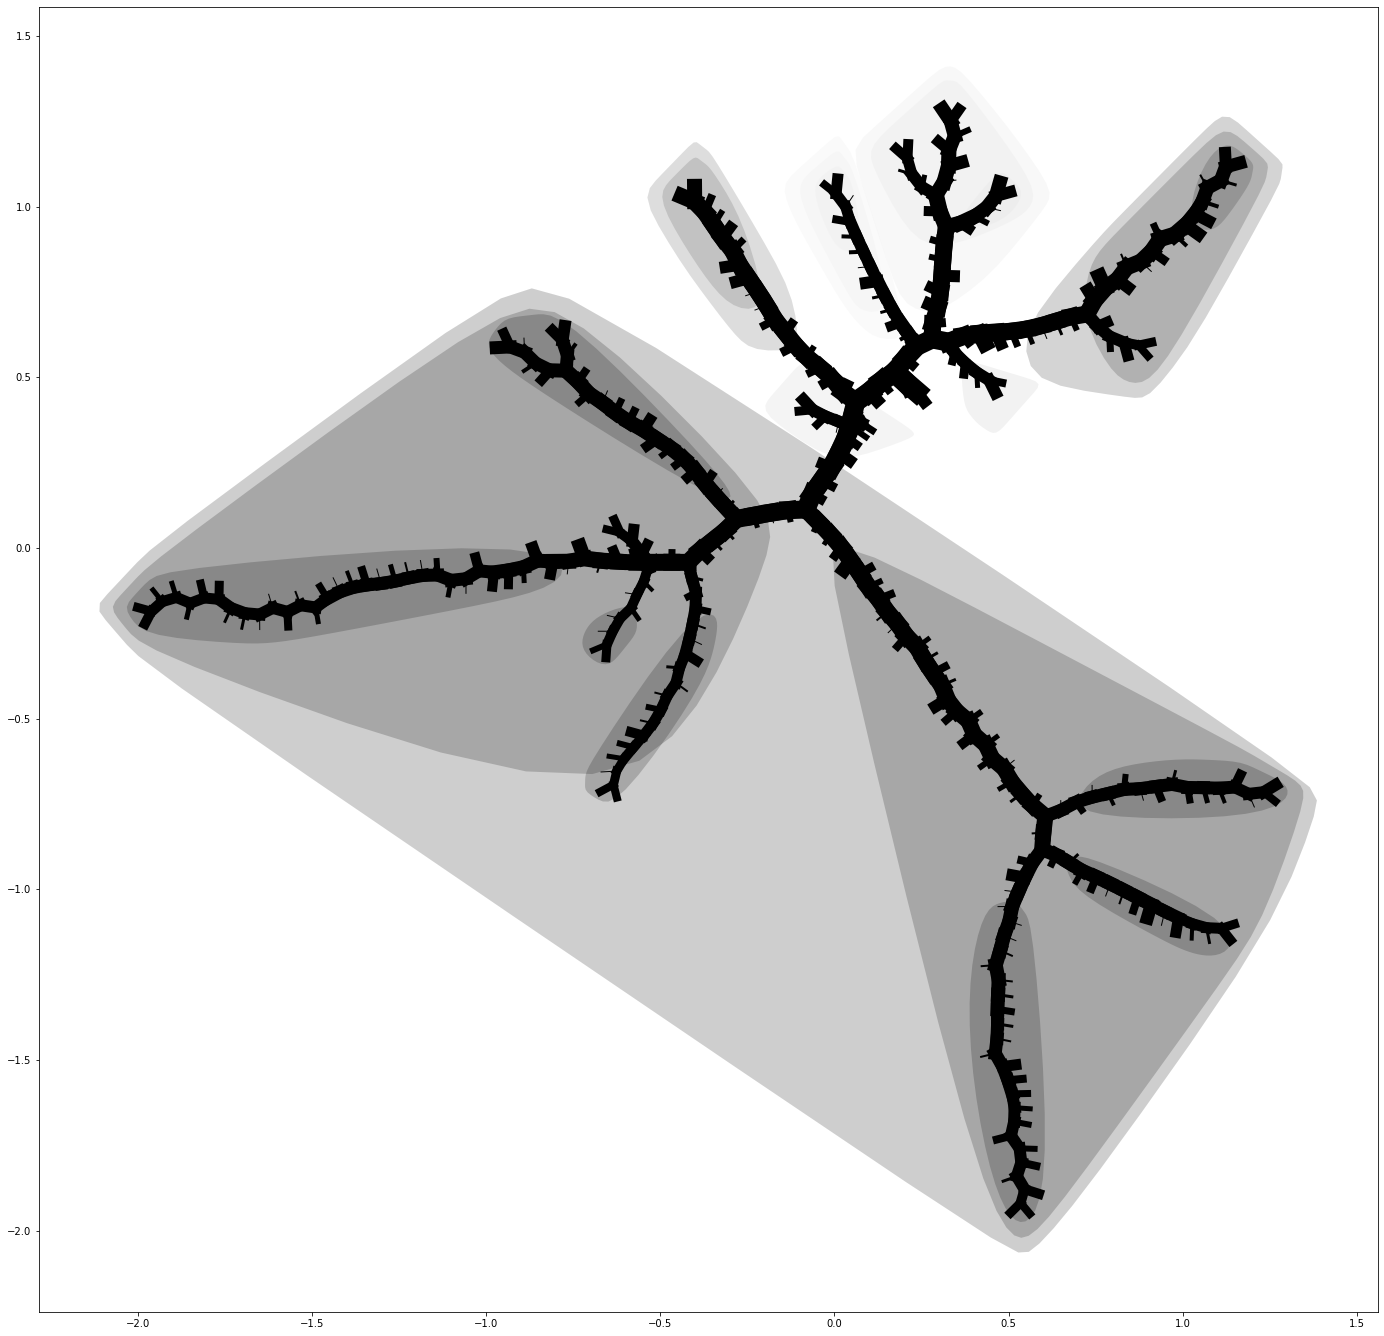

In [644]:
fig, ax = plt.subplots(figsize=(24,24))
boundary = []
nodedata = [d for d in elements if 'id' in d['data'].keys()]
for i, edge in enumerate(list(g.edges)):
    # if i % 10 == 0:
    display(i)
    clear_output(wait=True)
    print(edge[1])
    for d in elements:
        if  d['data']['id'] == edge[1]:
            curr_nodedata = d['data']
            break
    # ax.scatter(x=pos[edge[0]][0], y=pos[edge[0]][1], color='k')
    # ax.scatter(x=pos[edge[1]][0], y=pos[edge[1]][1], color='k')
    if edge[1] in tsne_grid_df.index or not curr_tree.search_nodes(name=edge[1])[0].is_leaf():
        color='k'
        zorder=2
    else:
        color='lightgray'
        zorder=1
        
    plt.plot([pos[edge[0]][0], pos[edge[1]][0]], 
            [pos[edge[0]][1], pos[edge[1]][1]], 
             color=color, linewidth=curr_nodedata['leafcount'], 
            solid_capstyle='projecting', zorder=zorder)
    
    if edge[1] in tsne_grid_df.index:
        # print(edge)
        xy, _ha, _va = place_label(pos[edge[0]], pos[edge[1]], offset=0.75)
        
#         ax.annotate(hilbert_locmap.loc[edge[1]], #order.index(edge[1]), 
#                     xy, ha=_ha, va=_va, zorder=2, fontsize=12)
        
        
    
    # if is_leaf(table_tree, edge[1]):
    #     boundary.append(pos[edge[1]])
    #     extended_point, _, _ = place_label(pos[edge[0]], pos[edge[1]], offset=1)
    #     plt.scatter(extended_point[0], extended_point[1], color='r')
        
    if any(l in names_map.loc[edge[1]] for l in ['p__', 'c__', 'o__']):
        offset_index = ['blah', 'o', 'c', 'p']
        offset = offset_index.index(names_map.loc[edge[1]].split(':')[-1].split('__')[0])
        node = curr_tree.search_nodes(name=edge[1])[0]
        n_it = 0
        while node is not None:
            if 'p__' in names_map.loc[node.name]:
                save_name = node.name
            node = node.up
            n_it += 1
            
        # print(n_it, save_name, names_map.loc[edge[1]])    
        color = phyla_cmap[save_name]
        
        if len(curr_tree.search_nodes(name=edge[1])[0].get_leaves()) > 3:
            p = draw_encircling(edge[1], pos, curr_tree, offset=offset, depth=offset + 2)
            p.set_facecolor(sns.desaturate(mpl.colors.to_rgba(color), 0.6))
            p.set_alpha(0.2)
            ax.add_patch(p)
            
    
            
plt.savefig('test.svg')

In [ ]:
def discover_upper_taxon(curr_tax, node, gtdb_pruned):
    while curr_tax :
        node.up

c003898


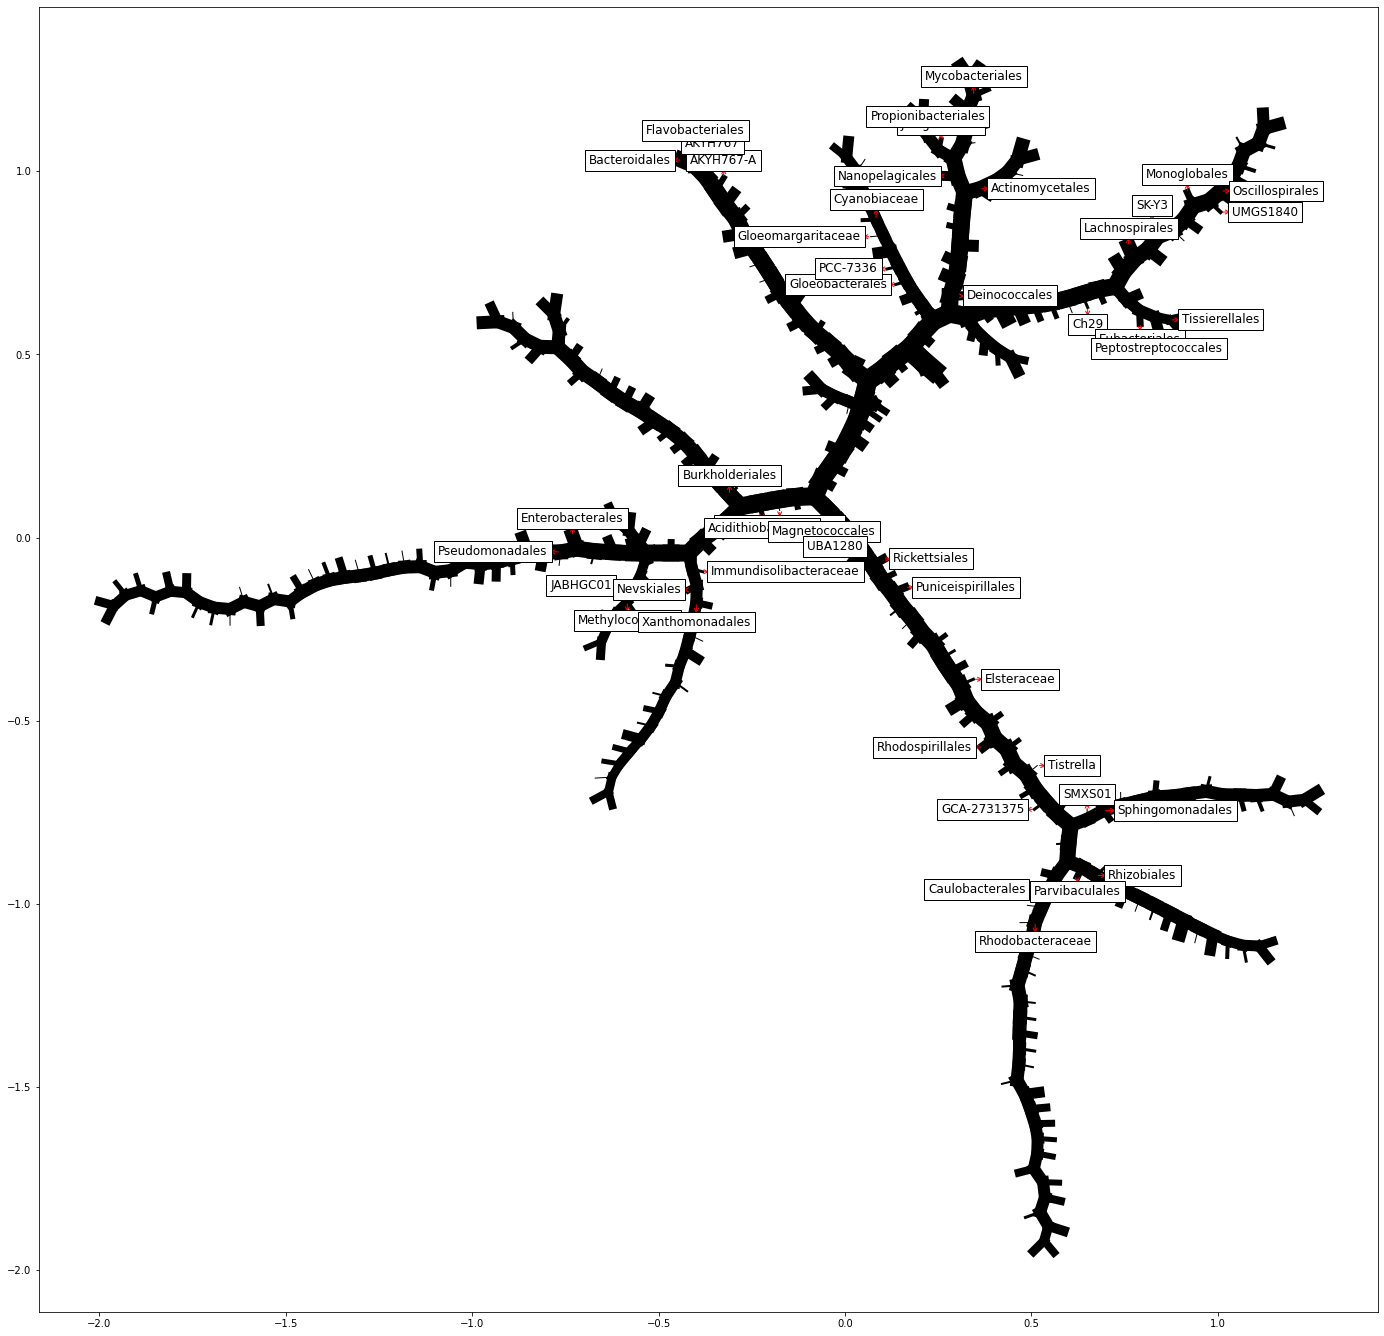

In [682]:
fig, ax = plt.subplots(figsize=(24,24))
boundary = []
nodedata = [d for d in elements if 'id' in d['data'].keys()]
for i, edge in enumerate(list(g.edges)):
    # if i % 10 == 0:
    display(i)
    clear_output(wait=True)
    print(edge[1])
    for d in elements:
        if  d['data']['id'] == edge[1]:
            curr_nodedata = d['data']
            break
    # ax.scatter(x=pos[edge[0]][0], y=pos[edge[0]][1], color='k')
    # ax.scatter(x=pos[edge[1]][0], y=pos[edge[1]][1], color='k')
    if edge[1] in tsne_grid_df.index or not curr_tree.search_nodes(name=edge[1])[0].is_leaf():
        color='k'
        zorder=2
    else:
        color='lightgray'
        zorder=1
        
    plt.plot([pos[edge[0]][0], pos[edge[1]][0]], 
            [pos[edge[0]][1], pos[edge[1]][1]], 
             color=color, linewidth=curr_nodedata['leafcount'], 
            solid_capstyle='projecting', zorder=zorder)
    
    if any(s in names_map.loc[edge[1]] for s in ['o__']):#, 'c__', 'o__']):
        xy, _ha, _va = place_label(pos[edge[0]], pos[edge[1]], offset=0.75)
        
        ax.text(s=names_map.loc[edge[1]].split('__')[-1],
                    x=xy[0], y=xy[1], ha=_ha, va=_va, fontsize=12,
                   bbox=dict(facecolor='white', edgecolor='k'), zorder=10)
        
        ax.annotate('', xy,  pos[edge[1]], arrowprops=dict(arrowstyle='->', color='red'))
        
plt.savefig('./../figures/tree_diagram.svg')

In [450]:
# callGraph_constraints = {
#   "relativePlacementConstraint": []
# }

# scale = 20
# count = 0
# for node1 in table_tree.traverse():
#     for node2 in table_tree.traverse():
#         if count % 10000 == 0:
#             display(count)
#             clear_output(wait=True)
#         if ('p__' in names_map.loc[node1.name] and 'p__' in names_map.loc[node2.name]) and (node1.name != node2.name):
#             loc1 = tsne_grid_df.loc[[l.name for l in node1.get_leaves() if l.name in tsne_grid_df.index], :].mean().values
#             loc2 = tsne_grid_df.loc[[l.name for l in node2.get_leaves() if l.name in tsne_grid_df.index], :].mean().values
#             dist = np.linalg.norm(loc1 - loc2) * scale
#             callGraph_constraints['relativePlacementConstraint'] += [{'top':node1.name if loc1[1] > loc2[1] else node2.name,
#                                                                          'bottom':node1.name if loc1[1] < loc2[1] else node2.name,
#                                                                      'gap':int(dist)},
#                                                                        {'left':node1.name if loc1[0] < loc2[0] else node2.name,
#                                                                          'right':node1.name if loc1[0] > loc2[0] else node2.name,
#                                                                        'gap':int(dist)}]
#         count += 1

# with open('placement_constraints.js', 'w') as handle:
#     json.dump(callGraph_constraints, handle)

## imports

In [407]:
from scipy.spatial import ConvexHull
from matplotlib.patches import Polygon
# Identify clusters: naive approach based on proximity
from scipy.spatial.distance import pdist, squareform


from scipy.spatial import KDTree

from scipy.optimize import linprog


import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
import warnings

import matplotlib.patches as patches

## Functions

In [250]:
def generate_test_set(N, M):
    """
    Generate a set of N points with random integer x, y values in range [0, M].
    Ensures each point is horizontally or vertically adjacent to another.
    """
    points = [np.random.randint(0, M + 1, size=2)]  # Start with one random point
    
    while len(points) < N:
        x, y = points[np.random.randint(len(points))]  # Pick an existing point
        if np.random.rand() < 0.5:
            new_point = np.array([x + np.random.choice([-1, 1]), y])  # Horizontal neighbor
        else:
            new_point = np.array([x, y + np.random.choice([-1, 1])])  # Vertical neighbor
        
        if 0 <= new_point[0] <= M and 0 <= new_point[1] <= M:
            points.append(new_point)
    
    return np.unique(np.array(points), axis=0)


def find_boundary_edges(squares):
    """
    Given an (N,2) numpy array integer only (x,y) points
    find the boundaries of squares drawn around these points
    return only boundaries which are not shared
           V
       ___________
       |  . |  . | <-
    -> |    |    |
       -----------
    -> |  . |  . | <-
       |    |    |
       -----------
            ^
    """
    
    # Convert squares to a set for efficient lookup
    square_set = set(map(tuple, squares))
    
    # Count edge occurrences
    edge_counts = {}
    
    # Check edges for each square
    for x, y in square_set:
        # Define all edges of the square
        edges = [
            ((x-0.5, y-0.5), (x+0.5, y-0.5)),  # bottom edge
            ((x+0.5, y-0.5), (x+0.5, y+0.5)),  # right edge
            ((x+0.5, y+0.5), (x-0.5, y+0.5)),  # top edge
            ((x-0.5, y+0.5), (x-0.5, y-0.5))   # left edge
        ]
        
        # Count occurrences of each edge
        for edge in edges:
            # Sort edge points to make edge recognition direction-independent
            sorted_edge = tuple(sorted(edge))
            edge_counts[sorted_edge] = edge_counts.get(sorted_edge, 0) + 1
    
    # Find boundary edges (edges that appear only once)
    boundary_edges = [edge for edge, count in edge_counts.items() if count == 1]
    
    return boundary_edges


def order_edges(edges):
    """
    Order the edges around a set of squares so they can
    be passed to plt.patches.Polygon
    each segment's last point is the next segment's first:
    traverse this way
    """
    
    # If no edges, return empty list
    if not edges:
        return []
    
    # Start with the first edge
    ordered = [edges[0]]
    remaining = set(edges) - {edges[0]}
    
    while remaining:
        # Get the last point of the last edge
        last_point = ordered[-1][1]
        
        # Find the edge that starts with this point
        for edge in list(remaining):
            if edge[0] == last_point:
                ordered.append(edge)
                remaining.remove(edge)
                break
            elif edge[1] == last_point:
                # Reverse the edge if its end point matches
                ordered.append(tuple(reversed(edge)))
                remaining.remove(edge)
                break
        else:
            # If no connected edge is found, break the loop
            break
    
    return ordered

def find_clusters(points, D):
    """
    Find groups of points that are
    at least D adjacent
    """
    
    points = np.array(points)
    tree = KDTree(points)  # Build a KDTree for fast neighbor search
    visited = set()
    clusters = []

    def grow_cluster(start_idx):
        """Expand a cluster starting from a given index."""
        cluster = set()
        queue = {start_idx}

        while queue:
            idx = queue.pop()
            if idx in visited:
                continue
            visited.add(idx)
            cluster.add(idx)
            neighbors = tree.query_ball_point(points[idx], D)
            queue.update(neighbors)  # Add unvisited neighbors to the queue

        return cluster

    for i in range(len(points)):
        if i not in visited:
            cluster = grow_cluster(i)
            clusters.append([points[idx] for idx in cluster])

    return clusters

def shrink_polygon_boundary(polygon, cluster_points, shrink_factor=0.1):
    """
    Shrink polygon boundary while preserving order and respecting cluster points.
    
    Parameters:
    -----------
    polygon : numpy.ndarray
        Original polygon vertices with shape (N, 2)
    cluster_points : numpy.ndarray
        Set of points defining the cluster the polygon surrounds
    shrink_factor : float, optional
        Fraction of inward movement (default: 0.1)
    
    Returns:
    --------
    numpy.ndarray
        Shrunk polygon vertices maintaining original order
    """
    # Compute shrunk vertices
    shrunk_vertices = np.zeros_like(polygon)
    for i, vertex in enumerate(polygon):
        # Compute distances to all cluster points
        distances = np.linalg.norm(cluster_points - vertex, axis=1)
        
        # Find indices of points with minimum distance
        min_distance = np.min(distances)
        min_distance_indices = np.where(np.isclose(distances, min_distance))[0]
        
        # Get cluster points at minimum distance
        nearest_cluster_points = cluster_points[min_distance_indices]
        
        # Compute average movement vector
        movement_vectors = nearest_cluster_points - vertex
        avg_movement = np.median(movement_vectors, axis=0)
        # Move towards average of nearest cluster points
        shrunk_vertices[i] = vertex + shrink_factor * avg_movement
    
    return shrunk_vertices

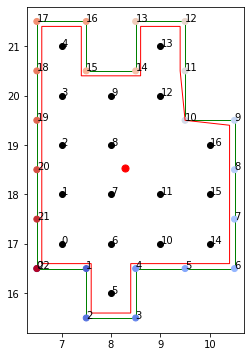

In [251]:
c = generate_test_set(25, GRID_SIZE)

# code test
fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(c[:, 0], c[:, 1], color='k', zorder=2)

# Plot the convex hull
# grid_hull = get_grid_hull(c, 0.5)
# grid_hull = 
# if 'p__' in names_map.loc[node.name]:
#     z=0
#     linewidth=3
# else:
#     z=1
#     linewidth=1

z=1
linewidth=1

boundary = find_boundary_edges(c)
ordered = order_edges(boundary)
grid_hull = np.array([ordered[0][0]] + [np.array(e[-1]) for e in ordered])
hull_patch = Polygon(grid_hull, fill=False, alpha=1, zorder=z, linewidth=linewidth, edgecolor='g')
ax.add_patch(hull_patch)
plt.scatter(grid_hull[:, 0], grid_hull[:, 1], c=range(len(grid_hull)), cmap='coolwarm')

for i, p in enumerate(grid_hull):
    ax.annotate(i, p)
    
for i, p in enumerate(c):
    ax.annotate(i, p)

shrunk_hull_patch = Polygon(shrink_polygon_boundary(grid_hull, c, 0.2), fill=False, alpha=1, zorder=z, linewidth=linewidth, edgecolor='r')
ax.add_patch(shrunk_hull_patch)

centroid = np.mean(c, axis=0)
ax.scatter(*centroid.T, color='r', s=50)
ax.set_aspect('equal')

## draw boundaries around taxa

In [450]:
import copy

In [451]:
'''
Iterate over nodes in wavelet-based tree to determine which
taxonomic groups can be constrained by a box-like diagram
'''
plot_nodes = []
levels = ['p', 'c']
for i, node in enumerate(wavelet_tree.traverse(strategy='preorder')):
        
    # if not node.is_leaf():
        
    if any([f'{l}__' in names_map.loc[node.name] for l in levels]) and not 'Bacteria' in names_map.loc[node.name]:

        # if not node.is_leaf():
            # print(node.name, names_map.loc[node.name], node.is_leaf())

            leaves = [l.name for l in node.get_leaves() if l.name in tsne_grid_df.index]
            # print(len(leaves))

            if len(leaves) > 0:
                plot_nodes.append(node)


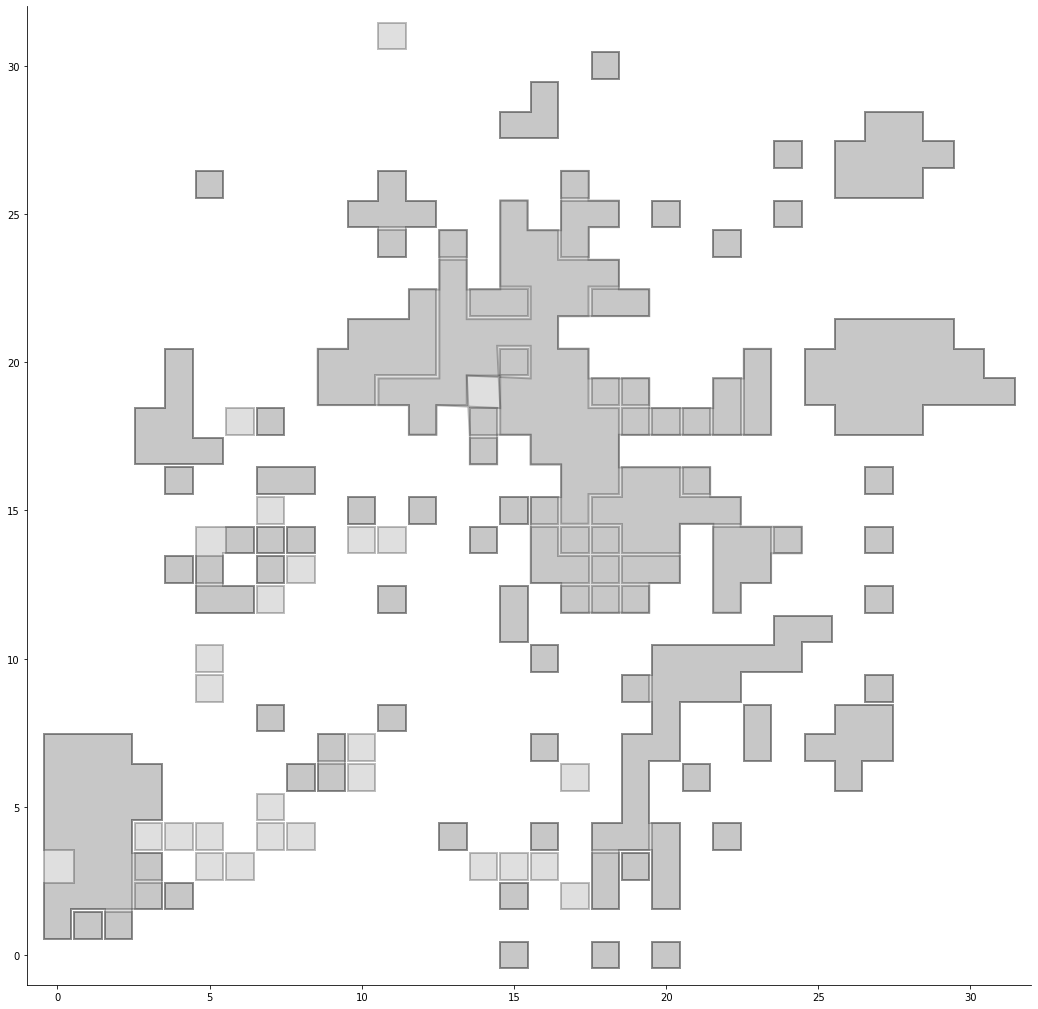

In [452]:
"""
Construct a figure where the gridded points corresponding to leaves in the wavelet tree
have boxes drawn around them which delineate taxonomic groups
"""

fig, ax = plt.subplots(figsize=(18,18))

# sns.scatterplot(data=tsne_grid_df, x='dim1', y='dim2', zorder=1)
ax.set_ylim(-1, GRID_SIZE)
ax.set_xlim(-1, GRID_SIZE)

cmap = mpl.colormaps['Blues']
colors = [cmap(i) for i in np.linspace(0, 1, len(plot_nodes))]
legend_patches = []
hull_patch_list = []

# iterate over nodes
groups = dict(((i,j),'none') for i,j in itertools.product(list(range(GRID_SIZE)), list(range(GRID_SIZE))))

for i, node in enumerate(plot_nodes):
    if i % 100 == 0:
        display(i / len(plot_nodes) * 100)
        clear_output(wait=True)
    # print(node.name, names_map.loc[node.name], node.is_leaf())

    # get leaves in diagram
    leaves = [l.name for l in node.get_leaves() if l.name in tsne_grid_df.index]
    # get where these are in diagram
    points = tsne_grid_df.loc[leaves, :].values
    # separate out clusters
    clusters = find_clusters(points, 1)

    # for each group of points
    for j, c in enumerate(clusters):
        
        # get a color
        color = sns.desaturate(colors[i], 0.75)
        c = np.array(c)
        # scatter the points
        # plt.scatter(c[:, 0], c[:, 1], color=color, zorder=2)
        # set zorder
        # levelind = levels.index(names_map.loc[node.name].split(':')[-1].split('__')[0])
        # if 'p__' in names_map.loc[node.name]:
        # z=0
        # linewidth=2
        sf = 0.1 # + (0.2 * levelind)
        linewidth = 1

        # draw a polygon around the cluster
        boundary = find_boundary_edges(c)
        ordered = order_edges(boundary)
        grid_hull = np.array([ordered[0][0]] + [np.array(e[-1]) for e in ordered])
        
        # legend element
        text = f"{names_map.loc[node.name].split('__')[-1]}"
        if len(clusters) > 1:
            text = text + f" group {j+1}"

        legend_patches.append(patches.Patch(color=color, label=text))
        
        # add patch
        hull_patch = Polygon(shrink_polygon_boundary(grid_hull, c, sf), fill=True,
                             facecolor='gray', 
                             alpha=0.25, zorder=0, linewidth=2, edgecolor='k', gid=text)
        hull_patch_list.append(copy.copy(hull_patch))
        ax.add_patch(hull_patch)
        
        for _c in c:
            x, y = _c[0], _c[1]
            groups[(x,y)] = text
            
        # ax.annotate(text, c.mean(axis=0))
            
            

    count += 1
    
### START OF HILBERT CODE ---------
# grid of points
# Generate a grid of points in 2D space
# x = np.linspace(0, 2**p - 1, 2**p, dtype=int)
# y = np.linspace(0, 2**p - 1, 2**p, dtype=int)
# points = np.array([(xi, yi) for xi in x for yi in y])
# # Map points to 1D using Hilbert curve
# hilbert_indices = encode(points, points.shape[1], p)

# # Sort points by Hilbert index
# sorted_indices = np.argsort(hilbert_indices)
# ordered_points = points[sorted_indices]

# # Plot the Hilbert curve
# # fig, ax = plt.subplots(figsize=(8, 8))
# ax.grid(zorder=0)

# ax.plot(ordered_points[:, 0], ordered_points[:, 1], '-', markersize=2, alpha=0.7, label="Hilbert Curve", zorder=1)
# end hilbert code

# ax.legend(handles=legend_patches, bbox_to_anchor=(1, 0.5), loc='center left')
sns.despine()
plt.savefig('./../figures/wavelet_periodic_table_boxes_nolabels.svg', bbox_inches='tight')
plt.savefig('./../figures/wavelet_periodic_table_boxes_nolabels.png', bbox_inches='tight', dpi=400)

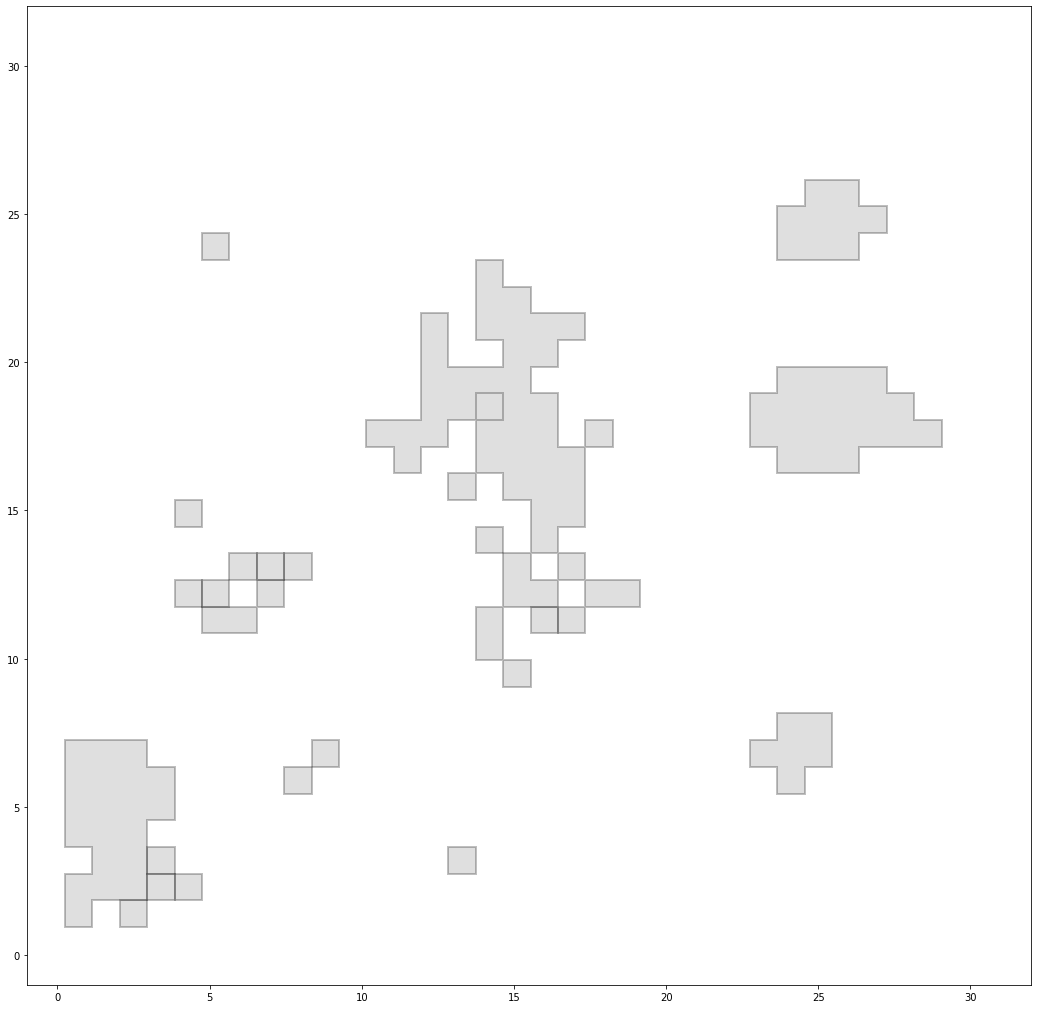

In [642]:

fig, ax = plt.subplots(figsize=(18,18))

# sns.scatterplot(data=tsne_grid_df, x='dim1', y='dim2', zorder=1)
ax.set_ylim(-1, GRID_SIZE)
ax.set_xlim(-1, GRID_SIZE)

# # diagram with box around all members of the clade
# for i, node in enumerate(wavelet_tree.traverse(strategy='preorder')):
        
#     if f'__' in names_map.loc[node.name] and not 'Bacteria' in names_map.loc[node.name]:

for _class in parent_classes.unique():
        leaves = parent_classes[parent_classes.eq(_class)].index
        
        # get leaves in diagram
        # leaves = [l.name for l in node.get_leaves() if l.name in tsne_grid_df.index]
        # get where these are in diagram
        points = tsne_grid_df.loc[leaves, :].values
        
        # draw a polygon around the cluster
        boundary = find_boundary_edges(points)
        ordered = order_edges(boundary)
        grid_hull = np.array([ordered[0][0]] + [np.array(e[-1]) for e in ordered])
        
        # legend element
        # text = f"{names_map.loc[node.name].split('__')[-1]}"
        # if len(clusters) > 1:
        #     text = text + f" group {j+1}"

        legend_patches.append(patches.Patch(color=color, label=_class))
        
        # add patch
        hull_patch = Polygon(shrink_polygon_boundary(grid_hull, c, sf), fill=True,
                             facecolor='gray', 
                             alpha=0.25, zorder=0, linewidth=2, edgecolor='k', gid=text)
        hull_patch_list.append(copy.copy(hull_patch))
        ax.add_patch(hull_patch)
        

# Actual periodic table diagram

In [520]:
tsne_grid_df

dim1  dim2
c000001     5     3
c000027     5     2
c000835     4    13
c001545     5    26
c001546     5    10
...       ...   ...
c003897    11    14
c003898     7    14
c002284    10     7
c001712     7     4
c000869     7     5

[272 rows x 2 columns]

In [521]:
grid_size_reindexer = list(itertools.product(list(range(GRID_SIZE)), list(range(GRID_SIZE))))
pt_index = tsne_grid_df.reset_index().set_index(['dim1', 'dim2']).reindex(grid_size_reindexer)['index'].values #.sort_values(['dim1', 'dim2']) #.sort_values(['dim1', 'dim2']).index

In [522]:
tsne_input_data

aerobe  phototroph  autotroph  growth_rate  gc_content  genome_size
c000001  0.060484    0.004878   0.007317     0.120648    0.444545     0.167376
c000027  0.069026    0.000000   0.010256     0.139195    0.351884     0.108982
c000835  0.668355    0.000000   0.009259     0.332011    0.865783     0.153190
c001545  0.772378    0.421687   0.192771     0.204105    0.764074     0.266138
c001546  0.563722    0.014052   0.049180     0.193845    0.754680     0.195412
...           ...         ...        ...          ...         ...          ...
c003897  0.820100    0.004320   0.002160     0.155009    0.705583     0.292793
c003898  0.778015    0.000000   0.000000     0.309825    0.836826     0.254245
c002284  0.454171    0.000000   0.000000     0.258069    0.609384     0.212006
c001712  0.048764    0.000000   0.033333     0.247028    0.771081     0.167773
c000869  0.180959    0.000000   0.000000     0.200783    0.756490     0.148212

[272 rows x 6 columns]

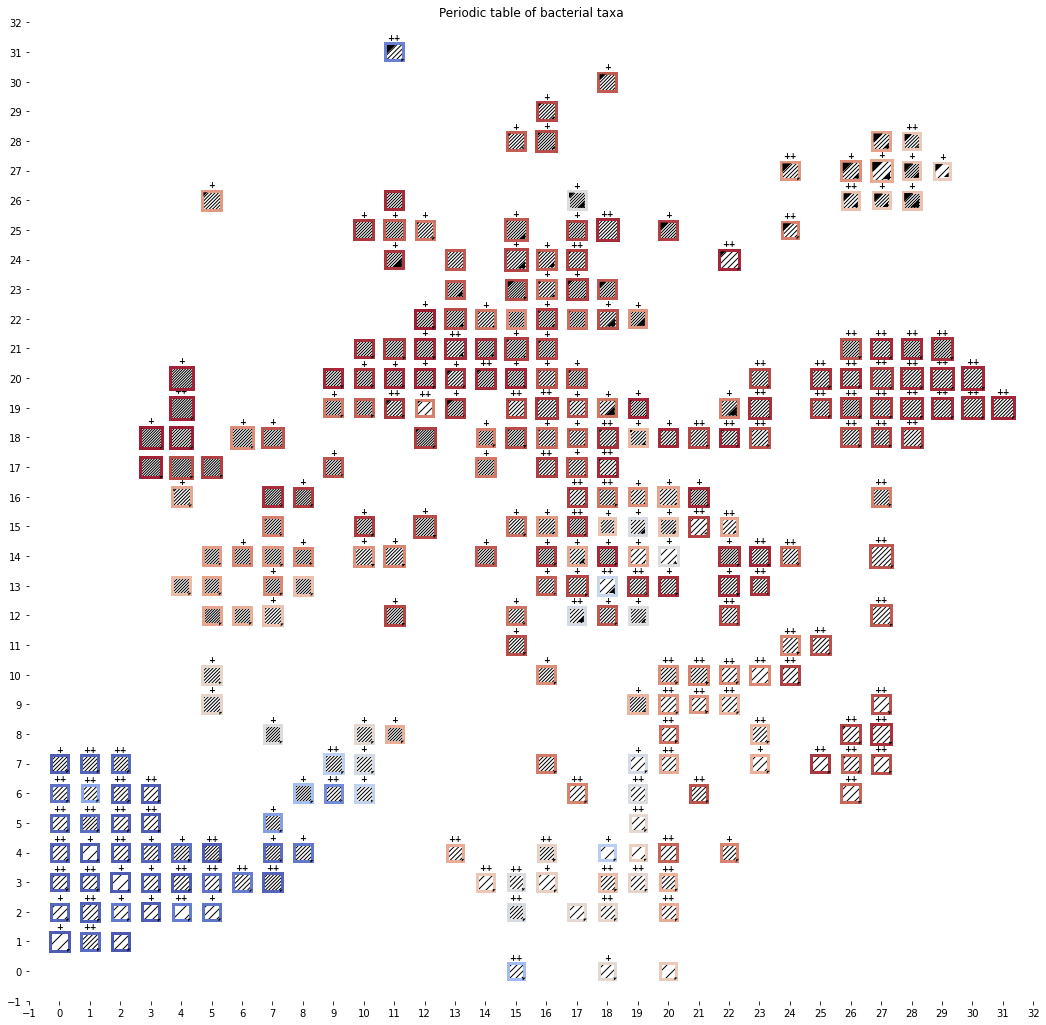

In [524]:


# sns.palplot([sns.desaturate(c, 0.75) for c in colors])

# Example data (three sets of z values)
np.random.seed(42)
# z1 = np.random.rand(10, 10)
z1 = tsne_input_data.reindex(pt_index).aerobe.values.reshape(GRID_SIZE, GRID_SIZE)
# z2 = np.random.rand(10, 10)
z2 = tsne_input_data.reindex(pt_index).gc_content.values.reshape(GRID_SIZE, GRID_SIZE)
# z3 = np.random.rand(10, 10)
z3 = tsne_input_data.reindex(pt_index).growth_rate.values.reshape(GRID_SIZE, GRID_SIZE)
# z3 = np.random.rand(10, 10)
z4 = tsne_input_data.reindex(pt_index).genome_size.values.reshape(GRID_SIZE, GRID_SIZE)
# z1 = np.random.rand(10, 10)
z5 = tsne_input_data.reindex(pt_index).phototroph.values.reshape(GRID_SIZE, GRID_SIZE)
# z2 = np.random.rand(10, 10)
z6 = tsne_input_data.reindex(pt_index).autotroph.values.reshape(GRID_SIZE, GRID_SIZE)

cmap = mpl.colormaps['coolwarm']

fig, ax = plt.subplots(figsize=(18, 18))
shift=0.5
boxshrink = 0.1

norm = z4


for i in range(GRID_SIZE):
    for j in range(GRID_SIZE):
        if not np.isnan(z1[i, j]):
            # Light hatching if dataset 1 is high
            # if z1[i,j] > 0.5:

            boxshrink = (1 - z4[i,j]) / 4
            boxwidth = 1-boxshrink*2
            boxheight = 1-boxshrink*2
            box_xy = (i-shift+boxshrink, j-shift+boxshrink)
            ax.add_patch(patches.Rectangle(box_xy,  boxwidth, boxheight, linewidth=0, 
                                           facecolor='white', 
                                           edgecolor='white', alpha=1, zorder=1, gid=groups[(i, j)]))

            ax.add_patch(patches.Rectangle(box_xy, boxwidth, boxheight, linewidth=0, 
                                           fill=False, hatch='/'*int(z2[i,j]*10), 
                                           color='k', alpha=1, zorder=2, gid=groups[(i, j)]))

            ax.add_patch(patches.Rectangle(box_xy, 
                                           boxwidth, boxheight, linewidth=3, fill=False,
                                           edgecolor=sns.desaturate(cmap(z1[i,j]), 0.75), alpha=1, zorder=3, gid=groups[(i, j)]))


            # ax.add_patch(patches.Rectangle((i+boxshrink, j+boxshrink), 1-boxshrink*2, 1-boxshrink*2, linewidth=0, fill=False, hatch='\\'*int(z4[i,j]*6), 
            #                                color='k', alpha=0.5))


            # Bold symbol for dataset 2
            n_bins = 3
            edges = np.linspace(z3[~np.isnan(z3)].min(), z3[~np.isnan(z3)].max(), n_bins+1)
            labels = [i for i in range(n_bins)]
            n_marks = np.array(pd.cut(z3.flatten(), bins=n_bins, labels=labels)).reshape(GRID_SIZE, -1)[i, j].astype(int)
            ax.text(box_xy[0]+boxwidth/2, #-shift, # +0.5, 
                    box_xy[1]+boxheight+0.2, 
                    '+'*(n_bins-1-n_marks), weight='bold', fontsize=8, ha='center', va='center', color='k', gid=groups[(i, j)])

            # if z5 > 0:
            triangle_size = z5[i,j] / 2
            # print(triangle_size)
            small_shift = 0.05
            p_triangle = patches.Polygon([(box_xy[0]+small_shift, 
                                           box_xy[1]+boxheight-small_shift),
                                         (box_xy[0]+(boxwidth*triangle_size)+small_shift, 
                                          box_xy[1]+boxheight-small_shift),
                                         (box_xy[0]+small_shift, 
                                          box_xy[1]+(boxheight*(1-triangle_size))-small_shift
                                         )],
                                         facecolor='k', zorder=3, gid=groups[(i, j)])

            ax.add_patch(p_triangle)

            triangle_size = z6[i,j] / 1.5
            c_triangle = patches.Polygon([(box_xy[0]+boxwidth-small_shift, 
                                           box_xy[1]+small_shift),
                                         (box_xy[0]+boxwidth-small_shift, 
                                          box_xy[1]+(boxheight*triangle_size)-small_shift),
                                         (box_xy[0]+(boxwidth*(1-triangle_size))+small_shift, 
                                          box_xy[1]+small_shift
                                         )],
                                         facecolor='k', zorder=3, gid=groups[(i, j)])
            ax.add_patch(c_triangle,)
            # Add symbols for next 3 datasets
            # symbol_offset = [-0.2, 0, 0.2]  # Slight offsets to avoid overlap
            # count = 0
            # for k, z_data in enumerate([z5, z6]):
            #     if z_data[i, j] > 0.1:
            #         ax.text(i + 0.5 + symbol_offset[count], j + 0.5, symbols[k], 
            #                 fontsize=12, color='k', ha='center', va='center')
            #         count += 1  # Adjust offset for next symbol  

# for x_loc in range(GRID_SIZE):
#     # for y_loc in range(GRID_SIZE):
#     ax.annotate(f"{x_loc * 15 + x_loc}", (x_loc, -1), 
#                 rotation=90, ha='center', va='bottom', fontsize=14)
#     ax.annotate(f"{(x_loc+1) * 15 + x_loc}", (x_loc, GRID_SIZE), 
#                 rotation=90, ha='center', va='bottom', fontsize=14)
    
# for p in hull_patch_list:
    
#     ax.add_patch(copy.copy(p))

# ax.plot(ordered_points[:, 0], ordered_points[:, 1], '-', markersize=2, alpha=0.7, label="Hilbert Curve", zorder=0)



ax.set_xticks(range(-1,GRID_SIZE+1))
ax.set_yticks(range(-1, GRID_SIZE+1))
# plt.grid(True)
sns.despine(left=True, bottom=True)
# plt.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
plt.title('Periodic table of bacterial taxa')
plt.savefig('./../figures/wavelet_periodic_table_datagrid.svg', bbox_inches='tight')
plt.savefig('./../figures/wavelet_periodic_table_datagrid.png', bbox_inches='tight', dpi=400)
plt.show()

## Make legends

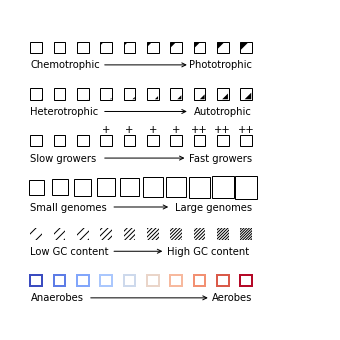

In [611]:
hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']

fig, ax = plt.subplots(figsize=(14,6))
# aerobe
for i in range(10):
    for j in range(12):
        if j == 1:
            cmap = mpl.colormaps['coolwarm']
            colors = [cmap(i) for i in np.linspace(z1[~np.isnan(z1)].min(), z1[~np.isnan(z1)].max(), 10)]
            ax.add_patch(patches.Rectangle((i,j), 0.5, 0.5, linewidth=2, 
                                       facecolor='white', 
                                       edgecolor=colors[i], alpha=1, zorder=1))
            

            
        if j == 3:
            hatchspace = np.linspace(z2[~np.isnan(z2)].min(), z2[~np.isnan(z2)].max(), 10)
            ax.add_patch(patches.Rectangle((i,j), 0.5, 0.5, 
                         linewidth=0, fill=False,
                         color='k', alpha=1, zorder=1, hatch='/'*int(hatchspace[i]*10)))
        
        if j == 5:
            sizespace = np.linspace(z4[~np.isnan(z4)].max(), z4[~np.isnan(z4)].min(), 10)
            boxshrink = (sizespace[i] / 3)
            boxwidth = 1 - boxshrink*2
            boxheight = 1 - boxshrink*2
            shift = 0 #(boxshrink - 0.5)
            box_xy = (i-(boxwidth/2-0.25), j-(boxheight/2-0.25))
            # print((0.5 - boxwidth/2), boxheight, boxwidth)
            ax.add_patch(patches.Rectangle(box_xy, boxwidth, boxheight, 
                         linewidth=1, fill=False,
                         color='k', alpha=1, zorder=1))
            
            # ax.axvline(i)
            
        if j == 7:
            ax.add_patch(patches.Rectangle((i,j), 0.5, 0.5, fill=False, linewidth=1, edgecolor='k'))
            if i > 2 and i < 7:
                ax.annotate('+', (i+0.25, j+0.72), ha='center', va='center', 
                            )
            if i >= 7:
                ax.annotate('++', (i+0.25, j+0.72), ha='center', va='center', 
                            )
        if j == 9:
            ax.add_patch(patches.Rectangle((i,j), 0.5, 0.5, fill=False, linewidth=1, edgecolor='k'))
            c_space = np.linspace(z5[~np.isnan(z5)].min(), z5[~np.isnan(z5)].max(), 10)
            triangle_size = c_space[i] / 1.5
            boxwidth = 0.5
            boxheight= 0.5
            small_shift = 0.025
            box_xy = (i, j)
            c_triangle = patches.Polygon([(box_xy[0]+boxwidth-small_shift, 
                                       box_xy[1]+small_shift),
                                     (box_xy[0]+boxwidth-small_shift, 
                                      box_xy[1]+(boxheight*triangle_size)-small_shift),
                                     (box_xy[0]+(boxwidth*(1-triangle_size))+small_shift, 
                                      box_xy[1]+small_shift
                                     )],
                                     facecolor='k', zorder=3, gid=groups[(i, j)])
            ax.add_patch(c_triangle,)
            
        if j == 11:
            ax.add_patch(patches.Rectangle((i,j), 0.5, 0.5, fill=False, linewidth=1, edgecolor='k'))
            p_space = np.linspace(z6[~np.isnan(z6)].min(), z6[~np.isnan(z6)].max(), 10)
            triangle_size = p_space[i] / 1.5
            boxwidth = 0.5
            boxheight= 0.5
            small_shift = 0.025
            box_xy = (i, j)
           
            p_triangle = patches.Polygon([(box_xy[0]+small_shift, 
                                       box_xy[1]+boxheight-small_shift),
                                     (box_xy[0]+(boxwidth*triangle_size)+small_shift, 
                                      box_xy[1]+boxheight-small_shift),
                                     (box_xy[0]+small_shift, 
                                      box_xy[1]+(boxheight*(1-triangle_size))-small_shift
                                     )],
                                     facecolor='k', zorder=3, gid=groups[(i, j)])
            ax.add_patch(p_triangle,)
        
for j in range(0, 12, 2):
    if j == 0:
        ax.annotate('Anaerobes', (0, j+.5), va='center')
        ax.annotate('Aerobes', (9.5, j+.5), ha='right', va='center')
        ax.annotate('', (7.7, j+0.5), (2.5, j+0.5), arrowprops={'arrowstyle':'->'}, 
                    ha='center', va='center')
        
    if j == 2:
        ax.annotate('Low GC content', (0, j+.5), va='center')
        ax.annotate('High GC content ', (9.5, j+.5), ha='right', va='center')
        ax.annotate('', (5.75, j+0.5), (3.5, j+0.5), arrowprops={'arrowstyle':'->'}, 
                    ha='center', va='center')
        
    if j == 4:
        ax.annotate('Small genomes', (0, j+.4), va='center')
        ax.annotate('Large genomes', (9.5, j+.4), ha='right', va='center')
        ax.annotate('', (6, j+0.4), (3.5, j+0.4), arrowprops={'arrowstyle':'->'}, 
                    ha='center', va='center')
        
    if j == 6:
        ax.annotate('Slow growers', (0, j+.5), va='center')
        ax.annotate('Fast growers', (9.5, j+.5), ha='right', va='center')
        ax.annotate('', (6.7, j+0.5), (3.1, j+0.5), arrowprops={'arrowstyle':'->'}, 
                    ha='center', va='center')
        
    if j == 8:
        ax.annotate('Heterotrophic', (0, j+.5), va='center')
        ax.annotate('Autotrophic', (9.5, j+.5), ha='right', va='center')
        ax.annotate('', (6.8, j+0.5), (3.1, j+0.5), arrowprops={'arrowstyle':'->'}, 
                    ha='center', va='center')
        
    if j == 10:
        ax.annotate('Chemotrophic', (0, j+.5), va='center')
        ax.annotate('Phototrophic', (9.5, j+.5), ha='right', va='center')
        ax.annotate('', (6.8, j+0.5), (3.1, j+0.5), arrowprops={'arrowstyle':'->'}, 
                    ha='center', va='center')
        
        
ax.set_xlim(-1, 13)
ax.set_ylim(-1, 13)
sns.despine(left=True, bottom=True)
ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
ax.set_aspect('equal')
plt.savefig('./../figures/datagrid_legend.svg', bbox_inches='tight')
plt.savefig('./../figures/datagrid_legend.png', bbox_inches='tight', dpi=400)


# Code ends here

## Basic layout

KeyError: 'c006839'

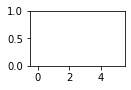

In [84]:
fig = plt.figure(figsize=(20, 12))
i = 1

for newind, (test_node, row) in enumerate(tsne_grid_df.sort_values(['dim1', 'dim2']).iterrows()):
    
    # newind = translate_to_grid_B(row['dim1'], row['dim2'])
    # newind = translate_to_grid_B(i + 1)
    
    ax = fig.add_subplot(10, 10, newind + 1)
    ax.set_xlim(-0.5,5.5)
    ax.set_ylim(0, 1)
    
    # for sp in ['right', 'left', 'top', 'bottom']:
    #     ax.spines[sp].set_visible(False)
    ax.annotate(new_leaf_names_2.loc[test_node], (0, 1), annotation_clip=False, va='top')
    # if newind == 1:
    if test_node in labels.index:
        ax.annotate(labels.loc[test_node], (0, 0.75), annotation_clip=False, fontsize=6, va='top')
    plt.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
    sns.despine()
    i += 1

fig.subplots_adjust(wspace=0.5)

# plt.savefig('/data/mhoffert/fiererlab/periodic_phyla/figures/wavelet_periodic_table_labels.svg', bbox_inches='tight')
plt.show()


In [ ]:
n = gtdb_pruned.search_nodes(name='c000130')[0]

path = []
while n is not None:
    path.append(n)
    n = n.up


In [ ]:
from matplotlib.lines import Line2D

In [ ]:
# important
postorder_leaves = [i.name for i in gtdb_pruned.traverse(strategy='postorder') if i.is_leaf()]
postorder_nodes = [i.name for i in gtdb_pruned.traverse(strategy='postorder') if not i.is_leaf()]

In [ ]:
def sine_wave(N, x1, x2, num_points=100, magnitude=0.5):

    # Generate smooth sine wave
    x = np.linspace(x1, x2, num_points)
    y = np.sin(2 * np.pi * N * (x - x1) / (x2 - x1) + (np.pi / 2)) * magnitude

    # Compute wavelength
    wavelength = (x2 - x1) / N

    # Compute peak and trough positions
    peak_x = x1 + (np.arange(N - 1) * wavelength) + wavelength #+ ((np.pi / 2)
    peak_y = np.ones_like(peak_x) * magnitude

    trough_x = x1 + (np.arange(N) * wavelength) + (wavelength / 2) #+ ((np.pi / 2)
    trough_y = -np.ones_like(trough_x) * magnitude

    return x, y, peak_x, peak_y, trough_x, trough_y

In [ ]:
def draw_periodic_cell(ax, node, trait_data, wavelet_data, 
                       main_label, 
                       index_label,
                       scale=1):
    """
    ax : matplotlib axes object
    node [str] : name of TreeNode to plot in cell
    trait_data [dataframe] : dataframe containing trait data for leaves
    wavelet_data [dataframe] : dataframe containing wavelet coeffs for nodes
    label: the label of the cell
    """
    
    # add numeric label
    ax.annotate(index_label, 
                xy = (0.1, 0.9), 
                fontsize=16 / scale,
                ha='center', va='center')
    
    ax.annotate(main+label, 
                xy = (0.1, 0.9), 
                fontsize=16 / scale,
                ha='center', va='center')
    
    
    
    n_waves = int(main_label.split(':')[0][1:])
    start, stop, mag = 0.1, 0.9, 0.1
    
    x, y, px, py, tx, ty = sine_wave(1, start, stop, 100, mag)
    
    # draw sine wiggle and dots
    ax.plot(x, y, color='k', label='wavy horizontal line!', zorder=0)
    ax.scatter((start, stop), (1 * mag , 1 * mag), color='k', zorder=1)
    ax.scatter(px, py, color='green')
    ax.scatter(tx, ty, color='red')
    
    # label lines
    top = 1 * mag
    line1 = Line2D((start, start), (top, top - top * 2.5), zorder=0, linestyle='--', color='k')
    ax.add_line(line1)
    ax.annotate(main_label.split(':')[-1], (start, top - top * 3), va='bottom', ha='left')
        
    # set limits
    ax.set_ylim(-.25, 1)
    ax.set_xlim(-0.1, 1.1)
    
    # species-level wiggles
    x1, x2, y = 0.5, 0.9, 0.1
    norm = mpl.colors.Normalize(0.01, 0.1)
    cmap = matplotlib.cm.Greys
    for _y in np.linspace(0.01, 0.1, 10):

        xvals = np.linspace(x1, x2, 20)
        yvals = np.sin(np.pi * (xvals - x1) / (x2 - x1) - (np.pi / 2)) * _y + _y - y
        ax.plot(xvals, yvals, color=cmap(norm(_y)), zorder=0)
        
        
    # 
    leaf_names = get_leaf_names(node)
    gc_content = pca_data.loc[leaf_names, 'gc_percentage'].mean() / 100
    norm1 = mpl.colors.Normalize(pca_data['gc_percentage'].min(), 
                                 pca_data['gc_percentage'].max())
    
    
    sizes = pca_data.loc[leaf_names, 'genome_size']
    norm2 = mpl.colors.Normalize(pca_data['genome_size'].min(), pca_data['genome_size'].max())
    scale = norm2(sizes.mean())
    
    rect1 = mpl.patches.Rectangle((0.1, 0.15), scale, 0.1, edgecolor='k', fill=None)
    ax.add_patch(rect1)
    rect2 = mpl.patches.Rectangle((0.1, 0.15), 
                                 scale * gc_content, 0.1, 
                                 edgecolor='k', 
                                 color=mpl.cm.brg(norm1(gc_content * 100)))
    print(mpl.cm.brg(norm1(gc_content * 100)))
    ax.add_patch(rect2)

    


In [ ]:
fig, ax = plt.subplots(figsize=( 4, 4 ))
test_node = gtdb_pruned.search_nodes(name='c003897')[0]
draw_periodic_cell(ax = ax, 
                   node = test_node, 
                   trait_data = pca_data, 
                   wavelet_data = varexp_ind_df, 
                   main_label = new_leaf_names_2.loc[test_node.name],
                   index_label = 1,
                   scale= 0.5
                  )



In [ ]:
test_node = gtdb_pruned.search_nodes(name='c003897')[0]
test_leaves =  get_leaf_names(test_node)

In [ ]:
from matplotlib.collections import LineCollection
import warnings

In [ ]:
def colored_line_between_pts(x, y, c, ax, **lc_kwargs):
    """
    Plot a line with a color specified between (x, y) points by a third value.

    It does this by creating a collection of line segments between each pair of
    neighboring points. The color of each segment is determined by the
    made up of two straight lines each connecting the current (x, y) point to the
    midpoints of the lines connecting the current point with its two neighbors.
    This creates a smooth line with no gaps between the line segments.

    Parameters
    ----------
    x, y : array-like
        The horizontal and vertical coordinates of the data points.
    c : array-like
        The color values, which should have a size one less than that of x and y.
    ax : Axes
        Axis object on which to plot the colored line.
    **lc_kwargs
        Any additional arguments to pass to matplotlib.collections.LineCollection
        constructor. This should not include the array keyword argument because
        that is set to the color argument. If provided, it will be overridden.

    Returns
    -------
    matplotlib.collections.LineCollection
        The generated line collection representing the colored line.
    """
    if "array" in lc_kwargs:
        warnings.warn('The provided "array" keyword argument will be overridden')

    # Check color array size (LineCollection still works, but values are unused)
    if len(c) != len(x) - 1:
        warnings.warn(
            "The c argument should have a length one less than the length of x and y. "
            "If it has the same length, use the colored_line function instead."
        )

    # Create a set of line segments so that we can color them individually
    # This creates the points as an N x 1 x 2 array so that we can stack points
    # together easily to get the segments. The segments array for line collection
    # needs to be (numlines) x (points per line) x 2 (for x and y)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, **lc_kwargs)

    # Set the values used for colormapping
    lc.set_array(c)

    return ax.add_collection(lc)

In [ ]:
def phylogenetic_trace(ax, label):
    n_levels = int(label.split(':')[0][1:])
    
    # draw line
    ax.plot((0.25, 0.75), (0, 0), color='k', zorder=0, linewidth=5)
    
    # draw little diagonal lines
    for x in np.linspace(0.25, 0.75, n_levels+1)[:-1]:
        ax.plot((x, x + 0.1), (0, 0.5), color='k')
        
    # draw dots
    ax.scatter(x=np.linspace(0.25, 0.75, n_levels+1), y=[0] * (n_levels+1), c=['k']*(n_levels) + ['r'], zorder=1, s=150)
    
    # add nearest named node label
    ax.annotate(label.split(':')[1], xy=(0.25, 0), xytext=(0.25, -0.9),
                ha='left', va='bottom', arrowprops={'arrowstyle':'->'})
    
    # formatting
    ax.set_xlim(0, 1)
    sns.despine(ax=ax, left=True, bottom=True)
    plt.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

In [ ]:
def microplot(ax, leaf_data, cmap, ws=25, log_y=False, ylims=None, norms=None):
    if not log_y:
        y = np.lib.stride_tricks.sliding_window_view(leaf_data, window_shape = (ws, )).mean(1)
        mean = leaf_data.mean()
    else:
        y = np.lib.stride_tricks.sliding_window_view(np.log(leaf_data), window_shape = (ws, )).mean(1)
        mean = leaf_data.apply(np.log).mean()
        
    if norms is not None:
        norm = mpl.colors.Normalize(norms[0], norms[1])
    else:
        norm = mpl.colors.Normalize(leaf_data.min(), leaf_data.max())
        
    cmap = mpl.colormaps[cmap]
    ax.plot(y, color=cmap(norm(mean)), zorder=0)
    ax.axhline(mean, color='k', zorder=2)
    
    if ylims is not None:
        ax.set_ylim(*ylims)
        
    ax.fill_between(list(range(len(y))), y1=y, y2=ax.get_ylim()[0], color=cmap(norm(mean)))
    # ax.axhline(mean, color='white', linewidth=6, zorder=1)
    
    ax.set_xlim(0, len(y))
    ax.set_xticks(np.ceil(np.linspace(0, len(y), 3)))
    sns.despine(ax=ax)
    plt.tick_params(labelsize=14)
    return ax


In [ ]:
def cell(x, y, gs, fig, node, labels, traits):
    
    leaves = get_leaf_names(node)
    
    # fig = plt.figure(figsize=(8,8))
    # gs = fig.add_gridspec(10, 1)
    
    ax = fig.add_subplot(gs[x:x+2, y:y+2])
    
    # add numeric label
    ax.annotate(labels[0], 
                xy = (0.9, 0), 
                fontsize=16,
                ha='left', va='center')
    
    phylogenetic_trace(ax, labels[1])
    ax.set_ylim(-1, 1)
    
    # plt.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
    # sns.despine(ax=ax, left=True, bottom=True)
    
    
    ax = fig.add_subplot(gs[x+2:x+4, y:y+2])
    
    n_genomes = rep_count['accession'].loc[['.'.join(l.rsplit('_', 1)) for l in leaves]]
    ax.plot(range(len(n_genomes)), n_genomes)
    top3 = md.set_index('accession').loc[n_genomes.sort_values(ascending=False).head(3).index, 
                                         'gtdb_taxonomy'].apply(lambda x: x.split(';')[-1].lstrip('s_'))
    for i, g in enumerate(top3.values):
        ax.annotate(g, (0, 1 - ((i + 1) * .15)), xycoords='axes fraction')
    sns.despine(ax=ax, left=True)
    plt.tick_params(left=False, labelleft=False)
    
    ax = fig.add_subplot(gs[x+4:x+6, y])
    ax = microplot(ax, traits.loc[leaves, 'genome_size'], 'viridis', log_y=True, ylims=(11, 16), norms=(11, 16))
    plt.tick_params(bottom=False, labelbottom=False)
    
    ax = fig.add_subplot(gs[x+4:x+6, y+1])
    ax = microplot(ax, traits.loc[leaves, 'gc_percentage'], 'brg', ylims=(20, 80), norms=(20, 80))
    plt.tick_params(bottom=False, labelbottom=False)
    
    

    
#     ax.annotate(labels[0], 
#                 xy = (0.1, 0.9), 
#                 fontsize=16 / scale,
#                 ha='center', va='center')

    # aerobe
    ax = fig.add_subplot(gs[x+6:x+8, y])
    ax = microplot(ax, traits.loc[leaves, 'aerobe'], 'RdBu_r', ylims = (0, 1), norms=(0, 1))
    plt.tick_params(bottom=False, labelbottom=False)
    
    ax = fig.add_subplot(gs[x+6:x+8, y+1])
    gr_lims = [pca_data['growth_rate'].apply(np.log).min(), pca_data['growth_rate'].apply(np.log).max()]
    ax = microplot(ax, traits.loc[leaves, 'growth_rate'], 'gnuplot', ylims = gr_lims, log_y=True, norms=gr_lims)
    plt.tick_params(bottom=False, labelbottom=False)
    
    ax = fig.add_subplot(gs[x+8:x+10, y])
    ax = microplot(ax, traits.loc[leaves, 'phototroph'], 'Greens', ylims=(0, 1), norms=(0, 1))
    plt.tick_params(bottom=False, labelbottom=False)
    
    ax = fig.add_subplot(gs[x+8:x+10, y+1])
    ax = microplot(ax, traits.loc[leaves, 'Calvin Cycle'], 'Blues', ylims=(0, 1), norms=(0, 1))
    plt.tick_params(bottom=False, labelbottom=False)
    
    fig.subplots_adjust(hspace=0.5)

In [ ]:
fig = plt.figure(figsize=(8,8))
gs = fig.add_gridspec(10, 2)
cell(0, 0, gs, fig,
     node, [newind, new_leaf_names_2.loc[node.name]], pca_data)


In [ ]:
fig = plt.figure(figsize=(30,30))
gs = fig.add_gridspec(100, 20)
for newind, (test_node, row) in enumerate(tsne_grid_df.sort_values(['dim1', 'dim2']).head(5).iterrows()):
    print(newind)
    node = gtdb_pruned.search_nodes(name=test_node)[0]
    print(row['dim1'], row['dim2'])
    cell(row['dim1']*10, row['dim2']*2, gs, fig,
         node, [newind, new_leaf_names_2.loc[node.name]], pca_data)

In [ ]:
fig = plt.figure(figsize=(15,15))
gs = fig.add_gridspec(10, 10)
norm = mpl.colors.Normalize(pca_data['genome_size'].min(), pca_data['genome_size'].max())
for newind, (test_node, row) in enumerate(tsne_grid_df.sort_values(['dim1', 'dim2']).iterrows()):
    print(newind)
    node = gtdb_pruned.search_nodes(name=test_node)[0]
    leaves = get_leaf_names(node)
    ax = fig.add_subplot(10, 10, newind+1)
     
    theta1, theta2 = 0, norm(pca_data.loc[leaves, 'genome_size'].mean()) * 360
    print(theta2)
    radius = 45
    
    center = (0, 0)
    w = Wedge(center, radius, theta1, theta2, width=radius * 0.2, fc='k', edgecolor='black')
    ax.add_patch(w)
    
    w = Wedge(center, radius, theta1, 
              theta2 * pca_data.loc[leaves, 'gc_percentage'].mean() / 100, 
              width=radius * 0.2, fc='white', edgecolor='black')
    ax.add_patch(w)
    
    ax.set_ylim(-50, 50)
    ax.set_xlim(-50, 50)
    plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    
    

## Hilbert projection

In [451]:
from hilbert import encode, decode
p=4
hilbert_indices = encode(points, points.shape[1], p)

In [327]:

# # Parameters
# p = 4 #int(np.ceil(np.log2(n_bins)))  # Number of iterations (2^p grid)
# print(p)

# # Generate a grid of points in 2D space
# x = np.linspace(0, 2**p - 1, 2**p, dtype=int)
# y = np.linspace(0, 2**p - 1, 2**p, dtype=int)
# points = np.array([(xi, yi) for xi in x for yi in y])
# # points = np.array(list(zip(points_aerobe, points_gr, points_gc, points_gs)))


# n = points.shape[1]  # Number of dimensions (2D)

# # Map points to 1D using Hilbert curve
# hilbert_indices = encode(points, points.shape[1], p)

# # Sort points by Hilbert index
# sorted_indices = np.argsort(hilbert_indices)
# ordered_points = points[sorted_indices]

# # Plot the Hilbert curve
# fig, ax = plt.subplots(figsize=(8, 8))
# ax.grid(zorder=0)

# ax.plot(ordered_points[:, 0], ordered_points[:, 1], '-', markersize=2, alpha=0.7, label="Hilbert Curve", zorder=1)
# ax.scatter(points[:, 0], points[:, 1], c=hilbert_indices, cmap='viridis', s=5, alpha=1, zorder=2)
# ax.set_title(f"{n}D Hilbert Curve (p=6) using 'hilbert' package")
# ax.set_xlabel("X")
# ax.set_ylabel("Y")

# # plt.colorbar(label="Hilbert Index")

# plt.legend()
# plt.show()



p: 5
0
1


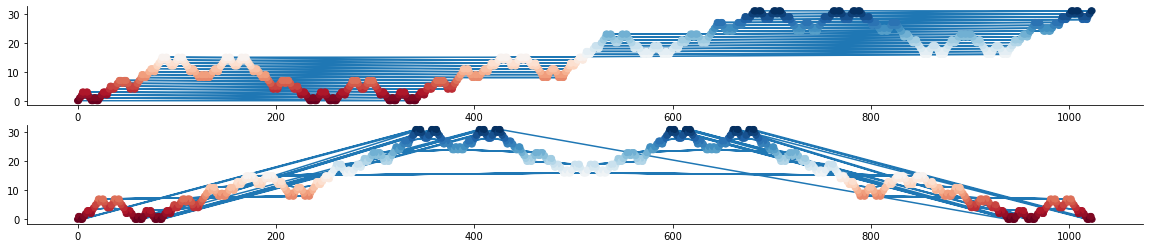

In [87]:
# %%time
# space = np.linspace(0, 1, n_bins)
# pd.cut(pca_data['aerobe'], bins=np.linspace(0, 1, n_bins+1), labels=list(range(n_bins))).apply(lambda x: space[x])
# p = int(np.ceil(np.log2(n_bins)))
print('p:', p)
# points = np.array(list(zip( points_gr, points_gc, points_gs, points_aerobe,)))

fig = plt.figure(figsize=(20, n * 2))
axes = [fig.add_subplot(n, 1, i+1) for i in range(n)]
for ax in axes:
    sns.despine()

combo_list = list(range(2**p))
all_points = np.array(list(itertools.product(*[combo_list] * n)))
indeces = encode(all_points, n, p)

# x plot
for i, (ax, trait) in enumerate(zip(axes, [ 'dim1', 'dim2'])):
    print(i)
    space = np.linspace(0, 2**p - 1, 2**p)
    
    y = [space[tupe[i]] for tupe in all_points]
    ax.plot(indeces, y, zorder=0)
    ax.scatter(indeces, y, c=y, cmap='RdBu', zorder=1)
    # ax.set_xlim(0, 10000)

#     space = np.linspace(pca_data['growth_rate'].min(), 
#                         pca_data['growth_rate'].max(), 
#                         n_bins)

#     ax_y.scatter(indeces, [space[y] for x, y in all_points], c=indeces)

In [88]:
n_bins = 4
points_aerobe = pd.cut(pca_data['aerobe'], bins=np.linspace(0, 1, n_bins), labels=list(range(n_bins-1)))
points_gr = pd.cut(pca_data['growth_rate'], bins=np.linspace(pca_data['growth_rate'].min(), 
                                                            pca_data['growth_rate'].max(), 
                                                            n_bins), labels=list(range(n_bins-1)))
points_gc = pd.cut(pca_data['gc_percentage'], bins=np.linspace(pca_data['gc_percentage'].min(), 
                                                               pca_data['gc_percentage'].max(), 
                                                               n_bins), labels=list(range(n_bins-1)))
points_gs = pd.cut(pca_data['genome_size'], bins=np.linspace(pca_data['genome_size'].min(), 
                                                            pca_data['genome_size'].max(), 
                                                            n_bins), labels=list(range(n_bins-1)))


p: 2
0
1
2
3


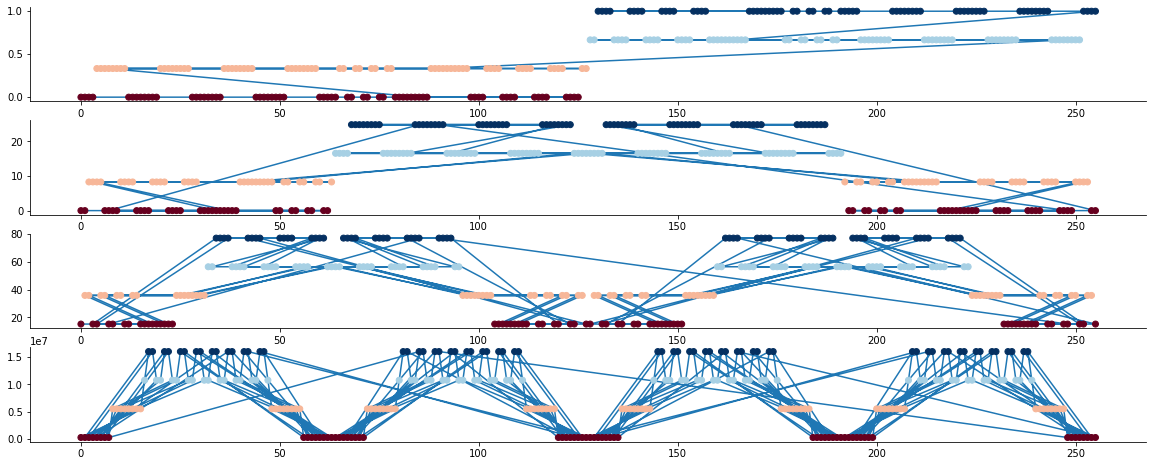

In [89]:
# %%time
# space = np.linspace(0, 1, n_bins)
# pd.cut(pca_data['aerobe'], bins=np.linspace(0, 1, n_bins+1), labels=list(range(n_bins))).apply(lambda x: space[x])
p = int(np.ceil(np.log2(n_bins)))
print('p:', p)
points = np.array(list(zip(points_aerobe, points_gr, points_gc, points_gs, )))
n = points.shape[1]

fig = plt.figure(figsize=(20, n * 2))
axes = [fig.add_subplot(n, 1, i+1) for i in range(n)]
for ax in axes:
    sns.despine()

combo_list = list(range(n_bins))
all_points = np.array(list(itertools.product(*[combo_list] * n)))
indeces = encode(all_points, n, p)

# x plot
ys = []
traits = ['aerobe', 'growth_rate', 'gc_percentage', 'genome_size']
for i, (ax, trait) in enumerate(zip(axes, traits)):
    print(i)
    space = np.linspace(pca_data[trait].min(), pca_data[trait].max(), n_bins)
    
    y = [space[tupe[i]] for tupe in all_points]
    ys.append(y)
    ax.plot(indeces, y, zorder=0)
    ax.scatter(indeces, y, c=y, cmap='RdBu', zorder=1)
    # ax.set_xlim(0, 100)

#     space = np.linspace(pca_data['growth_rate'].min(), 
#                         pca_data['growth_rate'].max(), 
#                         n_bins)

#     ax_y.scatter(indeces, [space[y] for x, y in all_points], c=indeces)


0
1
2
3


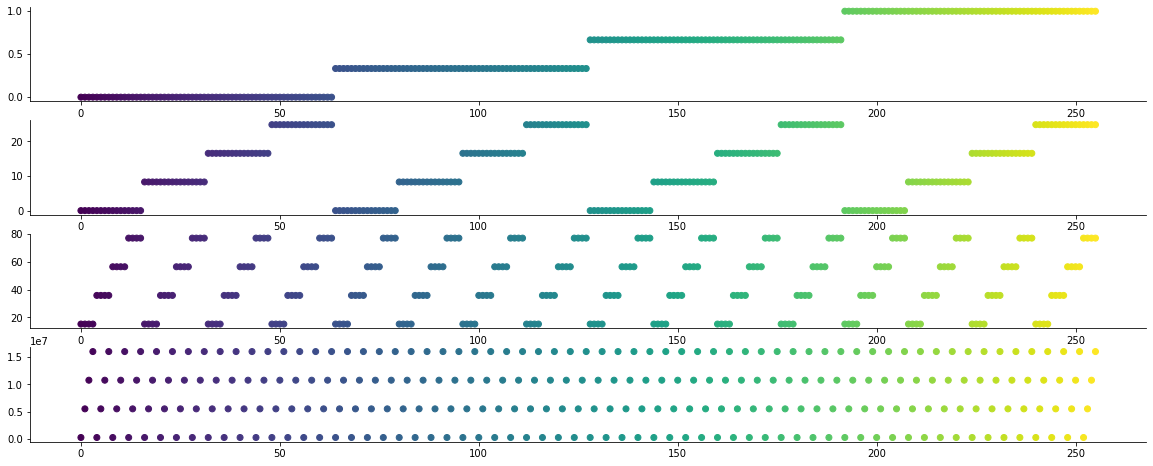

In [90]:
fig = plt.figure(figsize=(20, n * 2))
axes = [fig.add_subplot(n, 1, i+1) for i in range(n)]
for ax in axes:
    sns.despine()
    
plotdf = pd.DataFrame(index=indeces, data=np.array(ys).T, columns=traits)
plotdf = plotdf.sort_values(traits).reset_index()

for i, (ax, trait) in enumerate(zip(axes, traits)):
    print(i)
    # space = np.linspace(pca_data[trait].min(), pca_data[trait].max(), n_bins)
    
    y = plotdf[trait].values
    # ys.append(y)
    ax.scatter(plotdf.index, y, zorder=0, c=plotdf.index) #['index'])
    # ax.scatter(plotdf['index'], y, zorder=0, c=plotdf['index'])

    # ax.scatter(indeces, y, c=y, cmap='RdBu', zorder=1)

In [91]:
encoded_points = pd.Series(data=encode(points, n, p), index=pca_data.index)

invalid value encountered in cast


In [92]:
idx_mapping = plotdf['index'].astype(int).to_dict()

In [93]:
wavelets = [l.name for l in wavelet_tree.get_leaves()]
wavelet_hillbert = pd.DataFrame(index=wavelets, columns=plotdf.index, dtype=float)
count = 0
for node in gtdb_pruned.traverse():
    if node.name in wavelets:
        count += 1
        display(count)
        clear_output(wait=True)
        
        wl = get_leaf_names(node)
        # wavelet_hillbert.loc[node.name, :] = encoded_points.loc[wl].map(idx_mapping).value_counts().reindex(list(range(n ** (2 ** p)))).fillna(0).values
        wavelet_hillbert.loc[node.name, :] = encoded_points.loc[wl].value_counts().reindex(list(range(n ** (2 ** p)))).fillna(0).values



1370

In [94]:
wavelet_hillbert = wavelet_hillbert.loc[:, wavelet_hillbert.sum(0) > 0]

In [95]:
wh_norm = wavelet_hillbert.divide(wavelet_hillbert.sum(1), 0)

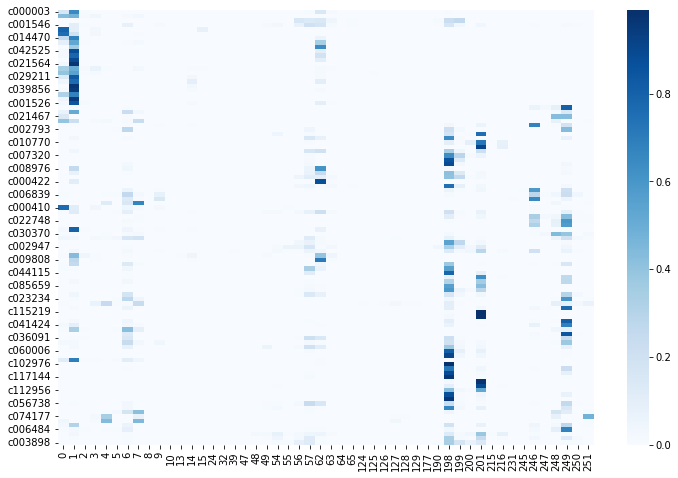

In [96]:
fig, ax = plt.subplots(figsize=(12,8))
g  = sns.heatmap(wh_norm.loc[tsne_input_data.index, :], 
            cmap='Blues',)

0
1
2
3


Text(0.5, 0, 'clade')

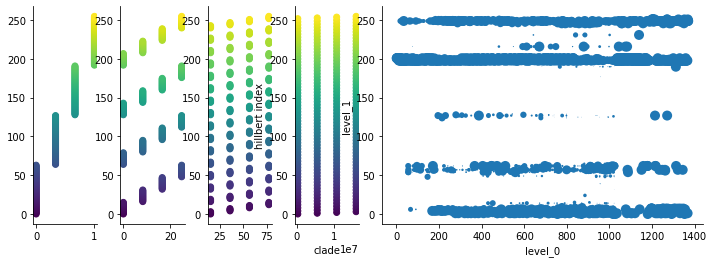

In [123]:
fig = plt.figure(figsize=(12, 4))
gs = fig.add_gridspec(1, 5, width_ratios=[1,1,1,1,5])
axes = [fig.add_subplot(gs[0])]
axes += [fig.add_subplot(gs[i], sharey=axes[0]) for i in range(1, n+1)]

for ax in axes:
    sns.despine()
    
plotdf = pd.DataFrame(index=indeces, data=np.array(ys).T, columns=traits)
plotdf = plotdf.sort_values(traits).reset_index()

for i, (ax, trait) in enumerate(zip(axes, traits)):
    print(i)
    # space = np.linspace(pca_data[trait].min(), pca_data[trait].max(), n_bins)
    
    y = plotdf[trait].values
    # ys.append(y)
    ax.scatter( y, plotdf.index, zorder=0, c=plotdf.index) #['index'])
    # ax.axhline(62)
    # ax.axhline(1)
    # ax.set_ylim(0, 65)
# g  = sns.heatmap(wh_norm.loc[tsne_input_data.index, :].T, ax=axes[-1],
#             cmap='Blues',)
temp = wh_norm.stack().reset_index()
temp['level_0'] = temp['level_0'].rank(method='dense', ascending=False).astype(int)
sns.scatterplot(data=temp,
               x='level_0', y='level_1', s=temp[0]*100)
ax.set_ylabel('hillbert index')
ax.set_xlabel('clade')

In [ ]:
plt.show()

In [102]:
temp = wh_norm.stack().reset_index()

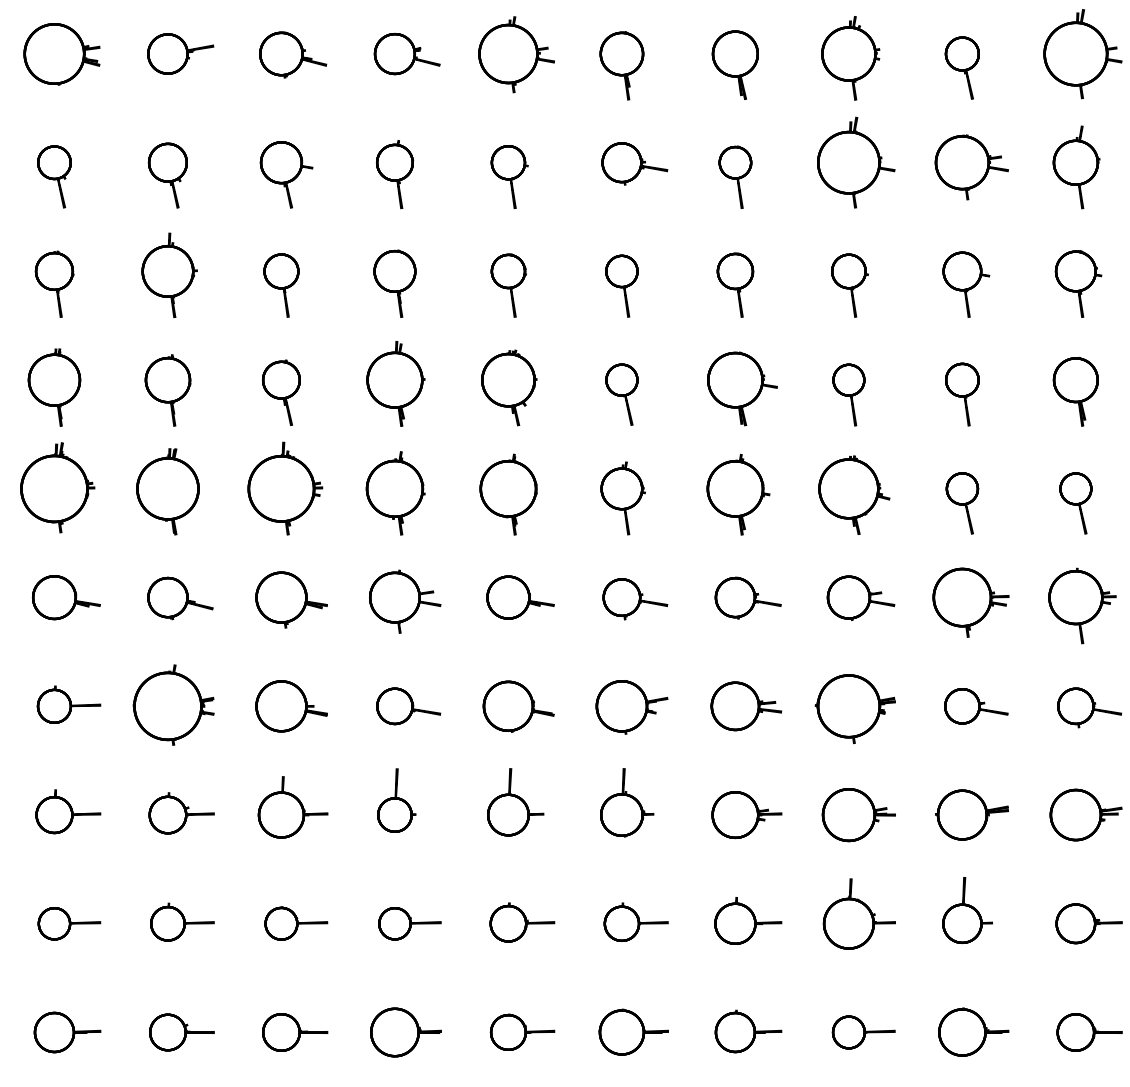

CPU times: user 2min 3s, sys: 21.2 s, total: 2min 25s
Wall time: 1min 43s


In [118]:
%%time
fig = plt.figure(figsize=(20,20))
gs = fig.add_gridspec(10, 10)

# Set the coordinates limits
upperLimit = 0.6
lowerLimit = .3


# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / 256

# Compute the angle each bar is centered on:
indexes = list(range(256))
angles = [element * width for element in indexes]


for newind, (test_node, row) in enumerate(tsne_grid_df.sort_values(['dim1', 'dim2']).iterrows()):
    print(test_node)
    display(newind)
    # clear_output(wait=True)
    node = gtdb_pruned.search_nodes(name=test_node)[0]
    # print()
    ax = fig.add_subplot(gs[row['dim1'], row['dim2']], polar=True)
    
    # remove grid
    plt.axis('off')
    
    df = temp[temp['level_0'].eq(test_node)]
    print(df.shape)
    df = df.set_index('level_1').reindex(range(256)).fillna(0)
    
    heights = upperLimit * df[0] + 0.005

    # Draw bars
    bars = ax.bar(
        x=angles, 
        height=heights, 
        width=width, 
        bottom=lowerLimit,
        linewidth=2, 
        edgecolor="k",color='k')

    # ax.set_ylim(0, 1.5)
    clear_output(wait=True)
    # cell(row['dim1']*10, row['dim2']*2, gs, fig,
    #      node, [newind, new_leaf_names_2.loc[node.name]], pca_data)
    print()
fig.subplots_adjust(hspace=0)
plt.show()

In [224]:
# trait_data = pca_data.loc[get_leaf_names(test_node), 'aerobe']
# n_bins=100

# fig = plt.figure(figsize=(4,4))
# ax = fig.add_subplot(polar=True)


def round_cell(ax, trait_data, vmin, vmax, n_bins=100, cmap='RdBu', lowerLimit=0.3, upperLimit=0.6, quadrant=1):

    # remove grid
    # ax.axis('off')
    # Set the coordinates limits
    ax.axhline(0.2, color='r', linewidth=4)
    
    ax.axvline(1, color='b')

    # Compute the width of each bar. In total we have 2*Pi = 360°
    width = 2*np.pi / n_bins * 0.25

    # Compute the angle each bar is centered on:
    indexes = list(range(n_bins))
    angles = [element * width + (2 * np.pi * (0.25 * (quadrant - 1))) for element in indexes]
    # df = temp[temp['level_0'].eq(test_node)]
    # print(df.shape)
    # df = df.set_index('level_1').reindex(range(256)).fillna(0)

    hist = np.histogram(trait_data, bins=np.linspace(vmin, vmax, n_bins+1), density=True)
    vals = hist[0] / hist[0].sum()
    heights = vals

    cmap = mpl.colormaps[cmap]
    norm = mpl.colors.Normalize(vmin, vmax)

    # Draw bars
    bars = ax.bar(
        x=angles, 
        height=heights, 
        width=width, 
        bottom=lowerLimit,
        linewidth=2, 
        edgecolor=[cmap(norm(i)) for i in hist[1][:n_bins]], 
        color=[cmap(norm(i)) for i in hist[1][:n_bins]])

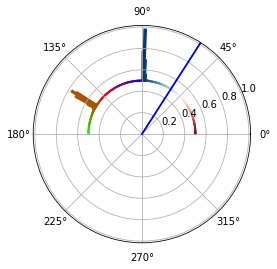

In [225]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(polar=True)
leaves = get_leaf_names(test_node)
ul, ll = 0.1, 0.5
round_cell(ax, pca_data.loc[leaves, 'aerobe'], 0, 1, cmap='RdBu', lowerLimit=ll, upperLimit=ul, quadrant=1)
round_cell(ax, pca_data.loc[leaves, 'gc_percentage'], 20, 80, cmap='brg', lowerLimit=ll, upperLimit=ul, quadrant=2)
# ax.set_xlim(0, 2 * np.pi * 0.25)

## round plots

In [111]:
def polar_chart(ax, trait_data, vmin, vmax, n_bins=100, cmap='RdBu', lowerLimit=0.3, upperLimit=0.6, index=[1,1,5]):
    norm = mpl.colors.Normalize(vmin, vmax)
    cmap = mpl.colormaps[cmap]
    ax.axis('off')
    slices = np.linspace(0, np.pi*2, index[2]+1)
    start, stop = slices[index[0]], slices[index[1]]
    for x, (clade, val) in zip(np.linspace(start,stop,len(trait_data)), trait_data.items()):
        # ax.axvline(x=x, ymin=lowerLimit, ymax=lowerLimit+norm(val), color=cmap(norm(val)))
        ''
    ax.set_ylim(0, 1 + lowerLimit)
    return ax, trait_data.apply(norm).mean()

CPU times: user 331 ms, sys: 16 ms, total: 347 ms
Wall time: 343 ms


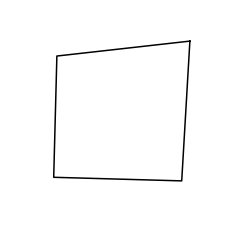

In [112]:
%%time
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(polar=True)
leaves = get_leaf_names(test_node)
ul, ll = 0.5, 0.2

# ax, mean = polar_chart(ax, pca_data.loc[leaves, 'aerobe'], 0, 1, cmap='Grays', lowerLimit=ll, upperLimit=ul, index=[1, 5, 24])
# plt.scatter(x=[np.pi/2], y=[mean+ll])
ax, mean_a = polar_chart(ax, pca_data.loc[leaves, 'aerobe'], 0, 1, cmap='Greys', #cmap='RdBu', 
                         lowerLimit=ll, upperLimit=ul, index=[1, 5, 24])
ax, mean_gc = polar_chart(ax, pca_data.loc[leaves, 'gc_percentage'], 20, 80, cmap='Greys', #cmap='brg', 
                          lowerLimit=ll, upperLimit=ul, index=[7, 11, 24])

gr_min, gr_max = pca_data['growth_rate'].apply(np.log).min(), pca_data['growth_rate'].apply(np.log).max()
ax, mean_gr = polar_chart(ax, pca_data.loc[leaves, 'growth_rate'].apply(np.log), gr_min, gr_max, cmap='Greys', #cmap='plasma', 
                          lowerLimit=ll, upperLimit=ul, index=[13, 17, 24])

gs_min, gs_max = pca_data['genome_size'].apply(np.log).min(), pca_data['genome_size'].apply(np.log).max()
ax, mean_gs = polar_chart(ax, pca_data.loc[leaves, 'genome_size'].apply(np.log), gs_min, gs_max, cmap='Greys', #cmap='viridis', 
                          lowerLimit=ll, upperLimit=ul, index=[19, 23, 24])

linspace = np.linspace(0, 2*np.pi, 5)[1:]-(np.pi/4)

plt.plot(np.concatenate((linspace, [linspace[0]])), np.array([mean_a, mean_gc, mean_gr, mean_gs, mean_a])+ll, color='k')

# plt.plot((np.pi*2/5*1, np.pi*2/5*2), (1, 1))

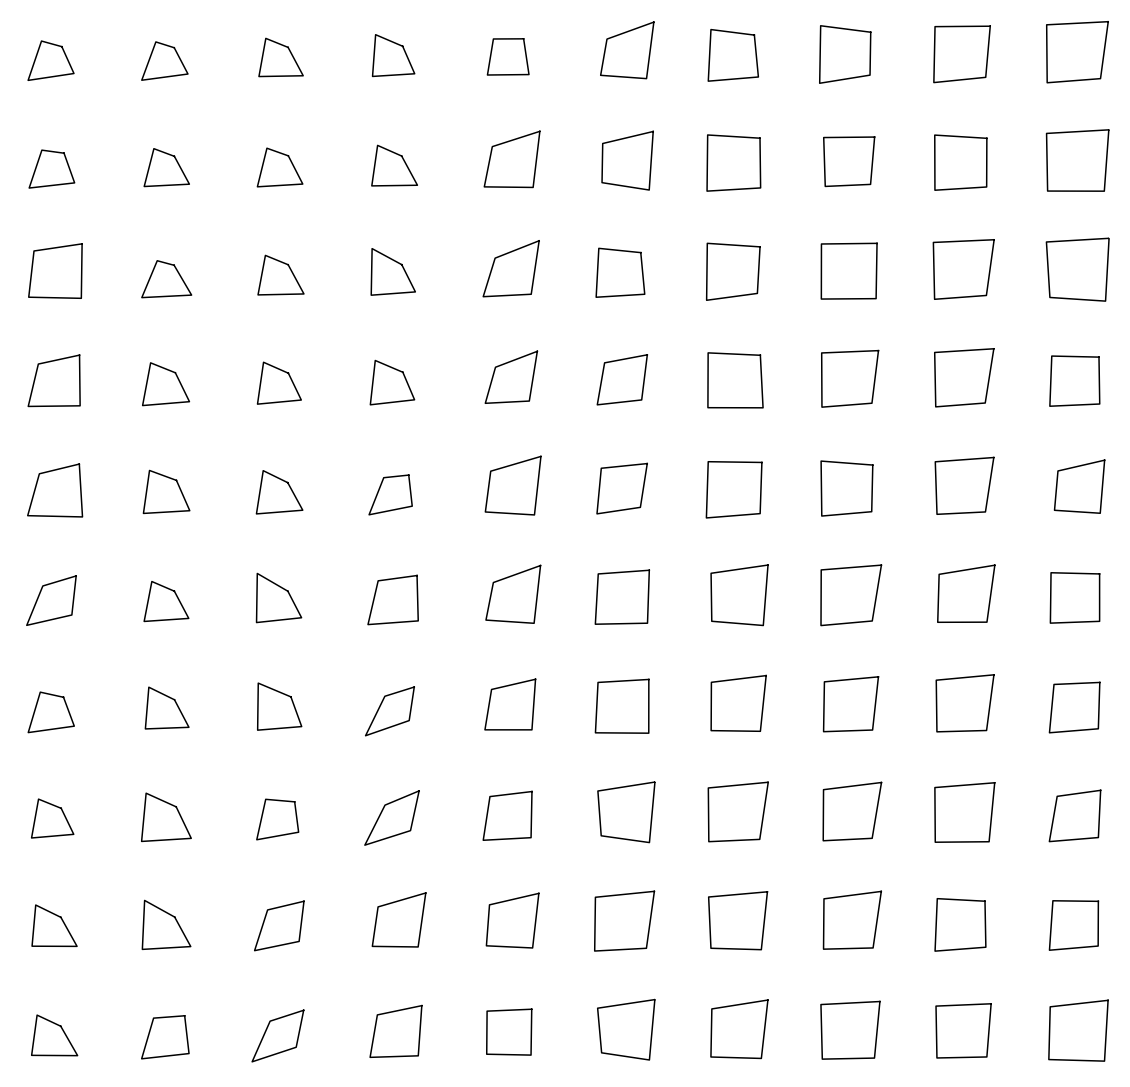

CPU times: user 1min 32s, sys: 9.22 s, total: 1min 41s
Wall time: 1min 25s


In [113]:
%%time
fig = plt.figure(figsize=(20,20))
gs = fig.add_gridspec(10, 10)



for newind, (test_node, row) in enumerate(tsne_grid_df.sort_values(['dim1', 'dim2']).iterrows()):
    # print(test_node)
    display(newind)
    # clear_output(wait=True)
    node = gtdb_pruned.search_nodes(name=test_node)[0]
    # print()
    ax = fig.add_subplot(gs[row['dim1'], row['dim2']], polar=True)
    
    leaves = get_leaf_names(test_node)
    # round_cell(ax, pca_data.loc[leaves, 'aerobe'], 0, 1, cmap='RdBu', lowerLimit=0.05, upperLimit=1.5, quadrant=1)
    # round_cell(ax, pca_data.loc[leaves, 'gc_percentage'], 20, 80, cmap='brg', lowerLimit=0.05, upperLimit=1.5, quadrant=2)
    
    ax, mean_a = polar_chart(ax, pca_data.loc[leaves, 'aerobe'], 0, 1, cmap='Greys', #cmap='RdBu', 
                             lowerLimit=ll, upperLimit=ul, index=[1, 5, 24])
    ax, mean_gc = polar_chart(ax, pca_data.loc[leaves, 'gc_percentage'], 20, 80, cmap='Greys', #cmap='brg', 
                              lowerLimit=ll, upperLimit=ul, index=[7, 11, 24])
    
    gr_min, gr_max = pca_data['growth_rate'].apply(np.log).min(), pca_data['growth_rate'].apply(np.log).max()
    ax, mean_gr = polar_chart(ax, pca_data.loc[leaves, 'growth_rate'].apply(np.log), gr_min, gr_max, cmap='Greys', #cmap='plasma', 
                              lowerLimit=ll, upperLimit=ul, index=[13, 17, 24])
    
    gs_min, gs_max = pca_data['genome_size'].apply(np.log).min(), pca_data['genome_size'].apply(np.log).max()
    ax, mean_gs = polar_chart(ax, pca_data.loc[leaves, 'genome_size'].apply(np.log), gs_min, gs_max, cmap='Greys', #cmap='viridis', 
                              lowerLimit=ll, upperLimit=ul, index=[19, 23, 24])
    
    linspace = np.linspace(0, 2*np.pi, 5)[1:]-(np.pi/4)
    
    plt.plot(np.concatenate((linspace, [linspace[0]])), np.array([mean_a, mean_gc, mean_gr, mean_gs, mean_a])+ll, color='k')
    
    clear_output(wait=True)
    
fig.subplots_adjust(hspace=0)
plt.savefig('./../figures/haar_method/test_tables/cross_bw_boxonly.png')
plt.show()

In [115]:
tsne_input_data.to_csv('./../figures/haar_method/tsne_inputs.tsv', sep='\t')

In [85]:
plt.cla()
plt.close()

## pikachu tail plot

In [117]:
print('test')

test


In [ ]:
np.quantile()

In [328]:
def tail_plot(ax, trait_data, norms, cmaps):
    # lines = [ax.axvline(i, zorder=0, color='gray') for i in range(trait_data.shape[1])]
    
    

    mod_data = trait_data.apply(lambda col: norms[col.name](col), axis=0)
    
    x = range(len(mod_data.columns))
    n_ridges = 10
    y = mod_data.apply(lambda col: [col.quantile(i) for i in np.linspace(0, 1, n_ridges)], axis=0)
    cmap = mpl.colormaps['Greys']
    for quantile in range(int(n_ridges/2)):
        ax.fill_between(x, 
                    # [0]*len(x), 
                    y.iloc[quantile, :],
                    y.iloc[0-(quantile+1), :], linewidth=0, color='k', alpha=0.25) #cmap(np.linspace(0, 1, n_ridges)[quantile]), zorder=quantile, alpha=0.25)

    # for index, row in mod_data.iterrows():
    #     plt.plot(range(len(row)), row.values, color='k', alpha=0.05, zorder=1)
        
#     plt.scatter(range(len(mod_data.columns)), mod_data.mean(), 
#                 zorder=2, edgecolor='white', c='k', s=50) # [cmaps[i](val) for i, val in enumerate(mod_data.mean().values)])
        
    ax.set_ylim(-0.1, 1.1)
    
    return mod_data, y

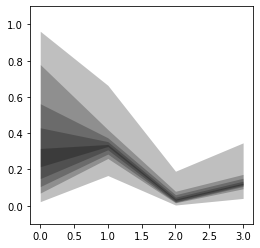

In [329]:
fig, ax = plt.subplots(figsize=(4,4))


gr_min, gr_max = pca_data['growth_rate'].min(), pca_data['growth_rate'].max() #.apply(np.log).max()
gs_min, gs_max = pca_data['genome_size'].min(), pca_data['genome_size'].max() #.apply(np.log).max()

traits = ['aerobe', 'gc_percentage', 'growth_rate', 'genome_size']
limits = [(0, 1), (20, 80), (gr_min, gr_max), (gs_min, gs_max)]
cmaps = ['coolwarm', 'brg', 'viridis', 'plasma']
cmaps = [mpl.colormaps[c] for c in cmaps]

leaves = get_leaf_names(test_node)
trait_data = pca_data.loc[leaves, traits]
norms = dict((n, mpl.colors.Normalize(_min, _max)) for n, (_min, _max) in zip(traits, 
                                                                              limits))

normed_td, y = tail_plot(ax, trait_data, norms, cmaps)
# plt.plot(range(len(normed_td.columns)), normed_td.mean(), color='k')




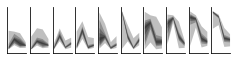

CPU times: user 5.64 s, sys: 116 ms, total: 5.75 s
Wall time: 5.53 s


In [331]:
%%time
fig = plt.figure(figsize=(4,10))
gs = fig.add_gridspec(10, 10)

traits = ['aerobe', 'gc_percentage', 'growth_rate', 'genome_size']
limits = [(0, 1), (20, 80), (gr_min, gr_max), (gs_min, gs_max)]
cmaps = ['coolwarm', 'brg', 'viridis', 'plasma']
cmaps = [mpl.colormaps[c] for c in cmaps]

for newind, (test_node, row) in enumerate(tsne_grid_df.sort_values(['dim1', 'dim2']).head(10).iterrows()):
    
    display(newind)
    
    node = gtdb_pruned.search_nodes(name=test_node)[0]

    ax = fig.add_subplot(gs[row['dim1'], row['dim2']]) #, polar=True)
    
    leaves = get_leaf_names(test_node)

    gr_min, gr_max = pca_data['growth_rate'].min(), pca_data['growth_rate'].max()
    gs_min, gs_max = pca_data['genome_size'].min(), pca_data['genome_size'].max()


    leaves = get_leaf_names(test_node)
    trait_data = pca_data.loc[leaves, traits]
    norms = dict((n, mpl.colors.Normalize(_min, _max)) for n, (_min, _max) in zip(traits, 
                                                                                  limits))
    tail_plot(ax, trait_data, norms, cmaps)
    sns.despine()
    plt.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
    
    clear_output(wait=True)
    
# fig.subplots_adjust(hspace=0)
# plt.savefig('./../figures/haar_method/test_tables/ridge_plot.png')
plt.show()

The following kwargs were not used by contour: 'label'


(-1.0, 10.0)

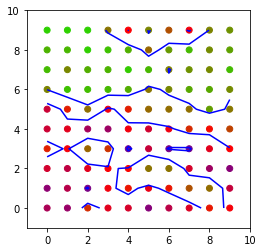

In [354]:
fig,ax = plt.subplots(figsize=(4,4))
cmap = mpl.colormaps['brg']

for i, item in enumerate(tsne_input_data.reindex(tsne_grid_df.sort_values(['dim1', 'dim2']).index).gc_content.values.reshape(10, 10)):
    plt.scatter([i]*10, range(10), c=[cmap(i) for i in item])
    
ax.contour(x, y, z2.T, levels=2, colors='b', linestyles='solid', label='Dataset 2')
ax.set_ylim(-1, 10)
ax.set_xlim(-1, 10)

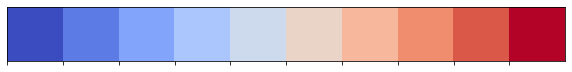

In [298]:
sns.palplot([cmap(i) for i in np.linspace(0,1,10)])

In [294]:
from scipy.ndimage import laplace
from scipy.ndimage import generic_filter


In [289]:
z = tsne_input_data.reindex(tsne_grid_df.sort_values(['dim1', 'dim2']).index).aerobe.values.reshape(10, 10)

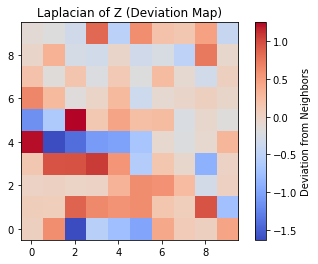

In [291]:
# Apply Laplacian filter
laplacian_z = laplace(z).T

# Plot the Laplacian response
plt.imshow(laplacian_z, cmap='coolwarm', origin='lower')
plt.colorbar(label='Deviation from Neighbors')
plt.title('Laplacian of Z (Deviation Map)')
plt.show()


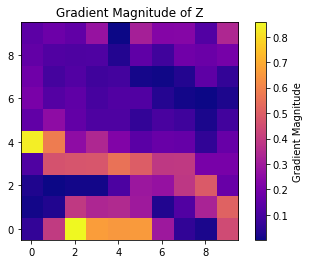

In [293]:
gx, gy = np.gradient(z)
grad_magnitude = np.sqrt(gx**2 + gy**2)

plt.imshow(grad_magnitude.T, cmap='plasma', origin='lower')
plt.colorbar(label='Gradient Magnitude')
plt.title('Gradient Magnitude of Z')
plt.show()


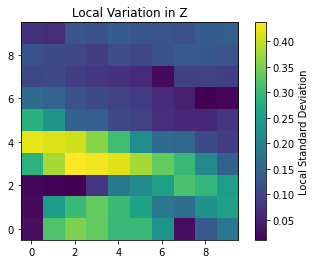

In [296]:
def local_std(arr):
    return np.std(arr)

std_z = generic_filter(z, local_std, size=3)

plt.imshow(std_z.T, cmap='viridis', origin='lower')
plt.colorbar(label='Local Standard Deviation')
plt.title('Local Variation in Z')
plt.show()


In [433]:
tsne_input_data

aerobe  phototroph    carbon  growth rate  gc_content  genome_size
c000003  0.036839    0.006250  0.003125     0.118062    0.476148     0.151638
c001842  0.033319    0.000000  0.000000     0.147573    0.332853     0.103295
c000835  0.668355    0.000000  0.009259     0.332011    0.865783     0.153190
c001546  0.563722    0.014052  0.096019     0.193845    0.754680     0.195412
c010369  0.008198    0.000000  0.004032     0.157386    0.238922     0.214567
...           ...         ...       ...          ...         ...          ...
c023282  0.906315    0.000000  0.158730     0.110004    0.579793     0.197512
c006484  0.826686    0.008403  0.000000     0.072858    0.470809     0.210045
c003967  0.803634    0.019499  0.030641     0.204913    0.863233     0.399709
c003897  0.820100    0.004320  0.002160     0.155009    0.705583     0.292793
c003898  0.778015    0.000000  0.000000     0.309825    0.836826     0.254245

[100 rows x 6 columns]

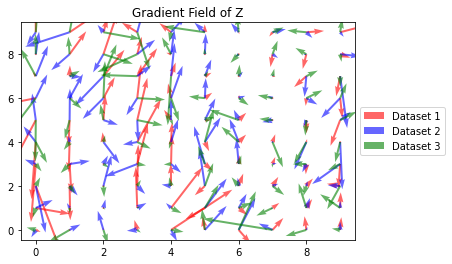

In [452]:
# Example data (three sets of z values)
np.random.seed(42)
# z1 = np.random.rand(10, 10)
z1 = tsne_input_data.reindex(tsne_grid_df.sort_values(['dim1', 'dim2']).index).aerobe.values.reshape(10, 10)
# z2 = np.random.rand(10, 10)
z2 = tsne_input_data.reindex(tsne_grid_df.sort_values(['dim1', 'dim2']).index).gc_content.values.reshape(10, 10)
# z3 = np.random.rand(10, 10)
z3 = tsne_input_data.reindex(tsne_grid_df.sort_values(['dim1', 'dim2']).index)['growth rate'].values.reshape(10, 10)
# z3 = np.random.rand(10, 10)
z4 = tsne_input_data.reindex(tsne_grid_df.sort_values(['dim1', 'dim2']).index).genome_size.values.reshape(10, 10)
# z1 = np.random.rand(10, 10)
z5 = tsne_input_data.reindex(tsne_grid_df.sort_values(['dim1', 'dim2']).index).phototroph.values.reshape(10, 10)
# z2 = np.random.rand(10, 10)
z6 = tsne_input_data.reindex(tsne_grid_df.sort_values(['dim1', 'dim2']).index).carbon.values.reshape(10, 10)


# Compute gradients
def compute_gradients(z):
    gx, gy = np.gradient(z)
    return gx, gy

g1x, g1y = compute_gradients(z1)
g2x, g2y = compute_gradients(z2)
g3x, g3y = compute_gradients(z3)

# Grid
x, y = np.meshgrid(range(10), range(10))

# Plot vector field
fig, ax = plt.subplots()
ax.quiver(x, y, g1x, g1y, color='r', alpha=0.6, label="Dataset 1")
ax.quiver(x, y, g2x, g2y, color='b', alpha=0.6, label="Dataset 2")
ax.quiver(x, y, g3x, g3y, color='g', alpha=0.6, label="Dataset 3")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Gradient Field of Z')
plt.show()


The following kwargs were not used by contour: 'label'
The following kwargs were not used by contour: 'label'


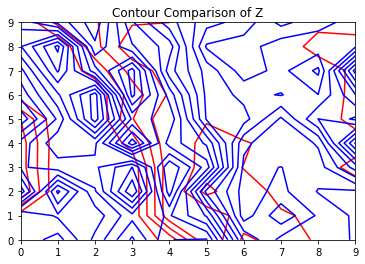

In [457]:
fig, ax = plt.subplots()
ax.contour(x, y, z1, levels=5, colors='r', linestyles='solid', label='Dataset 1')
ax.contour(x, y, z2, levels=15, colors='b', linestyles='solid', label='Dataset 2')
# ax.contour(x, y, z3, levels=5, colors='g', linestyles='dotted', label='Dataset 3')

plt.title('Contour Comparison of Z')
plt.show()


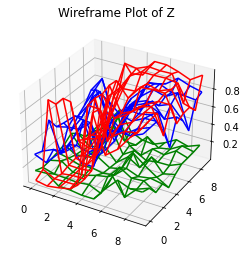

In [436]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(x, y, z1, color='r', label='Dataset 1')
ax.plot_wireframe(x, y, z2, color='b', label='Dataset 2')
ax.plot_wireframe(x, y, z3, color='g', label='Dataset 3')

plt.title('Wireframe Plot of Z')
plt.show()


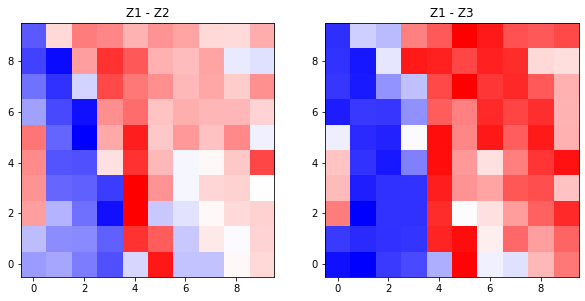

In [437]:
dz12 = z1 - z2
dz13 = z1 - z3

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(dz12, cmap='bwr', origin='lower')
ax[0].set_title('Z1 - Z2')

ax[1].imshow(dz13, cmap='bwr', origin='lower')
ax[1].set_title('Z1 - Z3')

plt.show()


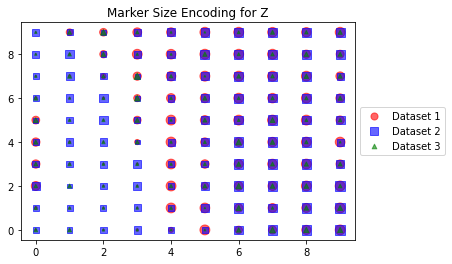

In [438]:
np.random.seed(42)

x, y = np.meshgrid(range(10), range(10))

fig, ax = plt.subplots()
ax.scatter(x, y, s=100 * z1.flatten(), color='r', marker='o', alpha=0.6, label='Dataset 1')
ax.scatter(x, y, s=100 * z2.flatten(), color='b', marker='s', alpha=0.6, label='Dataset 2')
ax.scatter(x, y, s=100 * z3.flatten(), color='g', marker='^', alpha=0.6, label='Dataset 3')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Marker Size Encoding for Z')
plt.show()


In [450]:
mpl.rcParams['hatch.linewidth'] = 1

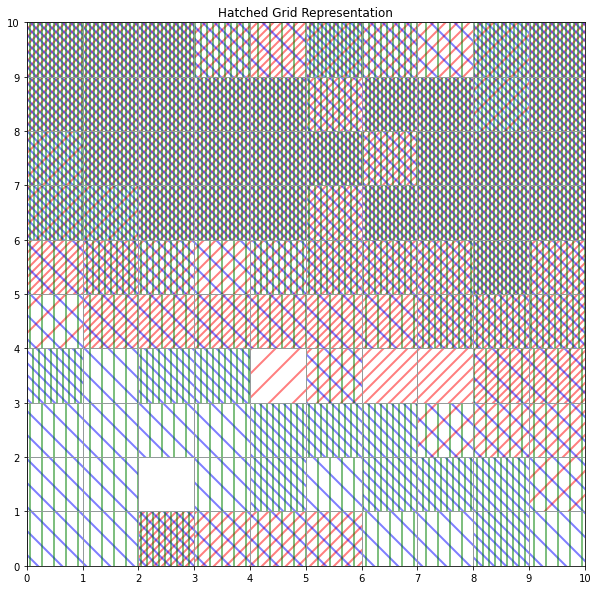

In [440]:
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(10,10))
for i in range(10):
    for j in range(10):
        ax.add_patch(patches.Rectangle((i, j), 1, 1, fill=False, hatch='/' * int(z1[i, j]*4), color='r', alpha=0.5))
        ax.add_patch(patches.Rectangle((i, j), 1, 1, fill=False, hatch='\\' * int(z2[i, j]*4), color='b', alpha=0.5))
        ax.add_patch(patches.Rectangle((i, j), 1, 1, fill=False, hatch='|'* int(z2[i, j]*4), color='g', alpha=0.5))

ax.set_xticks(range(11))
ax.set_yticks(range(11))
plt.grid(True)
plt.title('Hatched Grid Representation')
plt.show()


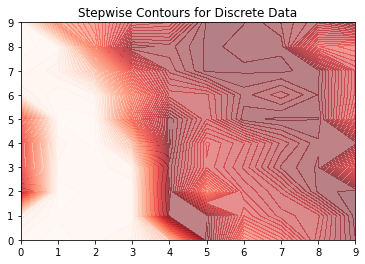

In [441]:
import scipy.ndimage

fig, ax = plt.subplots()
ax.contourf(x, y, z1, levels=50, cmap='Reds', alpha=0.5)
# ax.contourf(x, y, z2, levels=15, cmap='Blues', alpha=0.5)
# ax.contourf(x, y, z3, levels=5, cmap='Greens', alpha=0.5)

plt.title('Stepwise Contours for Discrete Data')
plt.show()


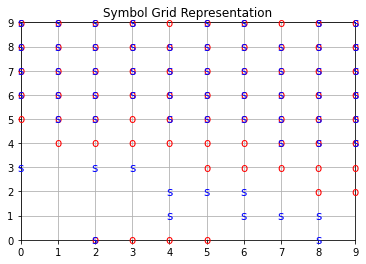

In [442]:
symbols = ['o', 's', '^']
datasets = [z1, z2, z3]
colors = ['r', 'b', 'g']

fig, ax = plt.subplots()
for d, symbol, color in zip(datasets, symbols, colors):
    for i in range(10):
        for j in range(10):
            ax.text(i, j, symbol if d[i, j] > 0.5 else '', fontsize=12, color=color, ha='center', va='center')

ax.set_xticks(range(10))
ax.set_yticks(range(10))
plt.grid(True)
plt.title('Symbol Grid Representation')
plt.show()


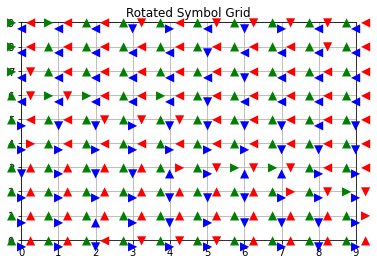

In [443]:
symbols = ['▲', '▶', '▼', '◀']  # Four rotation states
datasets = [z1, z2, z3]
colors = ['r', 'b', 'g']
si = [0.25, 0, -0.25, 0]
sj = [0, -0.25, 0, 0.25]

fig, ax = plt.subplots()
for d, color, shift_i, shift_j in zip(datasets, colors, si, sj):
    
    for i in range(10):
        for j in range(10):
            state = int(d[i, j] * 4)  # Map z to a state (0-3)
            ax.text(i+shift_i, j+shift_j, symbols[state], fontsize=12, color=color, ha='center', va='center')

ax.set_xticks(range(10))
ax.set_yticks(range(10))
plt.grid(True)
plt.title('Rotated Symbol Grid')
plt.show()



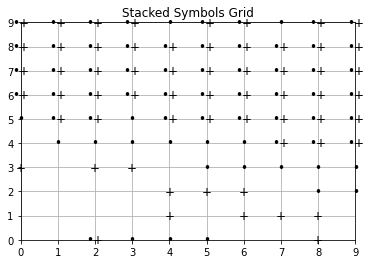

In [444]:
fig, ax = plt.subplots()
for i in range(10):
    for j in range(10):
        cell_symbols = ''
        if z1[i, j] > 0.5: cell_symbols += '•'
        if z2[i, j] > 0.5: cell_symbols += '+'
        if z3[i, j] > 0.5: cell_symbols += '■'
        ax.text(i, j, cell_symbols, fontsize=12, color='k', ha='center', va='center')

ax.set_xticks(range(10))
ax.set_yticks(range(10))
plt.grid(True)
plt.title('Stacked Symbols Grid')
plt.show()


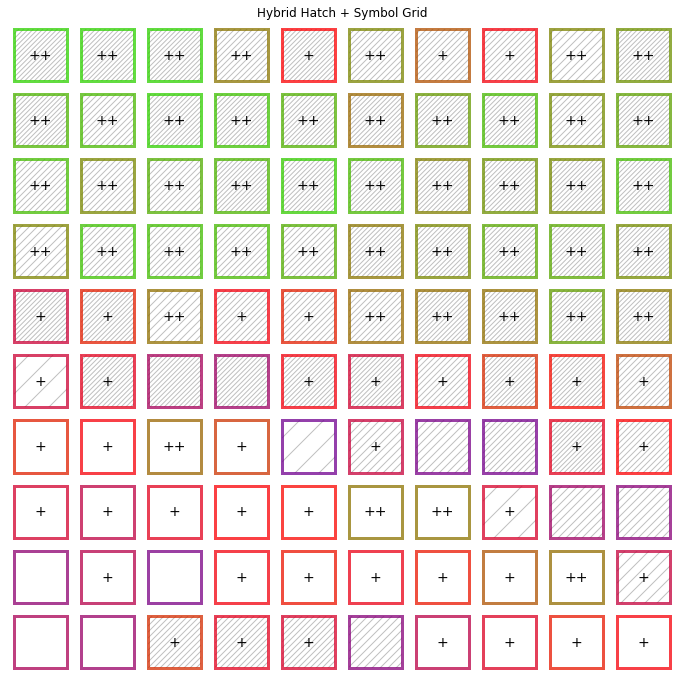

In [476]:
fig, ax = plt.subplots(figsize=(12, 12))
boxshrink = 0.1
for i in range(10):
    for j in range(10):
        # Light hatching if dataset 1 is high
        # if z1[i,j] > 0.5:
        ax.add_patch(patches.Rectangle((i+boxshrink, j+boxshrink), 1-boxshrink*2, 1-boxshrink*2, linewidth=0, fill=False, hatch='/'*int(z1[i,j]*6), 
                                       color='k', alpha=0.25))
        
        # ax.add_patch(patches.Rectangle((i+boxshrink, j+boxshrink), 1-boxshrink*2, 1-boxshrink*2, linewidth=0, fill=False, hatch='\\'*int(z4[i,j]*6), 
        #                                color='k', alpha=0.5))
        
        ax.add_patch(patches.Rectangle((i+boxshrink, j+boxshrink), 1-boxshrink*2, 1-boxshrink*2, linewidth=3, fill=False,
                                       color=cmap(z2[i,j]), alpha=0.75))
        # Bold symbol for dataset 2
        ax.text(i+0.5, j+0.5, '+'*int(z2[i,j]*3), fontsize=14, ha='center', va='center', color='k')
          
            
        # # Add symbols for next 3 datasets
        # symbol_offset = [-0.2, 0, 0.2]  # Slight offsets to avoid overlap
        # count = 0
        # for k, z_data in enumerate([z5, z6]):
        #     if z_data[i, j] > 0.1:
        #         ax.text(i + 0.5 + symbol_offset[count], j + 0.5, symbols[k], 
        #                 fontsize=12, color='k', ha='center', va='center')
        #         count += 1  # Adjust offset for next symbol    

ax.set_xticks(range(11))
ax.set_yticks(range(11))
# plt.grid(True)
sns.despine(left=True, bottom=True)
plt.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
plt.title('Hybrid Hatch + Symbol Grid')
plt.show()


In [482]:
pca_data.apply(lambda col: (col.min(), col.max()), axis=0)

aerobe  phototroph  3HP bicycle  3HP/4HB  Calvin Cycle  \
0  0.000091           0          0.0      0.0           0.0   
1  0.999298           1          1.0      1.0           1.0   

   rAcoA homoacetogenic  rTCA I  rTCA II  growth_rate  genome_size  \
0                   0.0     0.0      0.0     0.012932       219841   
1                   1.0     1.0      1.0    24.793352     16040666   

   gc_percentage  
0      15.152377  
1      77.019190

In [483]:
np_pca_data.shape

(50745, 11)

In [491]:
pca_data['phototroph'].sum() #/ len(carbon_binary)

3223

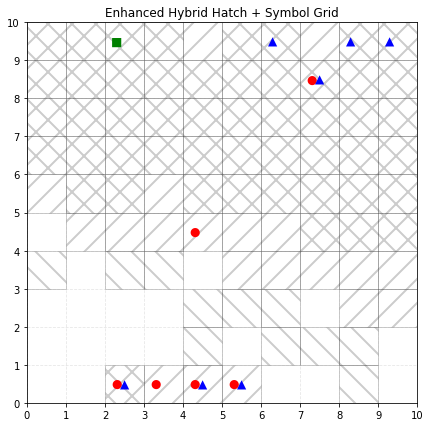

In [448]:


# Example 10x10 synthetic data for 6 datasets
np.random.seed(0)


hatch_styles = ['/', '\\', '|']  # 3 hatch styles
symbols = ['●', '▲', '■']       # 3 distinct symbols
colors = ['red', 'blue', 'green']  # Symbol colors

fig, ax = plt.subplots(figsize=(7,7))

for i in range(10):
    for j in range(10):
        # Draw hatches for first 3 datasets
        hatch_pattern = ''
        if z1[i, j] > 0.5: hatch_pattern += hatch_styles[0]
        if z2[i, j] > 0.5: hatch_pattern += hatch_styles[1]
        if z3[i, j] > 0.5: hatch_pattern += hatch_styles[2]
        
        if hatch_pattern:
            ax.add_patch(patches.Rectangle((i, j), 1, 1, fill=False, hatch=hatch_pattern, alpha=0.2))

        # Add symbols for next 3 datasets
        symbol_offset = [-0.2, 0, 0.2]  # Slight offsets to avoid overlap
        count = 0
        for k, z_data in enumerate([z4, z5, z6]):
            if z_data[i, j] > 0.5:
                ax.text(i + 0.5 + symbol_offset[count], j + 0.5, symbols[k], 
                        fontsize=12, color=colors[k], ha='center', va='center')
                count += 1  # Adjust offset for next symbol

ax.set_xticks(range(11))
ax.set_yticks(range(11))
plt.grid(True, linestyle="--", alpha=0.3)
plt.title('Enhanced Hybrid Hatch + Symbol Grid')
plt.show()


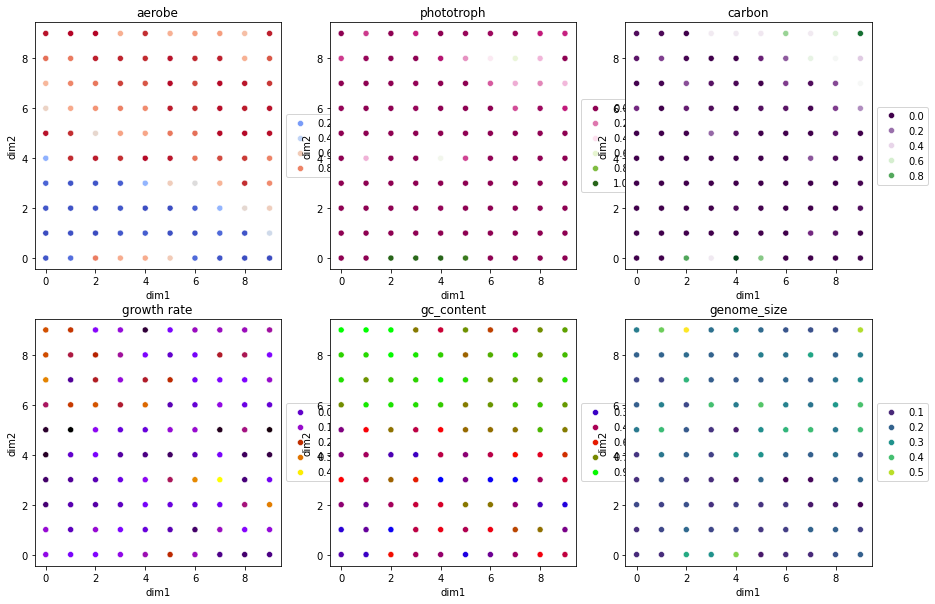

In [428]:
fig = plt.figure(figsize=(15, 10))
i = 1
for (trait, p) in zip(tsne_input_data.columns, 
                ['coolwarm', 'PiYG', 'PRGn', 'gnuplot', 'brg', 'viridis']):
    ax = fig.add_subplot(2,3,i)
    # ax.set_ylim(10, -1)
    ax.set_title(trait)
    
    # total_unexp = []
    # for leaf in wavelet_tree.get_leaves():
    #     total_unexp.append(unexp_var_df.loc[leaf.name, 'aerobe'])
        
    
    sns.scatterplot(data=tsne_grid_df, x='dim1', y='dim2', hue=tsne_input_data[trait], palette=p)
    lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # for index, row in tsne_grid_df.iterrows():
    #     if 'Cyano' in new_leaf_names.loc[index]:
    #         ax.annotate(new_leaf_names.loc[index], (row['dim1'], row['dim2']))
    i += 1
# plt.savefig('/data/mhoffert/fiererlab/periodic_phyla/figures/wavelet_period_table_placements.png', bbox_inches='tight', dpi=400)

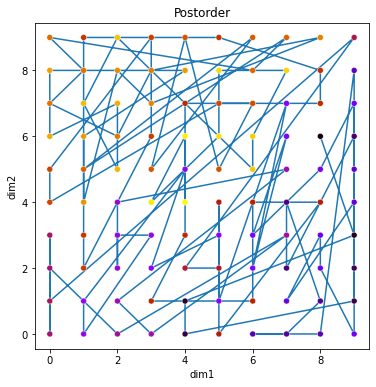

In [382]:
fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(1,1,1)
    # ax.set_ylim(10, -1)
ax.set_title('Postorder')
    
    # total_unexp = []
    # for leaf in wavelet_tree.get_leaves():
    #     total_unexp.append(unexp_var_df.loc[leaf.name, 'aerobe'])
        
    
sns.scatterplot(data=tsne_grid_df, x='dim1', y='dim2', hue=postorder_hues, palette='gnuplot', legend=False, zorder=1)
order = [l.name for l in wavelet_tree.traverse(strategy='postorder') if l.name in tsne_input_data.index]
plt.plot(tsne_grid_df.reindex(order)['dim1'],
        tsne_grid_df.reindex(order)['dim2'], zorder=0)
# lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # for index, row in tsne_grid_df.iterrows():
    #     if 'Cyano' in new_leaf_names.loc[index]:
    #         ax.annotate(new_leaf_names.loc[index], (row['dim1'], row['dim2']))
    # i += 1

In [380]:
postorder_hues.sort_values()

c000003                                 (0.0, 0.0, 0.0, 1.0)
c001842    (0.08856148855400953, 4.824690352880868e-07, 0...
c000835    (0.14002800840280097, 7.538578676376356e-06, 0...
c001546    (0.1656833739159028, 2.068585988797672e-05, 0....
c010369    (0.19802950859533486, 6.0308629411010845e-05, ...
                                 ...                        
c023282    (0.9801960588196069, 0.886906242697002, 0.0, 1.0)
c006484    (0.9861789997803863, 0.9198870419371131, 0.0, ...
c003967    (0.9901475429766743, 0.9423223345470444, 0.0, ...
c003897    (0.9960707117193528, 0.9766546501722566, 0.0, ...
c003898                                 (1.0, 1.0, 0.0, 1.0)
Length: 100, dtype: object

In [379]:
%%time
print('test')

test
CPU times: user 374 µs, sys: 0 ns, total: 374 µs
Wall time: 306 µs


In [ ]:
plt.cla()
plt.close()

In [376]:
postorder_hues

c000003                                 (0.0, 0.0, 0.0, 1.0)
c001842    (0.08856148855400953, 4.824690352880868e-07, 0...
c000835    (0.14002800840280097, 7.538578676376356e-06, 0...
c001546    (0.1656833739159028, 2.068585988797672e-05, 0....
c010369    (0.19802950859533486, 6.0308629411010845e-05, ...
                                 ...                        
c023282    (0.9801960588196069, 0.886906242697002, 0.0, 1.0)
c006484    (0.9861789997803863, 0.9198870419371131, 0.0, ...
c003967    (0.9901475429766743, 0.9423223345470444, 0.0, ...
c003897    (0.9960707117193528, 0.9766546501722566, 0.0, ...
c003898                                 (1.0, 1.0, 0.0, 1.0)
Length: 100, dtype: object

<Axes: xlabel='aerobe', ylabel='Count'>

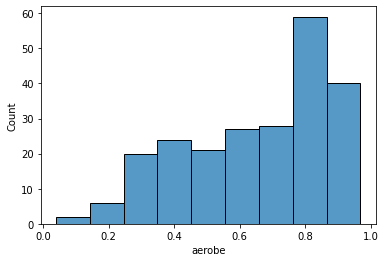

In [107]:
sns.histplot(pca_data.loc[get_leaf_names(gtdb_pruned.search_nodes(name=test_node)[0]), 'aerobe'])

(0.0, 1.7)

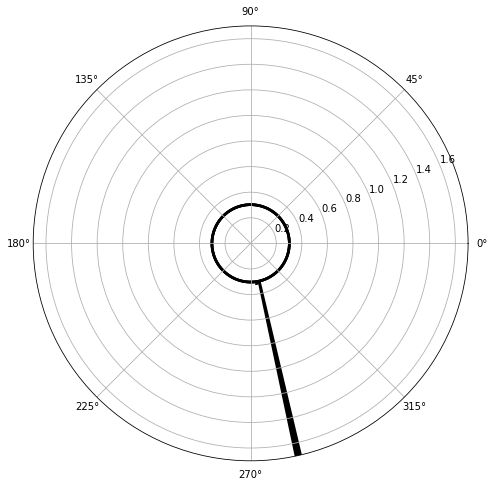

In [110]:
# set figure size
plt.figure(figsize=(8,8))

# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
# plt.axis('off')

# Set the coordinates limits
upperLimit = 1.5
lowerLimit = .3

heights = upperLimit * df[0] + 0.005

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / 256

# Compute the angle each bar is centered on:
indexes = list(range(256))
angles = [element * width for element in indexes]
angles


# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="k",color='k')

ax.set_ylim(0, 1.7)
# ax.axvline(1, 0, 2)
# ax.set_xlim(0, 3)

In [ ]:
y_ave = np.lib.stride_tricks.sliding_window_view(y, window_shape = (5, )).mean(1)
print(y_ave.shape, len(indeces))
# plt.plot(range(len(y_ave)), y_ave)
plt.scatter(indeces[:len(y_ave)], y_ave, c=y_ave, cmap='RdBu', zorder=1)

In [ ]:
from matplotlib.patches import Wedge, Rectangle






In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from hilbertcurve.hilbertcurve import HilbertCurve

# Parameters
p = 6  # Number of iterations (2^p grid)
n = 2  # Number of dimensions (e.g., 2D)

# Create Hilbert curve object
hilbert_curve = HilbertCurve(p, n)

# Generate a grid of points in 2D space
x = np.linspace(0, 1, 2**p)
y = np.linspace(0, 1, 2**p)
points = np.array([(xi, yi) for xi in x for yi in y])

# Map points to 1D using Hilbert curve
hilbert_indices = np.array([hilbert_curve.distance_from_point(point) for point in points])

# Plot the Hilbert curve
sorted_indices = np.argsort(hilbert_indices)
ordered_points = points[sorted_indices]

plt.figure(figsize=(8, 8))
plt.plot(ordered_points[:, 0], ordered_points[:, 1], '-', markersize=2, alpha=0.7, label="Hilbert Curve")
plt.scatter(points[:, 0], points[:, 1], c=hilbert_indices, cmap='viridis', s=5, alpha=0.6)
plt.colorbar(label="Hilbert Index")
plt.title("2D Hilbert Curve (p=6)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
gs = pca_data.loc[test_leaves, 'genome_size']
gc = pca_data.loc[test_leaves, 'gc_percentage']

plt.bar(x=range(len(test_leaves)), 
        height=pca_data.loc[test_leaves, 'genome_size'].apply(np.log))

plt.bar(x=range(len(test_leaves)), 
        height= (gs * (gc / 100)).apply(np.log10), color='red')

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
y = np.lib.stride_tricks.sliding_window_view(pca_data.loc[test_leaves, 'aerobe'], window_shape = (25, )).mean(1)
cmap = mpl.cm.RdBu

line = colored_line_between_pts(x=range(len(y)), y=y, c=y[:-1], ax=ax, cmap='RdBu', **{'linewidth':4})
ax.set_ylim(0, 1.25)
ax.set_xlim(0, len(y))

_y = np.lib.stride_tricks.sliding_window_view(pca_data.loc[test_leaves, 'aerobe'], window_shape = (25, )).std(1)
cmap = mpl.cm.RdBu

plt.plot(y + _y)
# line = colored_line_between_pts(x=range(len(y)), y=y, c=y[:-1], ax=ax, cmap='RdBu', **{'linewidth':4})
# ax.set_ylim(y.min(), y.max())
# ax.set_xlim(0, len(y))


plt.show()

In [ ]:
y.apply(cmap)

In [ ]:


# def growth_rate_microplot(ax, pca_data, node):
#     
#     rate = pca_data.loc[leaf_names, 'growth_rate'].mean()
#     x = np.logspace(-2, 5, 10)
#     y = 


    
def ox_tolerance_microplot(ax, pca_data, node):
    
    
    
    
    
    
    
    
    
    
    
    

## old code

## Alternative approach: normal tSNE

In [415]:
# %%time
# tsne_embedding = TSNE(n_components=2, learning_rate='auto',
#                   init='random', perplexity=3).fit_transform(tsne_input_data.values)

# tsne_plotdf = pd.DataFrame(tsne_embedding, columns=['dim1', 'dim2'], index=tsne_input_data.index)
# fig = plt.figure(figsize=(15, 10))
# i = 1
# for (trait, p) in zip(tsne_input_data.columns, 
#                 ['RdBu_r', 'PiYG', 'PRGn', 'gnuplot', 'brg', 'viridis']):
#     ax = fig.add_subplot(2,3,i)
#     ax.set_title(trait)
#     sns.scatterplot(data=tsne_plotdf, x='dim1', y='dim2', hue=tsne_input_data[trait], palette=p)
#     lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     i += 1

# # no longer needed labeled version of the plot
# %%time
# fig, ax = plt.subplots(figsize=(12,12))
# trait = 'aerobe'
# sns.scatterplot(data=tsne_plotdf, x='dim1', y='dim2', hue=tsne_input_data[trait], palette='RdBu')
# texts = []
# for index, row in tsne_plotdf.iterrows():
#     texts.append(plt.text(s=index, x=row['dim1'], y=row['dim2']))
# adjust_text(texts, arrowprops={'arrowstyle':'->'})
# # plt.savefig(f'/data/mhoffert/fiererlab/periodic_phyla/figures/wavelet_tsne_{trait}.png', dpi=400)

### Snapping to grid


# def gridify(points, grid_size):
#     # Generate random points in x,y space
#     np.random.seed(143)  # for reproducibility

#     locations = np.array(list(itertools.product(range(grid_size), range(grid_size))))

#     # Define the distance function (squared Euclidean distance)
#     distance = lambda point, location: np.sum((point - location) ** 2)

#     # Initialize the cost matrix
#     cost_matrix = np.zeros((len(points), grid_size**2))

#     # Populate the cost matrix with distances
#     for i, point in enumerate(points):
#         for j, location in enumerate(locations):
#             cost_matrix[i, j] = distance(point, location)

#     # Solve the assignment problem to minimize the total distance
#     row_ind, col_ind = linear_sum_assignment(cost_matrix)

#     # Assign points to locations based on the optimal solution
#     assignments = locations[col_ind].reshape(-1, 2)
    
#     return assignments

### DataFrame of all unexplained variances

In [ ]:
unexp_var = []

for i, node in enumerate(list(gtdb_pruned.traverse(strategy='levelorder'))):
    if i % 100 == 0:
        display(i)
        clear_output(wait=True)
   
    nodes = [n.name for n in list(node.traverse())[1:] if not n.is_leaf()]
    unexp_var.append(varexp_ind_df.loc[nodes, :].sum(0).rename(node.name))
        

In [ ]:
unexp_var_df = pd.concat(unexp_var, axis=1).T

### Plotting table

In [ ]:
def plot_01(data, ax, pos, color):
    _75, median, _25 = np.quantile(data, [0.75, 0.5, 0.25])
    _min, _max = data.min(), data.max()
    ax.plot([pos, pos], [_75, _25], color=color, linewidth=5)
    ax.scatter(x=[pos], y=[median], s=15, edgecolor='k', c='white', zorder=5)
    ax.plot([pos, pos], [_min, _max], color=color, linewidth=0.5)
    
    return ax

def plot_binary(data, ax, pos):
    
    frac_0 = data.eq(0).sum() / len(data)
    frac_1 = 1 - frac_0
    # ax.plot([pos-0.25, pos-0.25], [0, frac_0], color='k', linewidth=1, zorder=0)
    ax.scatter(x=[pos-0.25], y=[frac_1], s=25, edgecolor='k', c='white', zorder=5)
    
    return ax
    

In [ ]:
unexp_var_df.head()

In [ ]:
total_aerobe = []
for leaf in wavelet_tree.get_leaves():
    total_aerobe.append(unexp_var_df.loc[leaf.name, 'aerobe'])

In [ ]:
# scaled medians for plotting
scaled_medians = pd.DataFrame(MinMaxScaler().fit_transform(tsne_input_data), columns=tsne_input_data.columns, index=tsne_input_data.index)

In [ ]:
scaled_medians

In [ ]:
varexp_ind_df.loc[[i.name for i in wavelet_tree.get_leaves() if 'c' in i.name], :].sum()

In [ ]:
len([i for i in get_leaf_names(wavelet_tree) if not 'c' in i])

In [ ]:
wavelet_tree.describe()

In [ ]:
|fig = plt.figure(figsize=(12, 12))
i = 1
for test_node, row in tsne_grid_df.sort_values(['dim1', 'dim2']).iterrows():
    
    display(i)
    clear_output(wait=True)
    
    test_node = gtdb_pruned.search_nodes(name=test_node)[0]
    test_leaves = get_leaf_names(test_node)

    ax = fig.add_subplot(10, 10, i)
    ax.set_xlim(-0.5,5.5)
    ax.set_ylim(0, 1)

    # ax.set_title(f'{test_node.name}\n{new_leaf_names.loc[test_node.name]}\nn={len(test_leaves)}')

    # aerobe
    color = mpl.colormaps['RdBu'](scaled_medians.loc[test_node.name, 'aerobe'])
    ax = plot_01(pca_data.loc[test_leaves, 'aerobe'], ax, -0.25, color)
    
    plt.plot((0.25, 0.25), (0, unexp_var_df.loc[test_node.name, 'aerobe']), 
             color='gray', linewidth=0.5)

    # phototroph
    ax = plot_binary(pca_data.loc[test_leaves, 'phototroph'], ax, 0.75)
    plt.plot((1.25, 1.25), (0, unexp_var_df.loc[test_node.name, 'phototroph']), 
             color='gray', linewidth=0.5)

    # carbon fixation
    ax = plot_binary(carbon_binary.loc[test_leaves], ax, 1.75)
    plt.plot((2.25, 2.25), (0, unexp_var_df.loc[test_node.name, ['3HP bicycle', 'Calvin Cycle', 'rAcoA homoacetogenic', 'rTCA I']].mean()), 
             color='gray', linewidth=0.5)

    # growth rate
    color = mpl.colormaps['gnuplot'](scaled_medians.loc[test_node.name, 'growth rate'])
    ax = plot_01(scaled_gr.loc[test_leaves], ax, 2.75, color)
    plt.plot((3.25, 3.25), (0, unexp_var_df.loc[test_node.name, 'growth_rate']), 
             color='gray', linewidth=0.5)

    # growth rate
    color = mpl.colormaps['brg'](scaled_medians.loc[test_node.name, 'gc_content'])
    ax = plot_01(scaled_gc.loc[test_leaves], ax, 3.75, color)
    plt.plot((4.25, 4.25), (0, unexp_var_df.loc[test_node.name, 'gc_percentage']), 
             color='gray', linewidth=0.5)

    # growth rate
    color = mpl.colormaps['viridis'](scaled_medians.loc[test_node.name, 'genome_size'])
    ax = plot_01(scaled_gs.loc[test_leaves], ax, 4.75, color)
    plt.plot((5.25, 5.25), (0, np.log10(unexp_var_df.loc[test_node.name, 'genome_size'])), 
             color='gray', linewidth=0.5)

    sns.despine()
    ax.set_xticks(range(6))
    # xticks = ax.set_xticklabels(['', 'aerobe', 'phototroph', 'carbon', 'growth rate', 'gc_content', 'genome_size', ''],
    #                    rotation=90)

    plt.tick_params(labelbottom=False, labelleft=False)

    # plt.savefig(f'/data/mhoffert/fiererlab/periodic_phyla/figures/wavelet_leaves/{test_node.name}_plot.png',
    #             bbox_inches='tight',
    #             dpi=400)
    # plt.show()
    # plt.cla()
    # plt.close()
    i += 1
fig.subplots_adjust(wspace=0.25, hspace=0.25)
plt.savefig('/data/mhoffert/fiererlab/periodic_phyla/figures/wavelet_periodic_table.png', dpi=400, bbox_inches='tight')

tsne_grid_df.sort_values(['dim1', 'dim2'], ascending=False)## drawing taxon-only periodic table

In [ ]:
tsne_grid_df.sort_values(['dim1', 'dim2'], ascending=False)

In [ ]:
def translate_coordinates(x, y):
    # Translate (x, y) coordinates from Grid B to Grid A labels
    # Grid A label is calculated by moving rows top to bottom and columns left to right
    return (9 - y) * 10 + (x + 1)

In [ ]:
tsne_grid_df.sort_values(['dim1', 'dim2'], ascending=[True, False]).rename(index=new_leaf_names)

In [248]:
# ## 2D grid assignment

# # using phylo project
# tsne_plotdf = pd.DataFrame(mv.images[0, :, :], columns=['dim1', 'dim2'], index=tsne_input_data.index)
# method = 'phylo'

# # using trait project
# tsne_plotdf = pd.DataFrame(mv.images[1, :, :], columns=['dim1', 'dim2'], index=tsne_input_data.index)
# method = 'trait'

# grid_spots = np.array(list(itertools.product(np.linspace(tsne_plotdf['dim1'].min(),
#                              tsne_plotdf['dim1'].max(),
#                              10),
#                   np.linspace(tsne_plotdf['dim2'].min(),
#                              tsne_plotdf['dim2'].max(),
#                              10)))).reshape(10, 10, 2)

# tsne_grid = gridify(tsne_plotdf.values, 10)

# tsne_grid_df = pd.DataFrame(tsne_grid, index=tsne_plotdf.index, columns=['dim1', 'dim2'])

# # plot to visualizing snapping
# fig, ax = plt.subplots(figsize=(4,4))
# sns.scatterplot(data=tsne_plotdf, x='dim1', y='dim2')
# for index, row in tsne_grid_df.iterrows():
#     grid_x, grid_y = grid_spots[tsne_grid_df.loc[index, 'dim1']][tsne_grid_df.loc[index, 'dim2']]
#     plt.plot((grid_x, tsne_plotdf.loc[index, 'dim1']),
#              (grid_y, tsne_plotdf.loc[index, 'dim2']), color='gray', linewidth=0.25, zorder=0)
#     # ax.annotate(index, (grid_x, grid_y))
# # assignments
# # plt.savefig('/data/mhoffert/fiererlab/periodic_phyla/figures/group_meeting_figures/grid_assignments.png', dpi=400, bbox_inches='tight')


# fig = plt.figure(figsize=(15, 10))
# i = 1
# for (trait, p) in zip(tsne_input_data.columns, 
#                 ['RdBu', 'PiYG', 'PRGn', 'gnuplot', 'brg', 'viridis']):
#     ax = fig.add_subplot(2,3,i)
#     # ax.set_ylim(10, -1)
#     ax.set_title(trait)
    
#     # total_unexp = []
#     # for leaf in wavelet_tree.get_leaves():
#     #     total_unexp.append(unexp_var_df.loc[leaf.name, 'aerobe'])
        
    
#     sns.scatterplot(data=tsne_grid_df, x='dim1', y='dim2', hue=tsne_input_data[trait], palette=p)
#     lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     # for index, row in tsne_grid_df.iterrows():
#     #     if 'Cyano' in new_leaf_names.loc[index]:
#     #         ax.annotate(new_leaf_names.loc[index], (row['dim1'], row['dim2']))
#     i += 1
# # plt.savefig('/data/mhoffert/fiererlab/periodic_phyla/figures/wavelet_period_table_placements.png', bbox_inches='tight', dpi=400)

# fig, ax = plt.subplots(figsize=(4,4))

# sns.scatterplot(data=tsne_grid_df, x='dim1', y='dim2', hue=postorder_hues, palette='gnuplot')
# # ax.set_ylim(10, -1)
# # for index, row in tsne_grid_df.iterrows():
# #     if 'Cyano' in new_leaf_names.loc[index]:
# #         ax.annotate(new_leaf_names.loc[index], (row['dim1'], row['dim2']))
# ax.get_legend().remove()
# # adjust_text(texts)
# # plt.savefig('/data/mhoffert/fiererlab/periodic_phyla/figures/wavelet_period_table_postorder.png', dpi=400, bbox_inches='tight')


# ## ------------------------------------------------
# # OLD CODE
# ## ------------------------------------------------

# # def calculate_hexagon_vertex(center_x, center_y, edge_length, vertex_number):
# #     # Convert vertex number to radians
# #     angle_rad = (vertex_number - 1) * (2 * np.pi / 6)
    
# #     # Calculate vertex coordinates
# #     vertex_x = center_x + edge_length * np.cos(angle_rad)
# #     vertex_y = center_y + edge_length * np.sin(angle_rad)
    
# #     return (vertex_x, vertex_y)

# # fig, ax = plt.subplots(figsize=(4,4))
# # plt.scatter(0,0)

# # for i in range(6):
# #     vert = calculate_hexagon_vertex(0, 0, 2, i)
# #     if i == 1:
# #         c='r'
# #     else:
# #         c='k'
# #     plt.scatter(vert[0], vert[1], color=c)

# # tsne_input_data.columns

# # sns.palplot(mpl.colormaps[p](tsne_input_data.loc[index, trait]))

# # fig, ax = plt.subplots(figsize=(10, 10))

# # for count, (index, center) in enumerate(tsne_grid_df.iterrows()):
# #     display(count)
# #     clear_output(wait=True)
# #     for trait, p, i in zip(tsne_input_data.columns, 
# #                     ['RdBu', 'PiYG', 'PRGn', 'gnuplot', 'brg', 'viridis'],
# #                     range(6)):
        
# #         vert = calculate_hexagon_vertex(center['dim1'], center['dim2'], 0.25, i)
# #         plt.scatter(x=vert[0], y=vert[1], color=mpl.colormaps[p](tsne_input_data.loc[index, trait]))
    

# # Function to translate Grid A label to Grid B (x, y) coordinates
# def translate_to_grid_B(label):
#     label -= 1
#     x = label % 10
#     y = 9 - (label // 10)
#     return x, y

# # Create figure and axis
# fig, ax = plt.subplots()

# # Plot each point from Grid A to Grid B
# for label in range(1, 101):
#     x, y = translate_to_grid_B(label)
#     ax.plot(x, y, 'ro')
#     ax.text(x, y, str(label), fontsize=8, ha='right')

# # Set grid, axis limits, and labels
# ax.set_xticks(range(10))
# ax.set_yticks(range(10))
# ax.grid(True)
# ax.set_xlim(-1, 10)
# ax.set_ylim(-1, 10)
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_aspect('equal')

# plt.show()


# # # better leaf names
# # # find names for leaf nodes
# # new_leaf_names_2 = pd.Series()

# # for i, node in enumerate(wavelet_tree.get_leaves()):
# #     display(i)
# #     clear_output(wait=True)
    
# #     # n = gtdb_pruned.search_nodes(name=node.name)[0]
# #     n = gtdb_full.search_nodes(name=node.name)[0]

# #     level = 0
# #     while not '__' in names_map.loc[n.name]:
# #         n = n.up
# #         level += 1
    
# #     split = names_map.loc[n.name].split(':')[-1]
# #     tax = split.split('__')[0].upper()
# #     new_leaf_names_2.loc[node.name] = f'{tax}{level}:{split.split("__")[-1]}'
    
# #     if f'{tax}{level}:{split.split("__")[-1]}' != new_leaf_names.loc[node.name]:
# #         print(f'{tax}{level}:{split.split("__")[-1]}', new_leaf_names.loc[node.name])

# new_leaf_names_2.loc[tsne_grid_df.index[(new_leaf_names_2.loc[tsne_grid_df.index] != new_leaf_names.loc[tsne_grid_df.index])]]

# node = gtdb_full.search_nodes(name='c000201')[0]
# for n in node.traverse(strategy='levelorder'):
#     if 'p__' in names_map.loc[n.name]:
#         print(names_map.loc[n.name])

# labeled_subnodes = pd.DataFrame(columns=['node', 'subnode', 'leaf_count'])
# indexer = 0
# for i, wavelet_leaf in enumerate(tsne_grid_df.index):
#     display(i)
#     clear_output(wait=True)
#     node = gtdb_pruned.search_nodes(name=wavelet_leaf)[0]
#     for n in node.traverse(strategy='levelorder'):
#         if '__' in names_map.loc[n.name]:
#             labeled_subnodes.loc[indexer, 'node'] = node.name
#             labeled_subnodes.loc[indexer, 'subnode'] = n.name
#             labeled_subnodes.loc[indexer, 'leaf_count'] = len(n.get_leaves())
            
#             indexer += 1
            
# labeled_subnodes.head()

# len(labeled_subnodes.index)

# top_subnodes = labeled_subnodes.groupby('node').apply(lambda x: names_map.loc[x.sort_values('leaf_count', ascending=False)['subnode'].iloc[:5]].values)

# labels = top_subnodes.apply(lambda x: '\n'.join(['_'.join(s.split(':')[-1].split('__')[-2:]) for s in x]))